In [1]:
%pip install -r work/requirements.txt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 218.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 181.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 178.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 152.9 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 106.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 57.8 kB/s eta 0:00:0000:0100:07
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 180.2 kB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 326.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 537.7 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 438.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 451.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━

In [2]:
file_name = "work/data/polished2.csv"

df = pd.read_csv(file_name)

<Axes: >

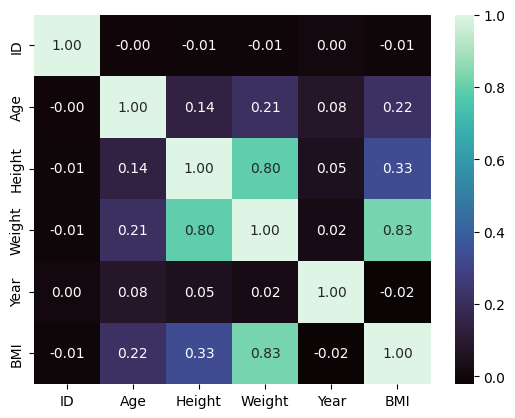

In [3]:
# matriz de correlação so das variaveis numericas
to_numeric_df = df.drop(df.columns[0], axis=1)
numeric_df = to_numeric_df.select_dtypes(include=['float64', 'int64'])
df_corr = numeric_df.corr()

sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='mako')

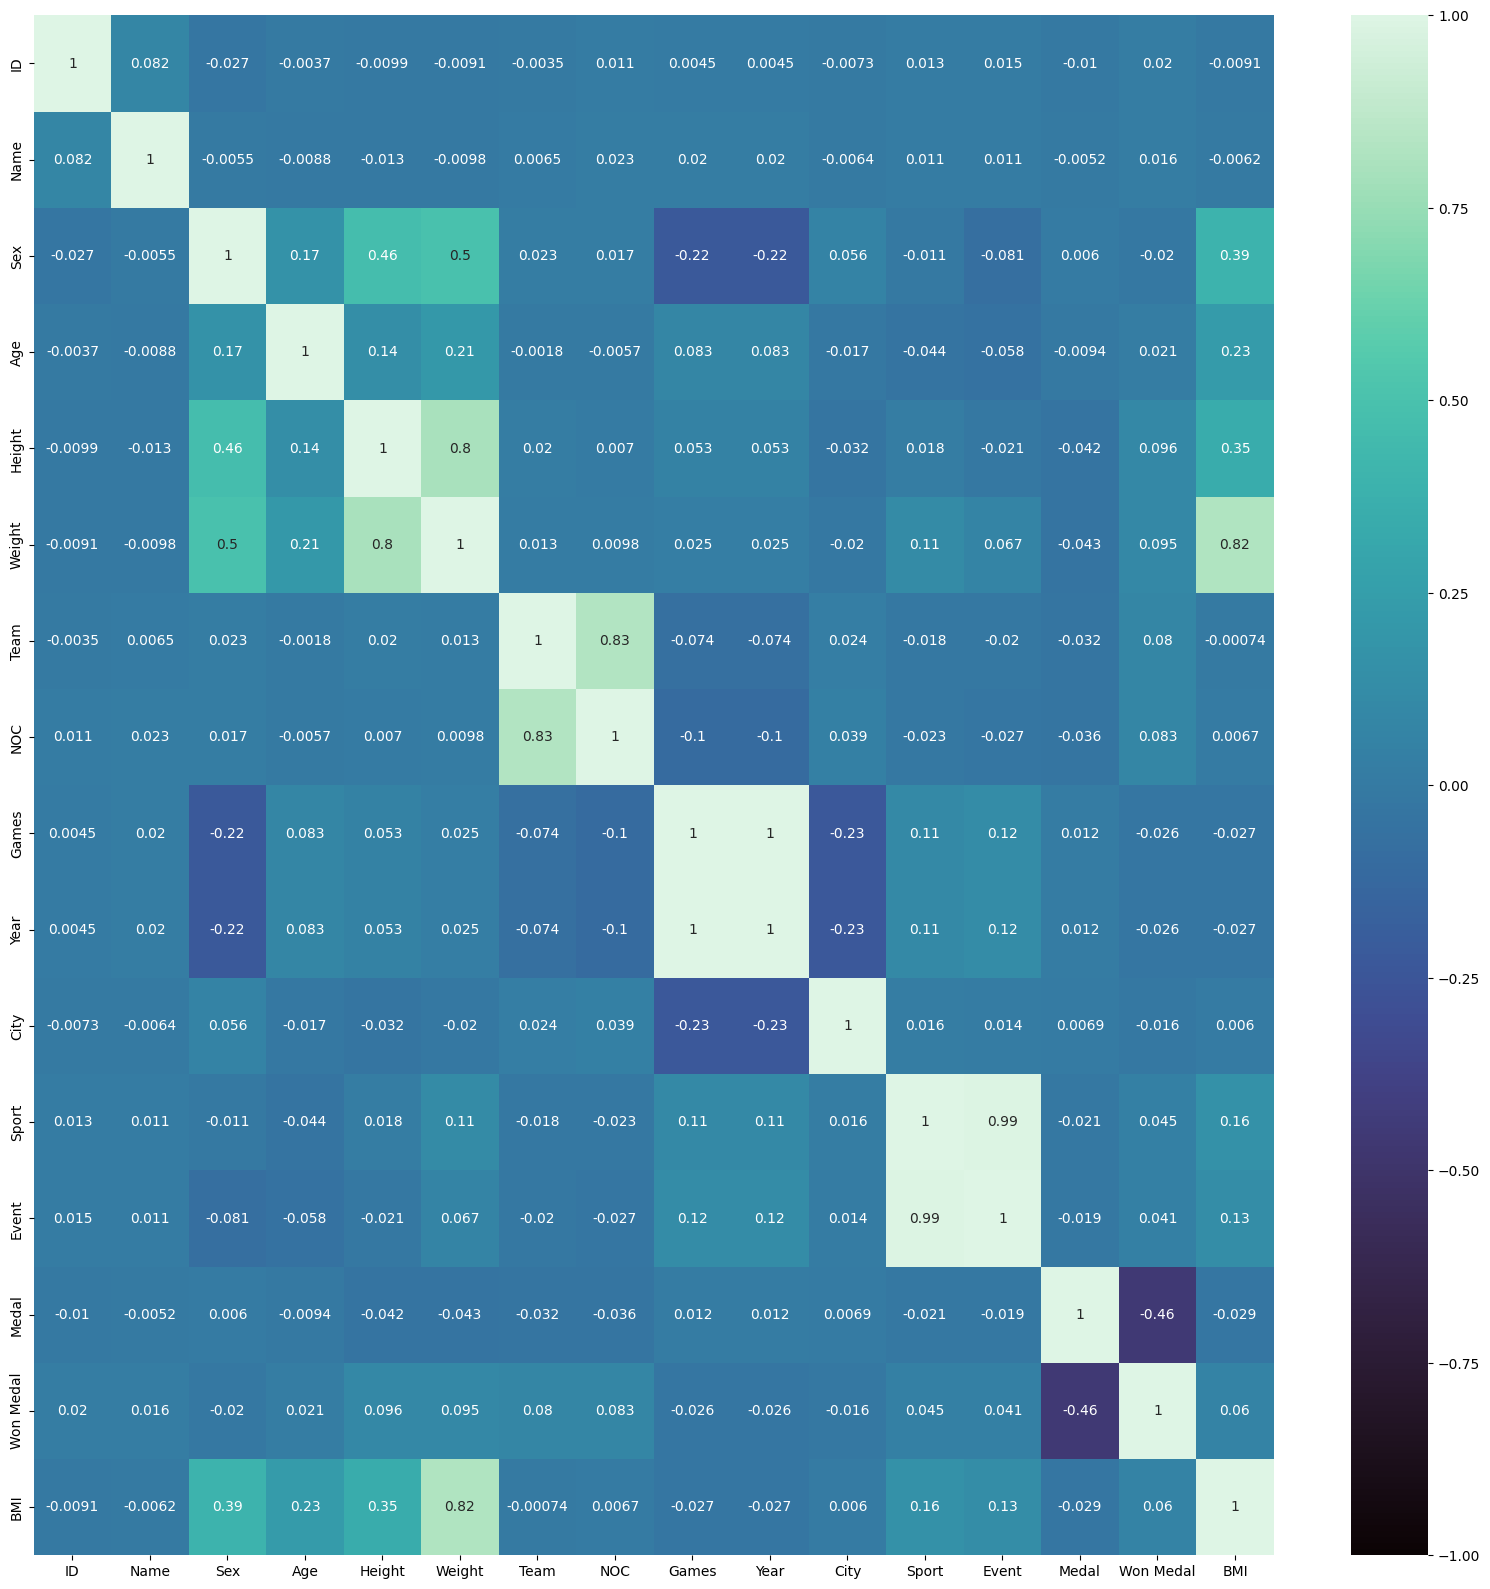

In [4]:
# Passar um encoder nos categoricos para conseguir comprar distribuições
encoders = {}
# remove Season column
to_encode_df = df.drop(df.columns[0], axis=1)
to_encode_df = to_encode_df.drop(columns='Season')

for columns in to_encode_df.columns:
    le = LabelEncoder()
    to_encode_df[columns] = le.fit_transform(to_encode_df[columns])
    encoders[columns] = le
    
corr_matrix = to_encode_df.corr()


plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='mako', vmin=-1, vmax=1)
plt.show()

In [5]:
#plt.figure(figsize=(30, 30))

#sns.pairplot(to_encode_df, hue='Medal')

# plt.show()

Archery


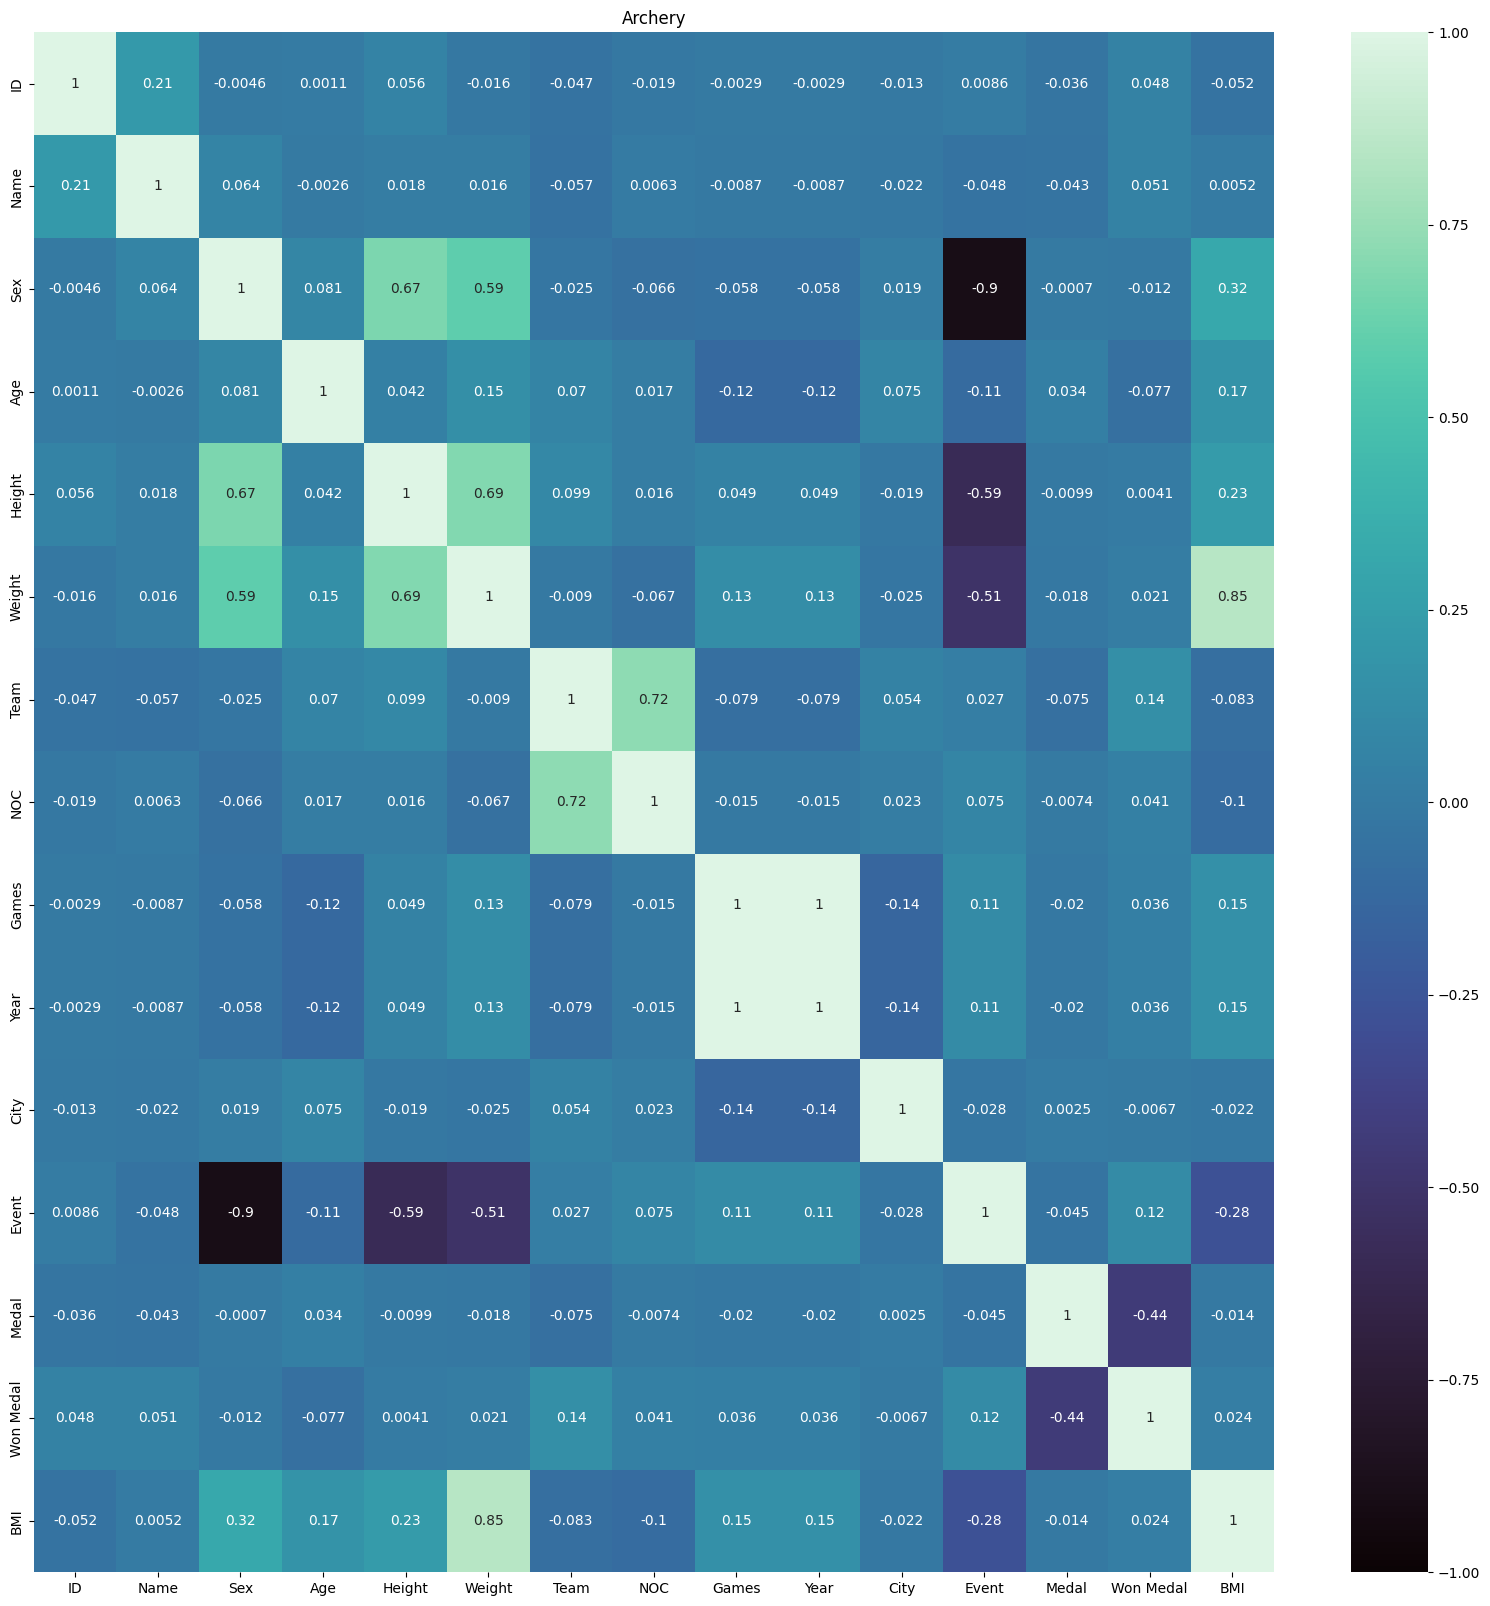

Athletics


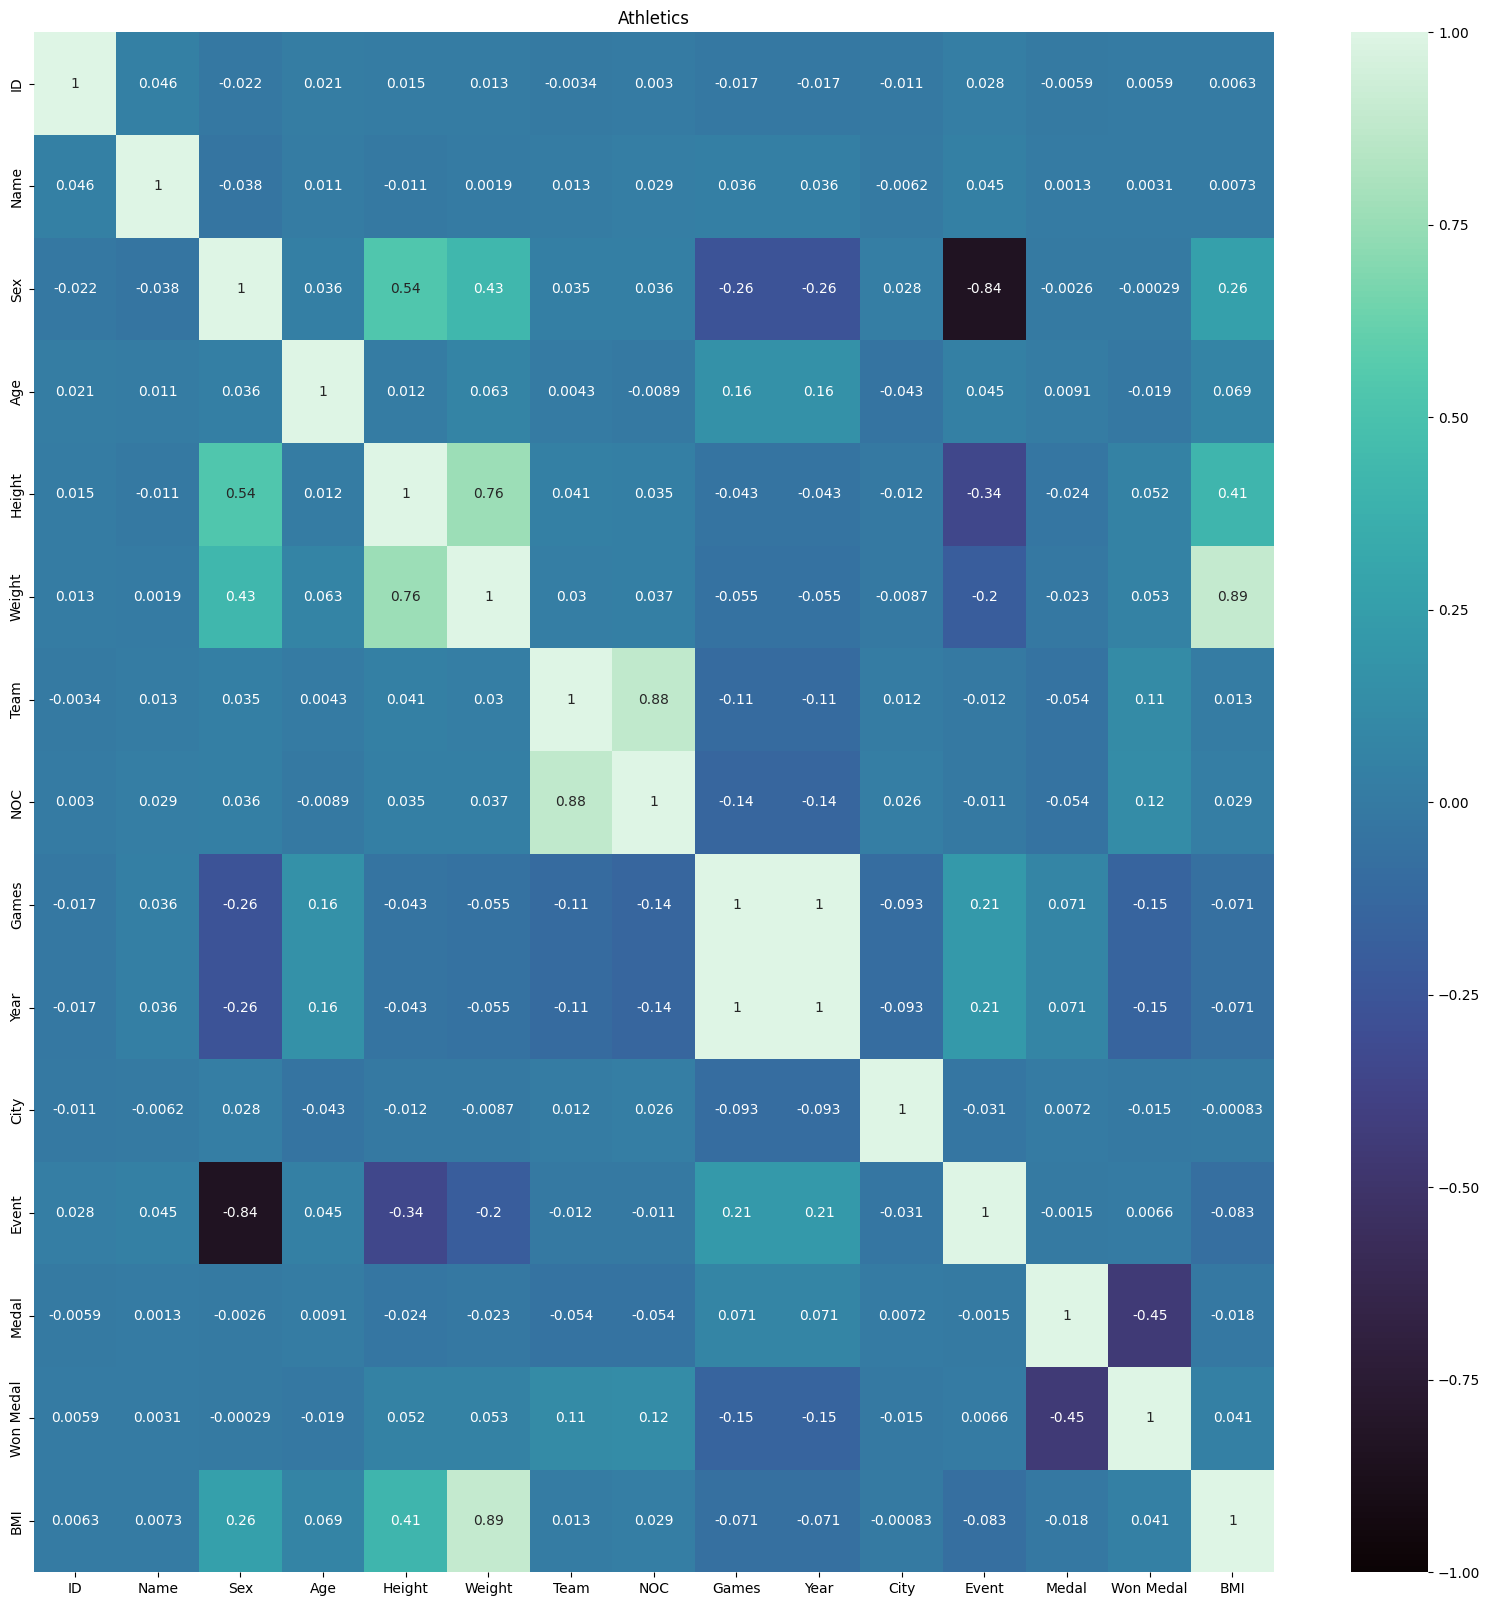

Badminton


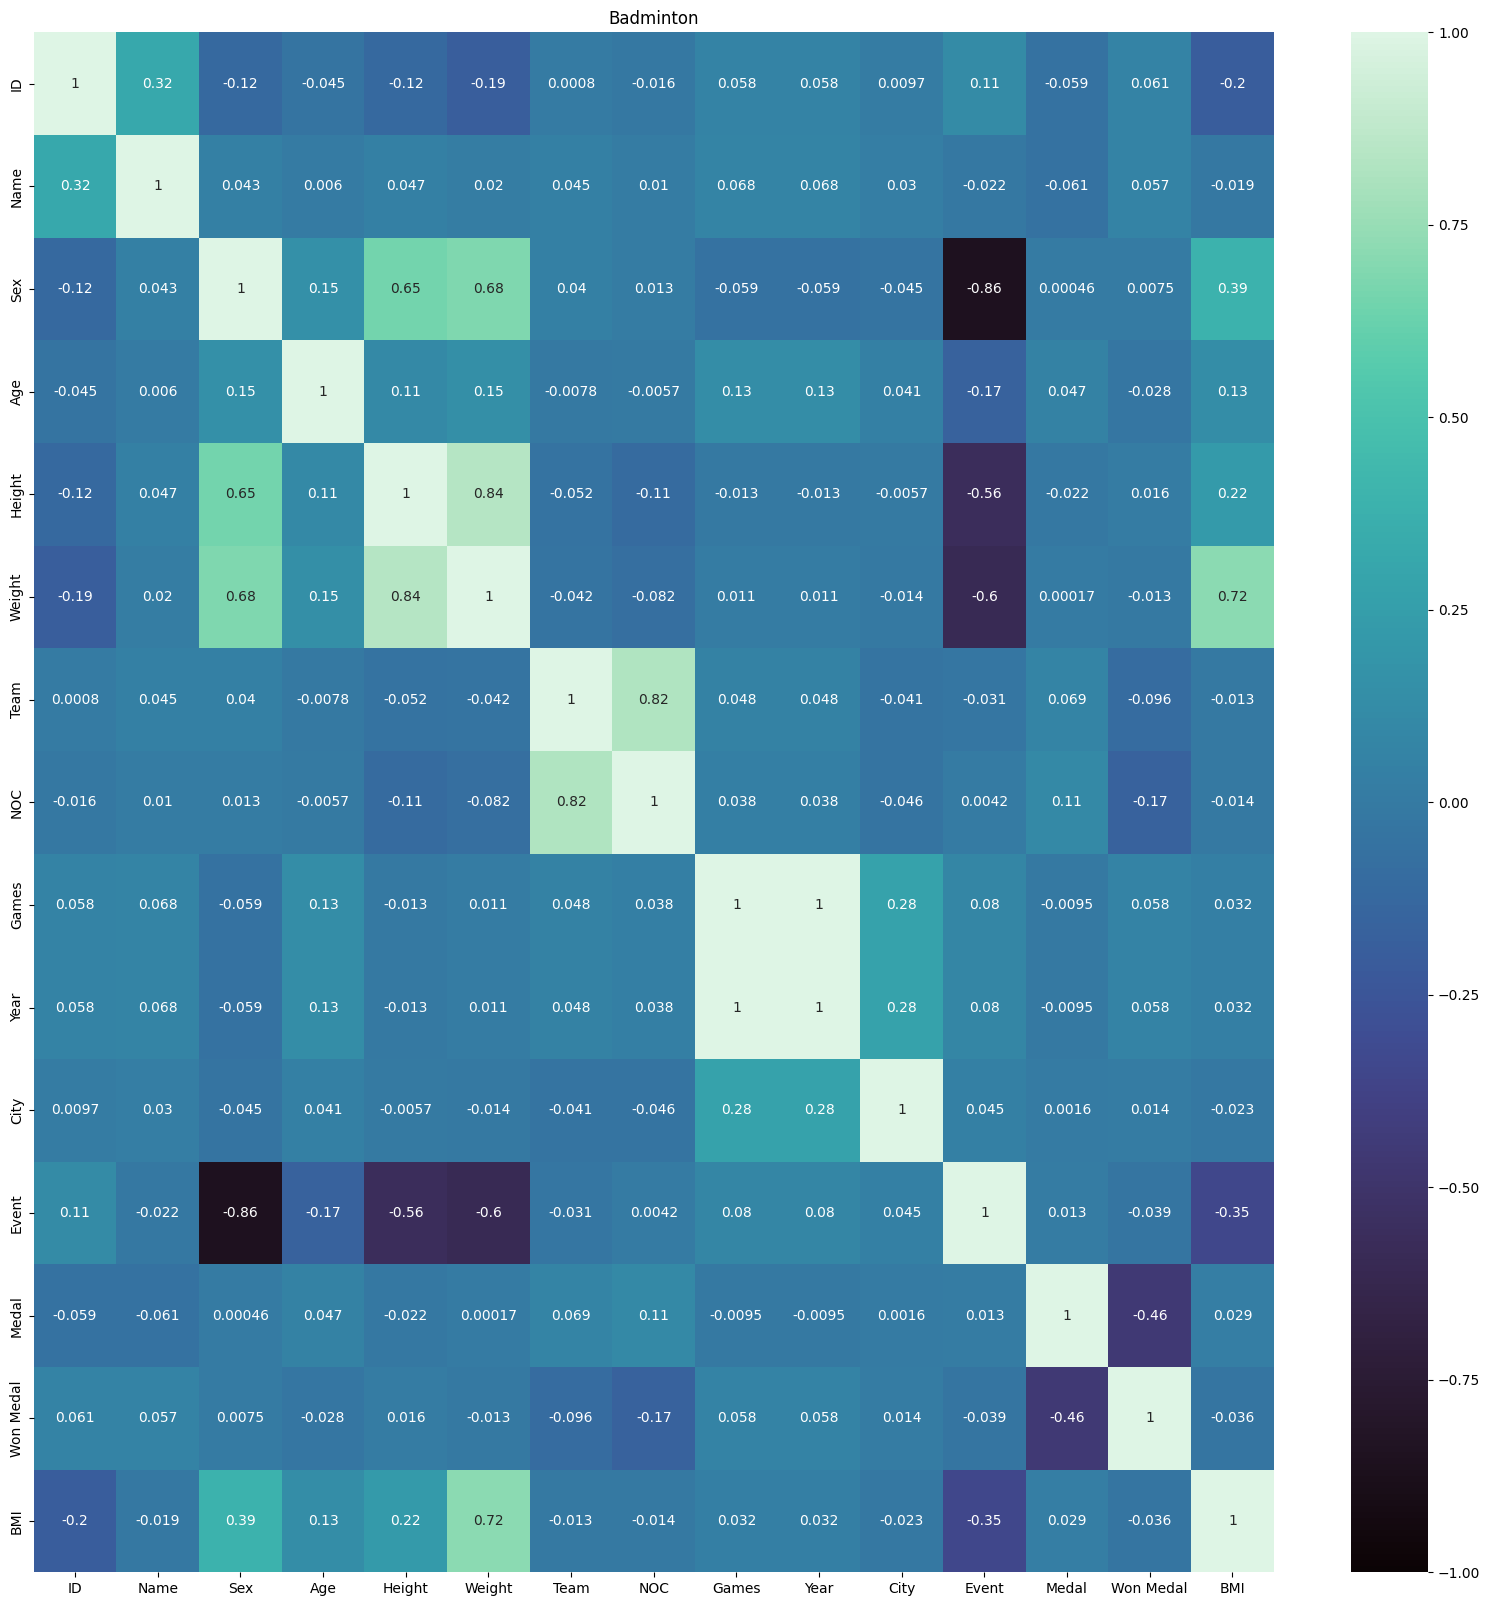

Baseball


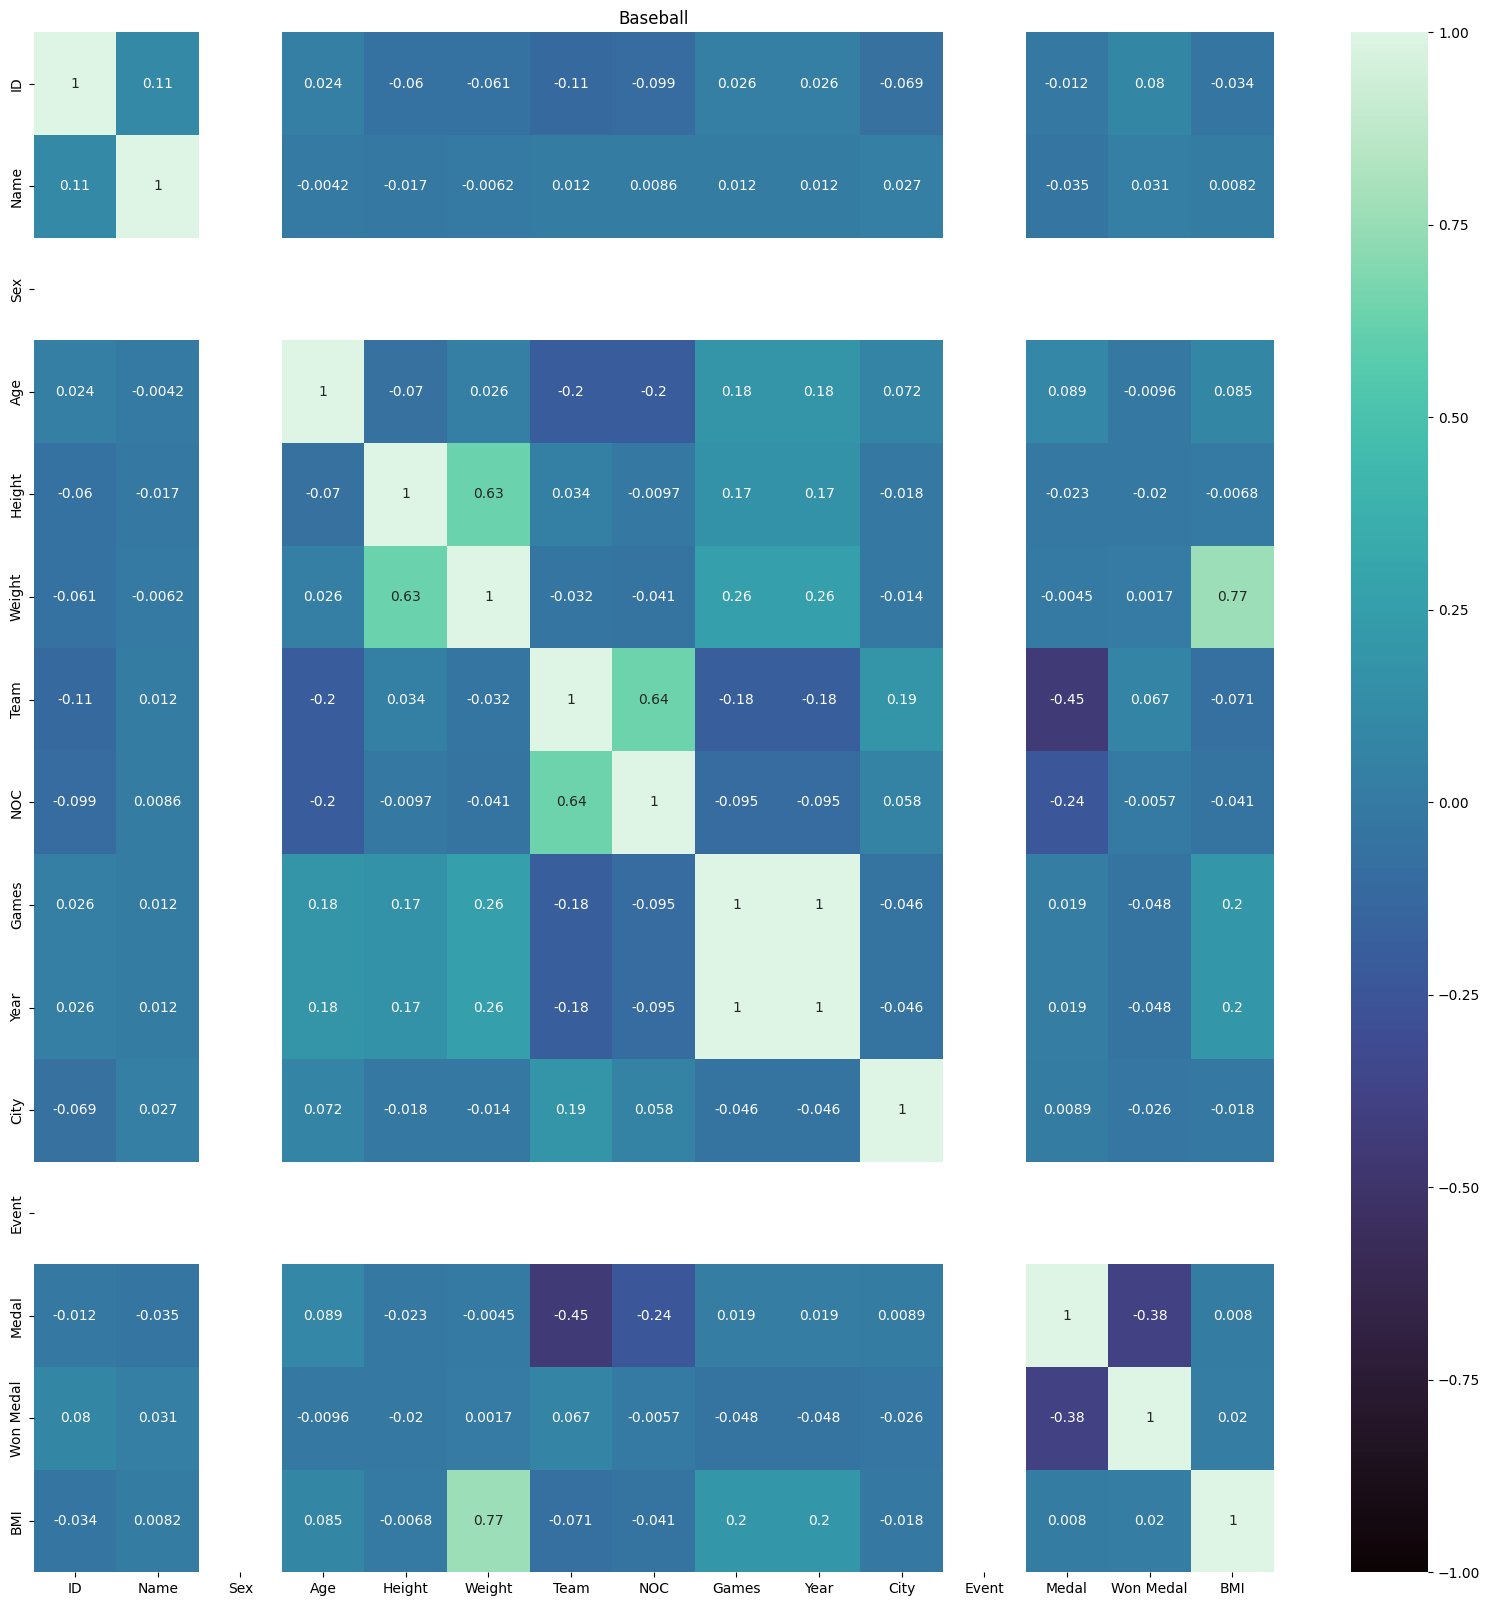

Basketball


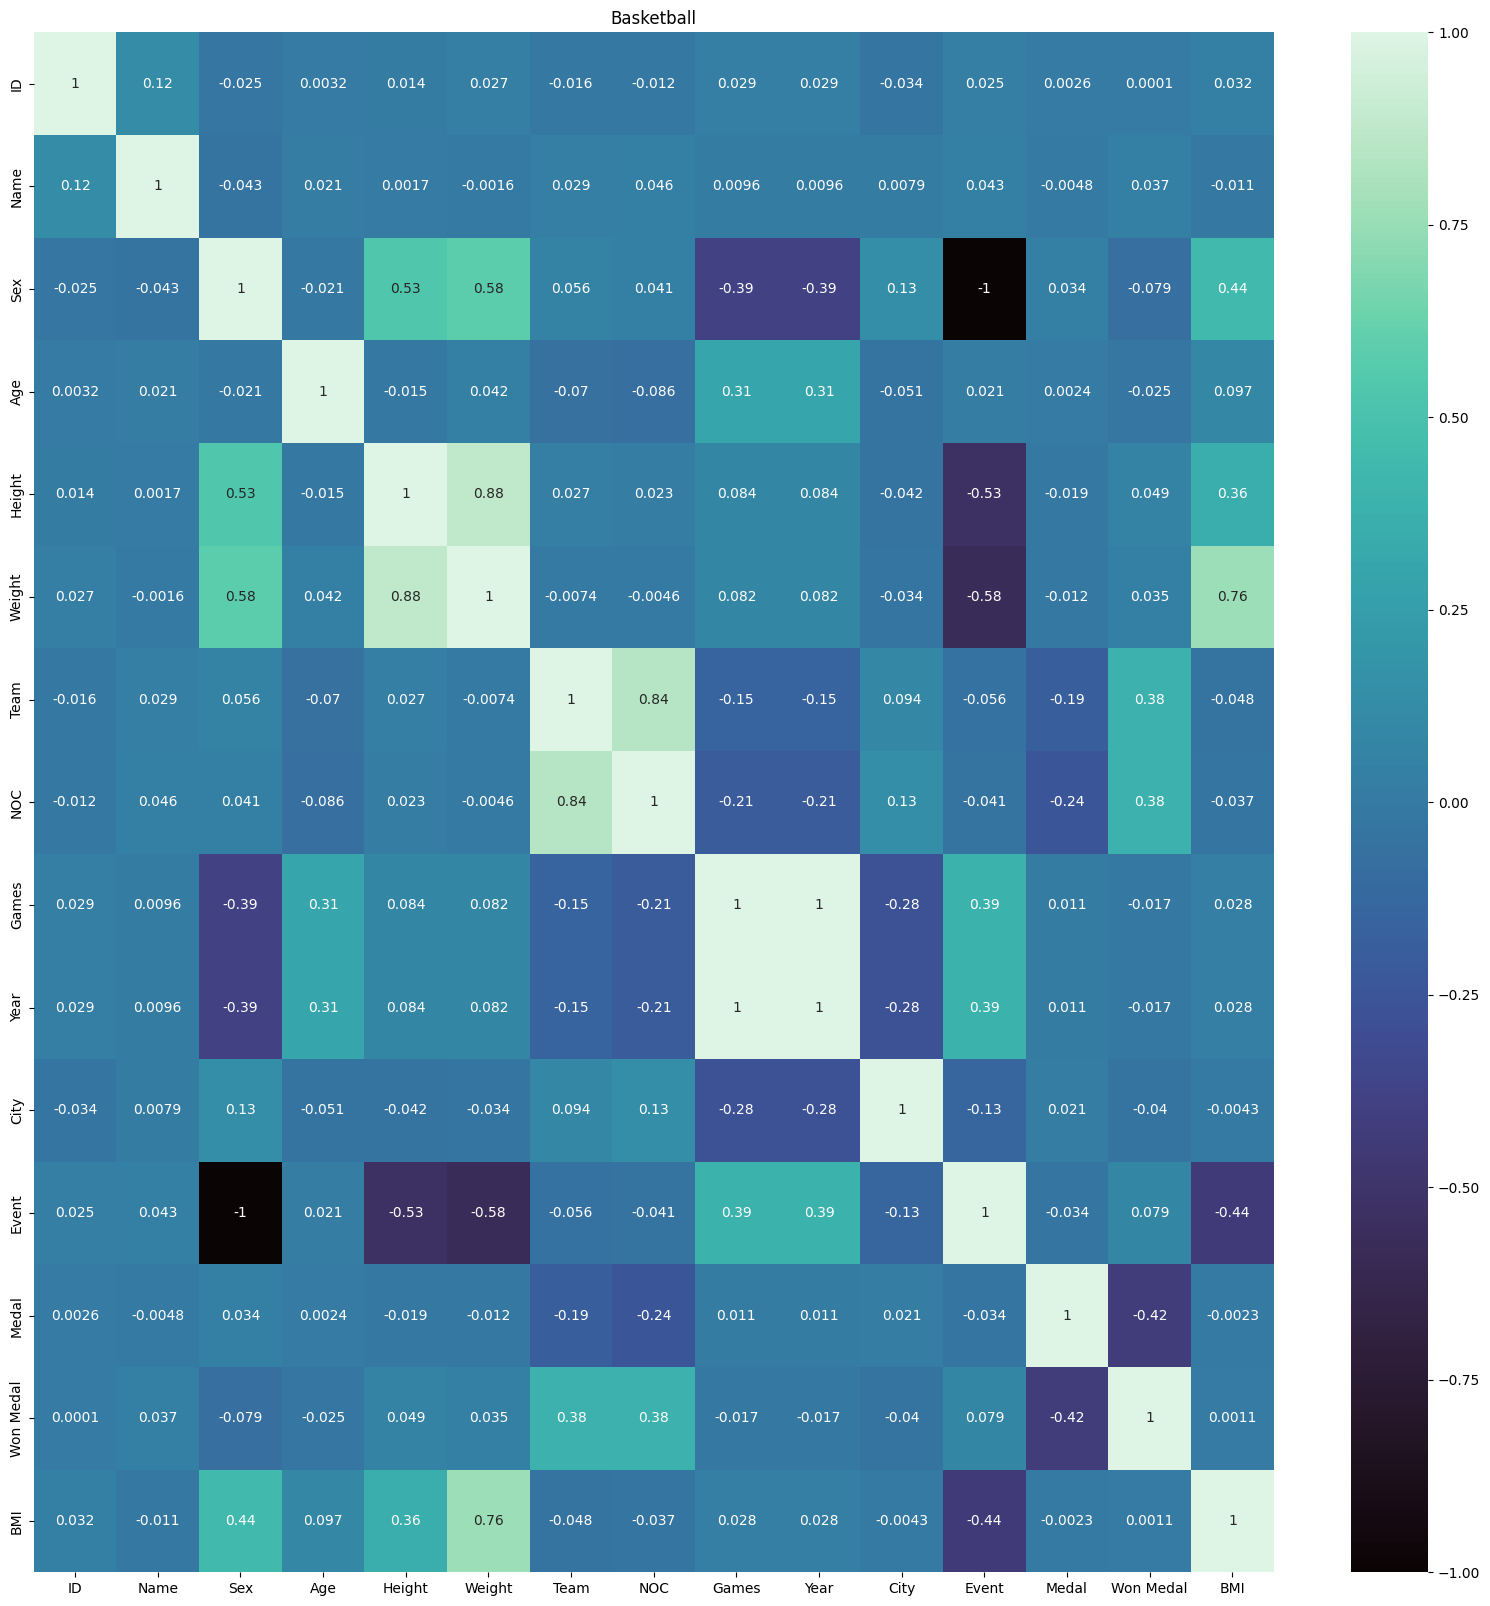

Beach Volleyball


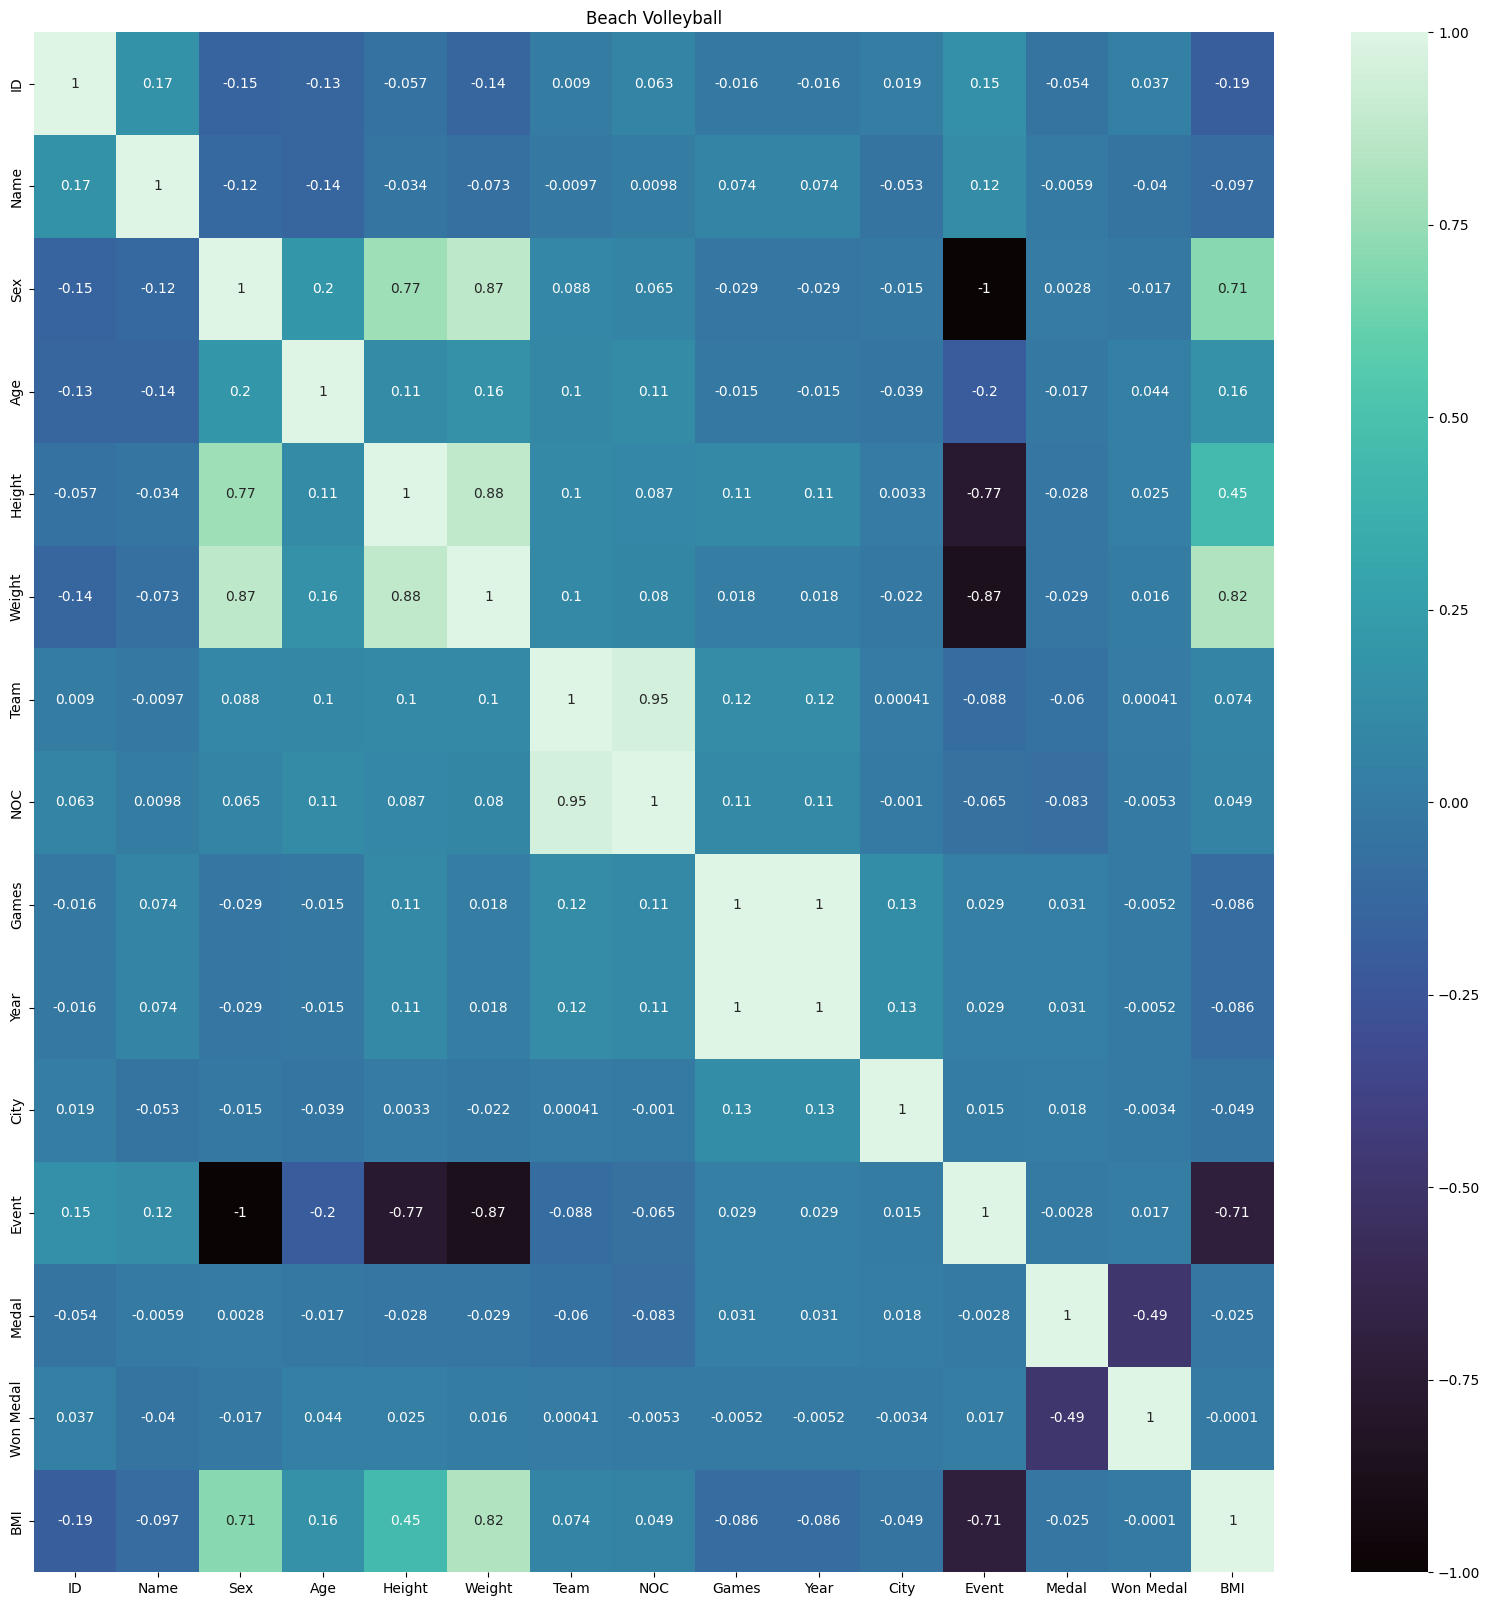

Boxing


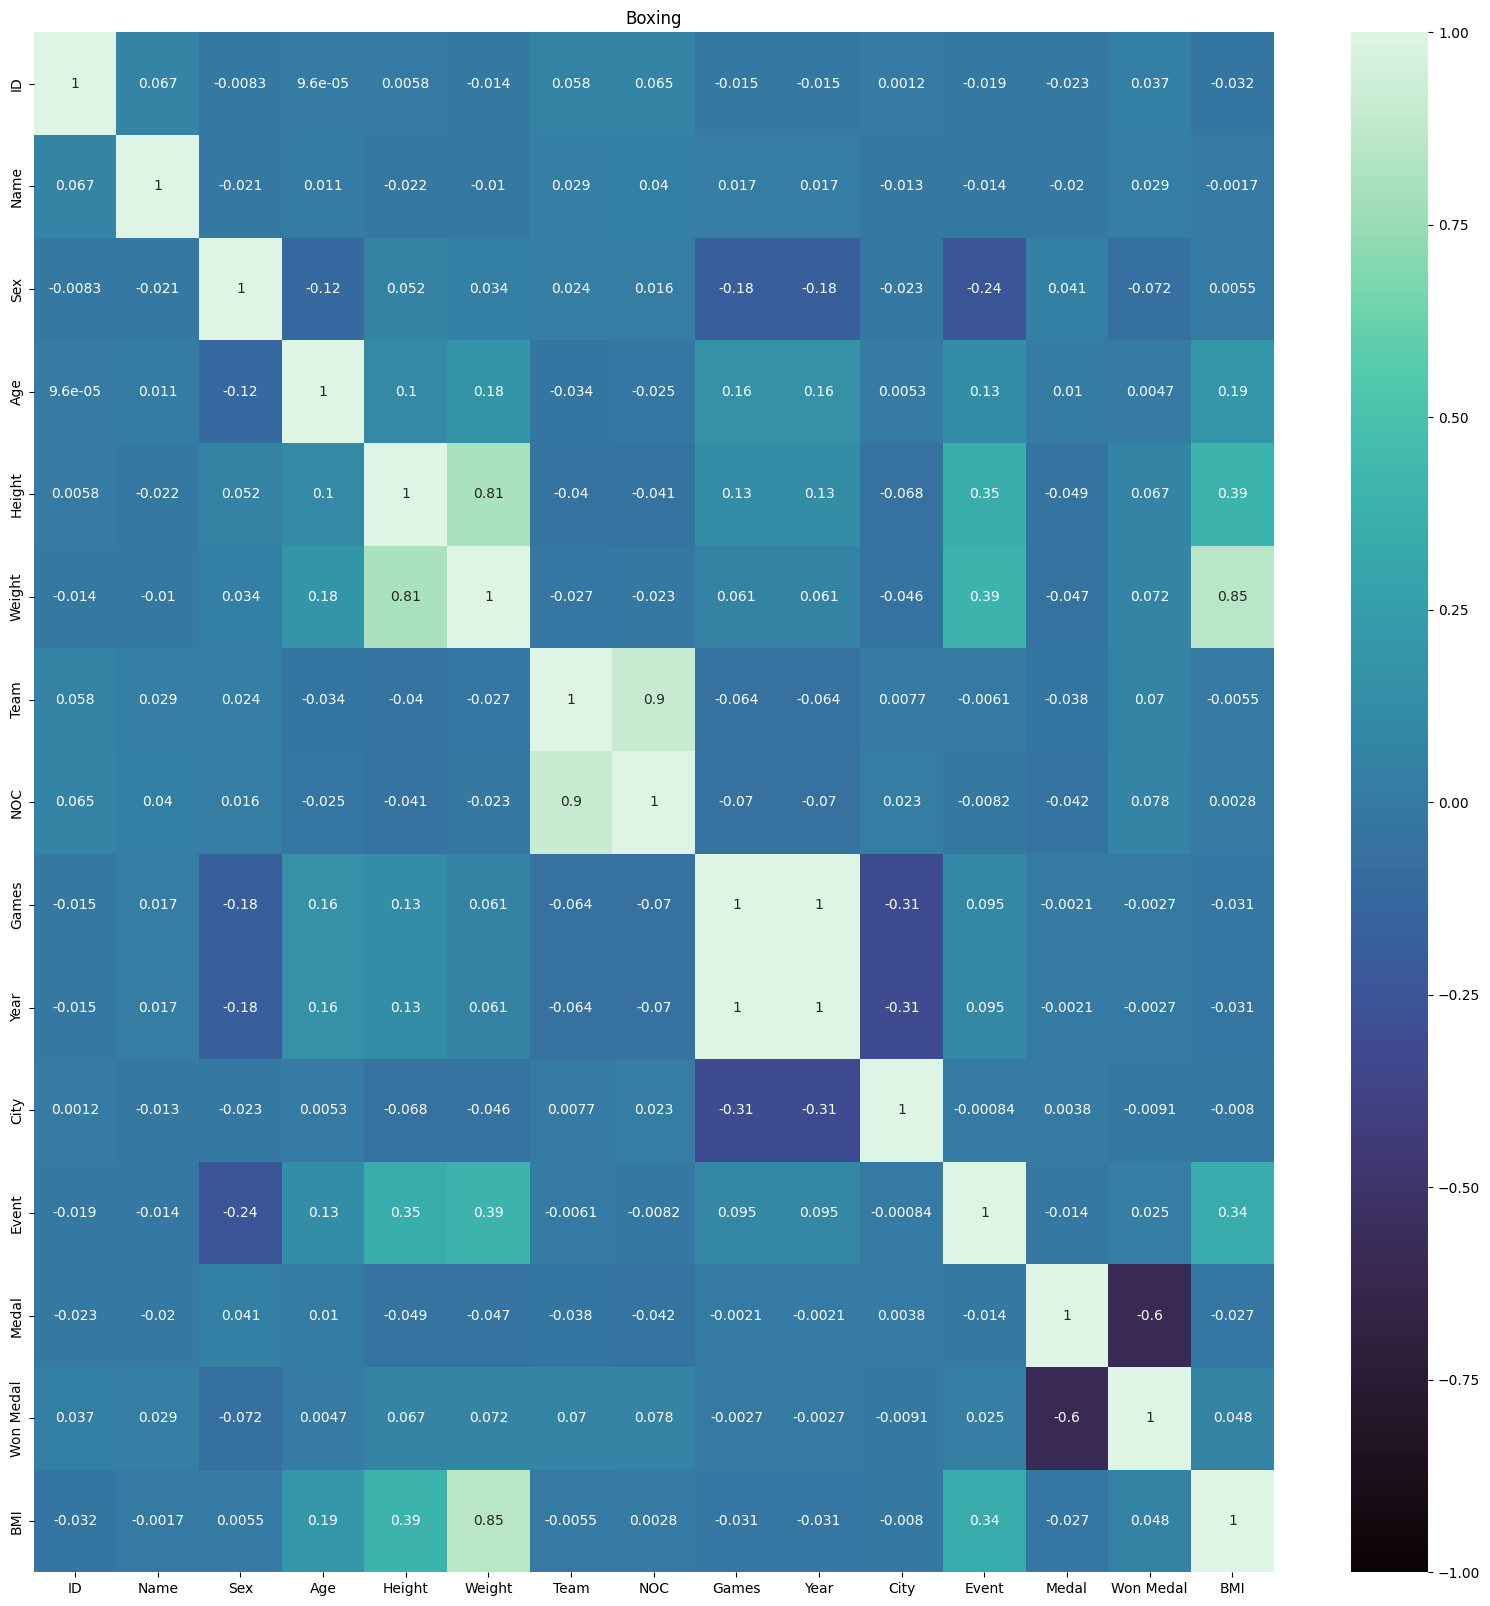

Canoeing


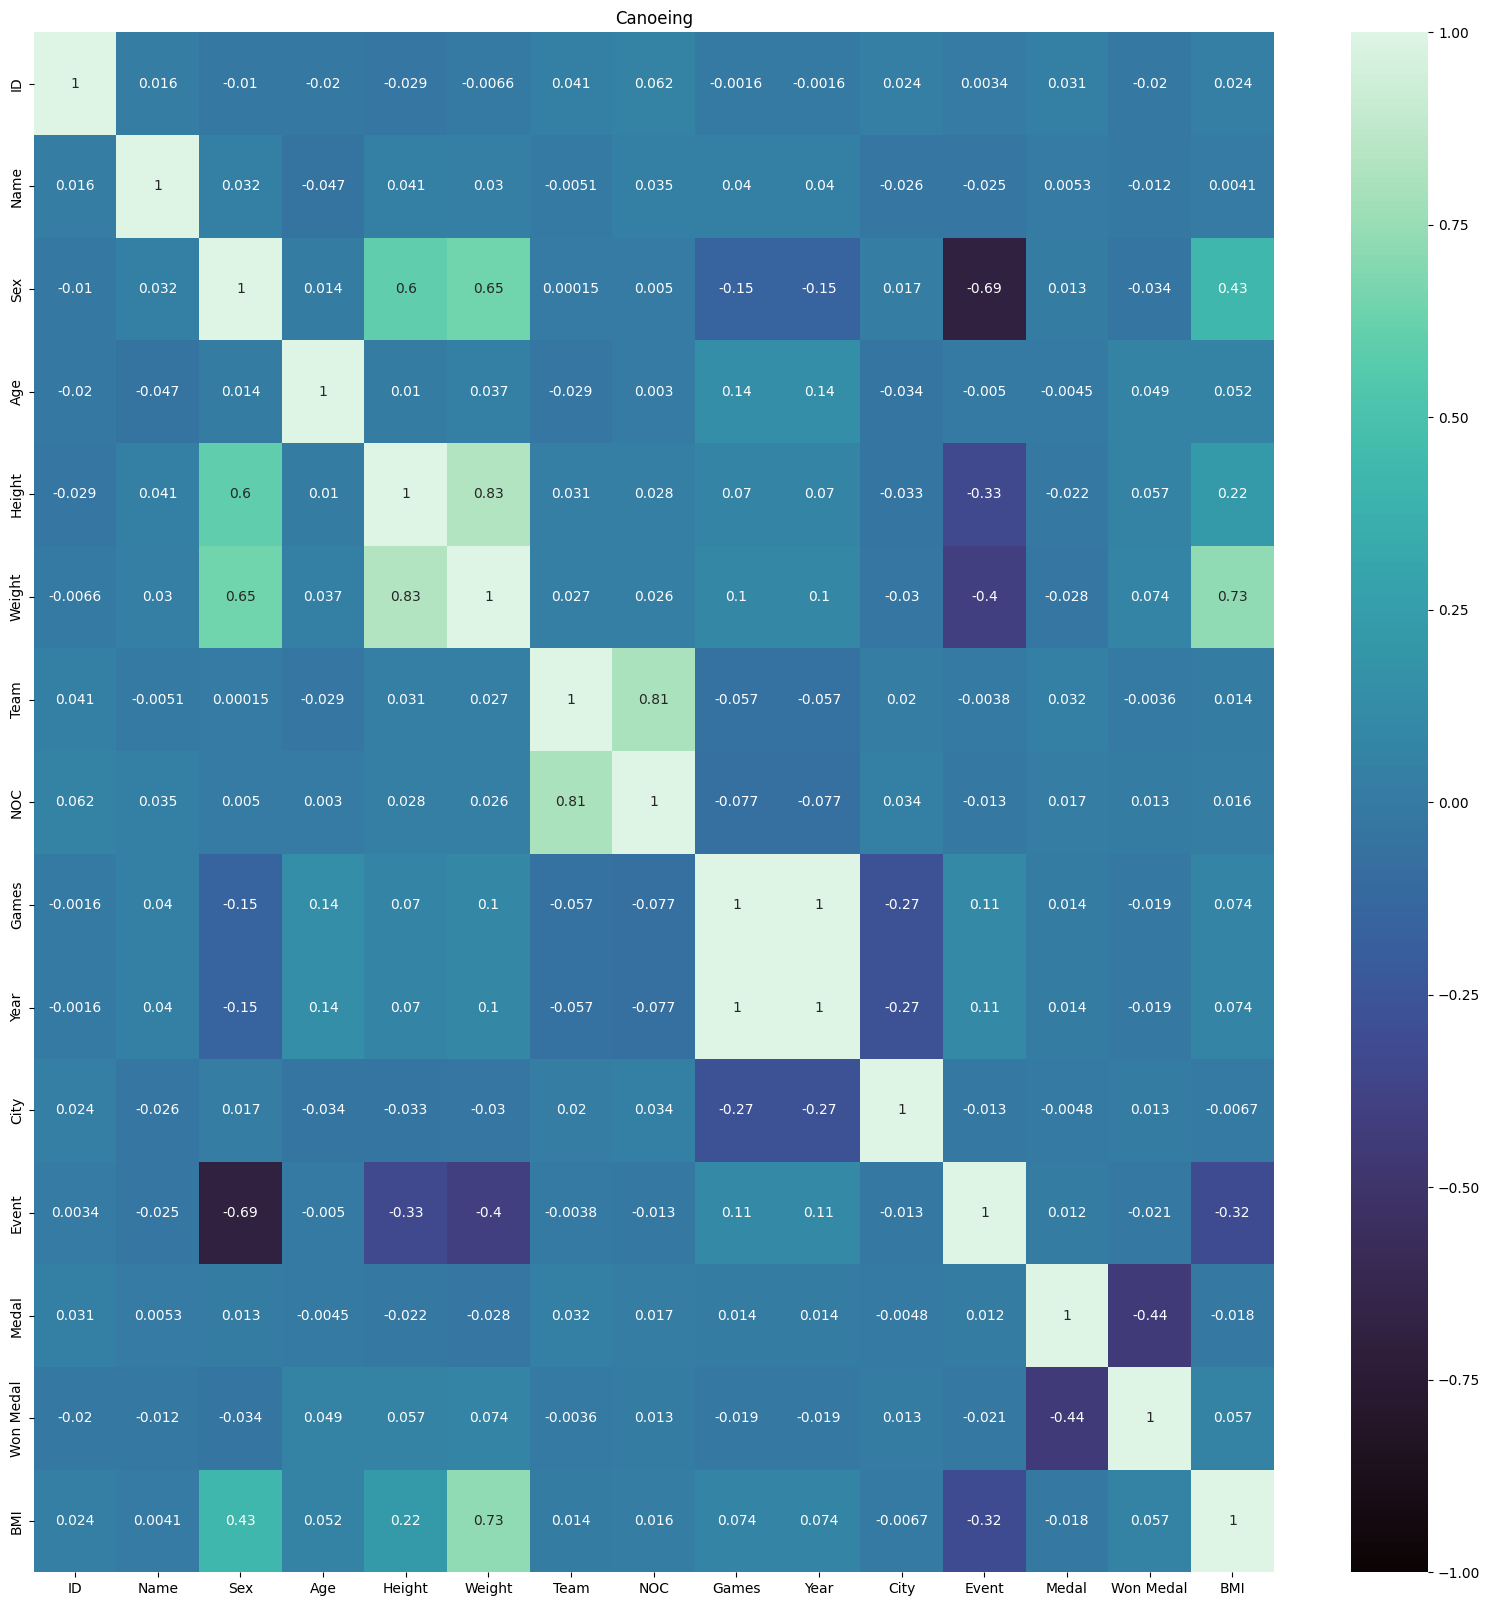

Cycling


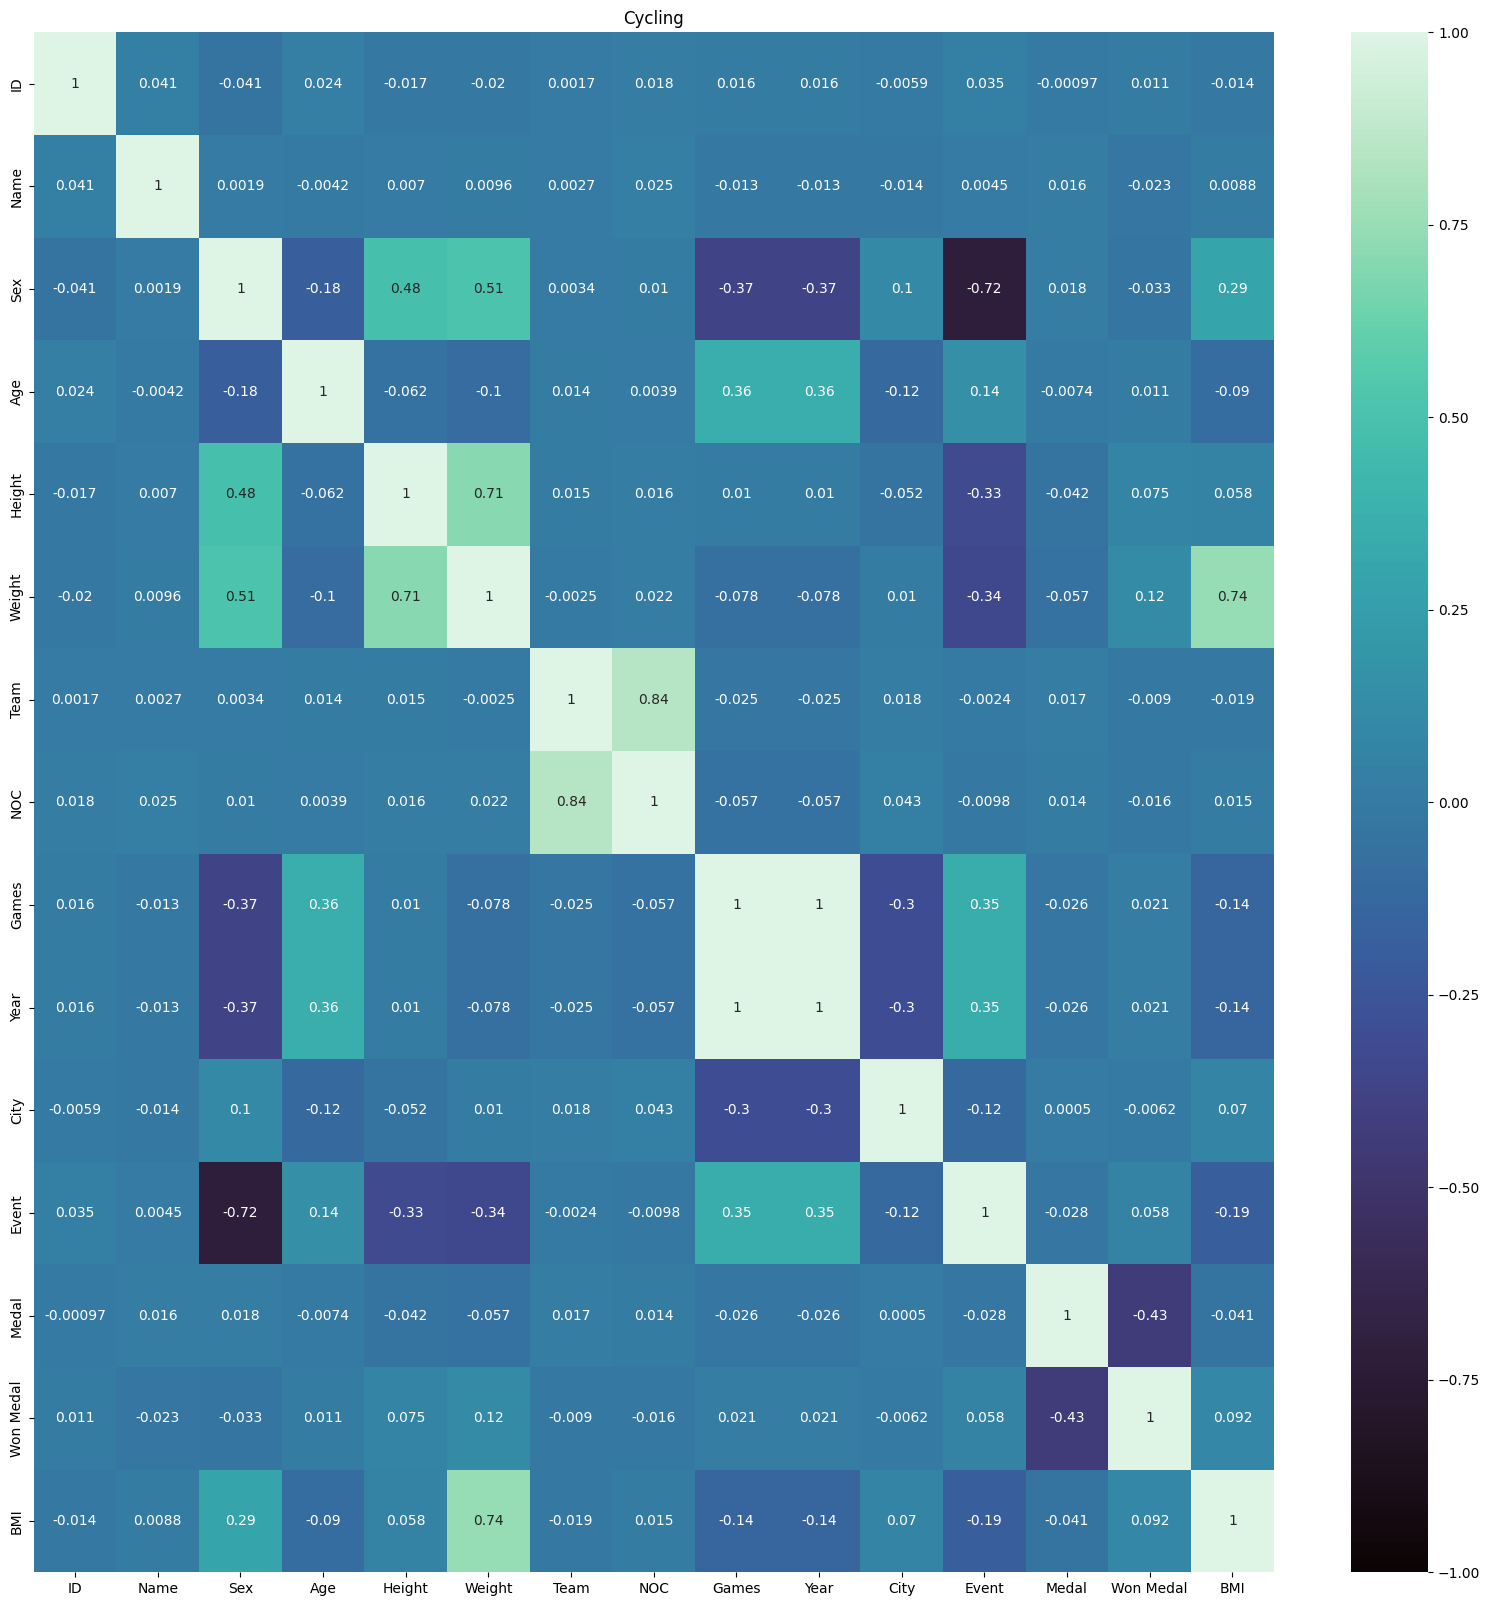

Diving


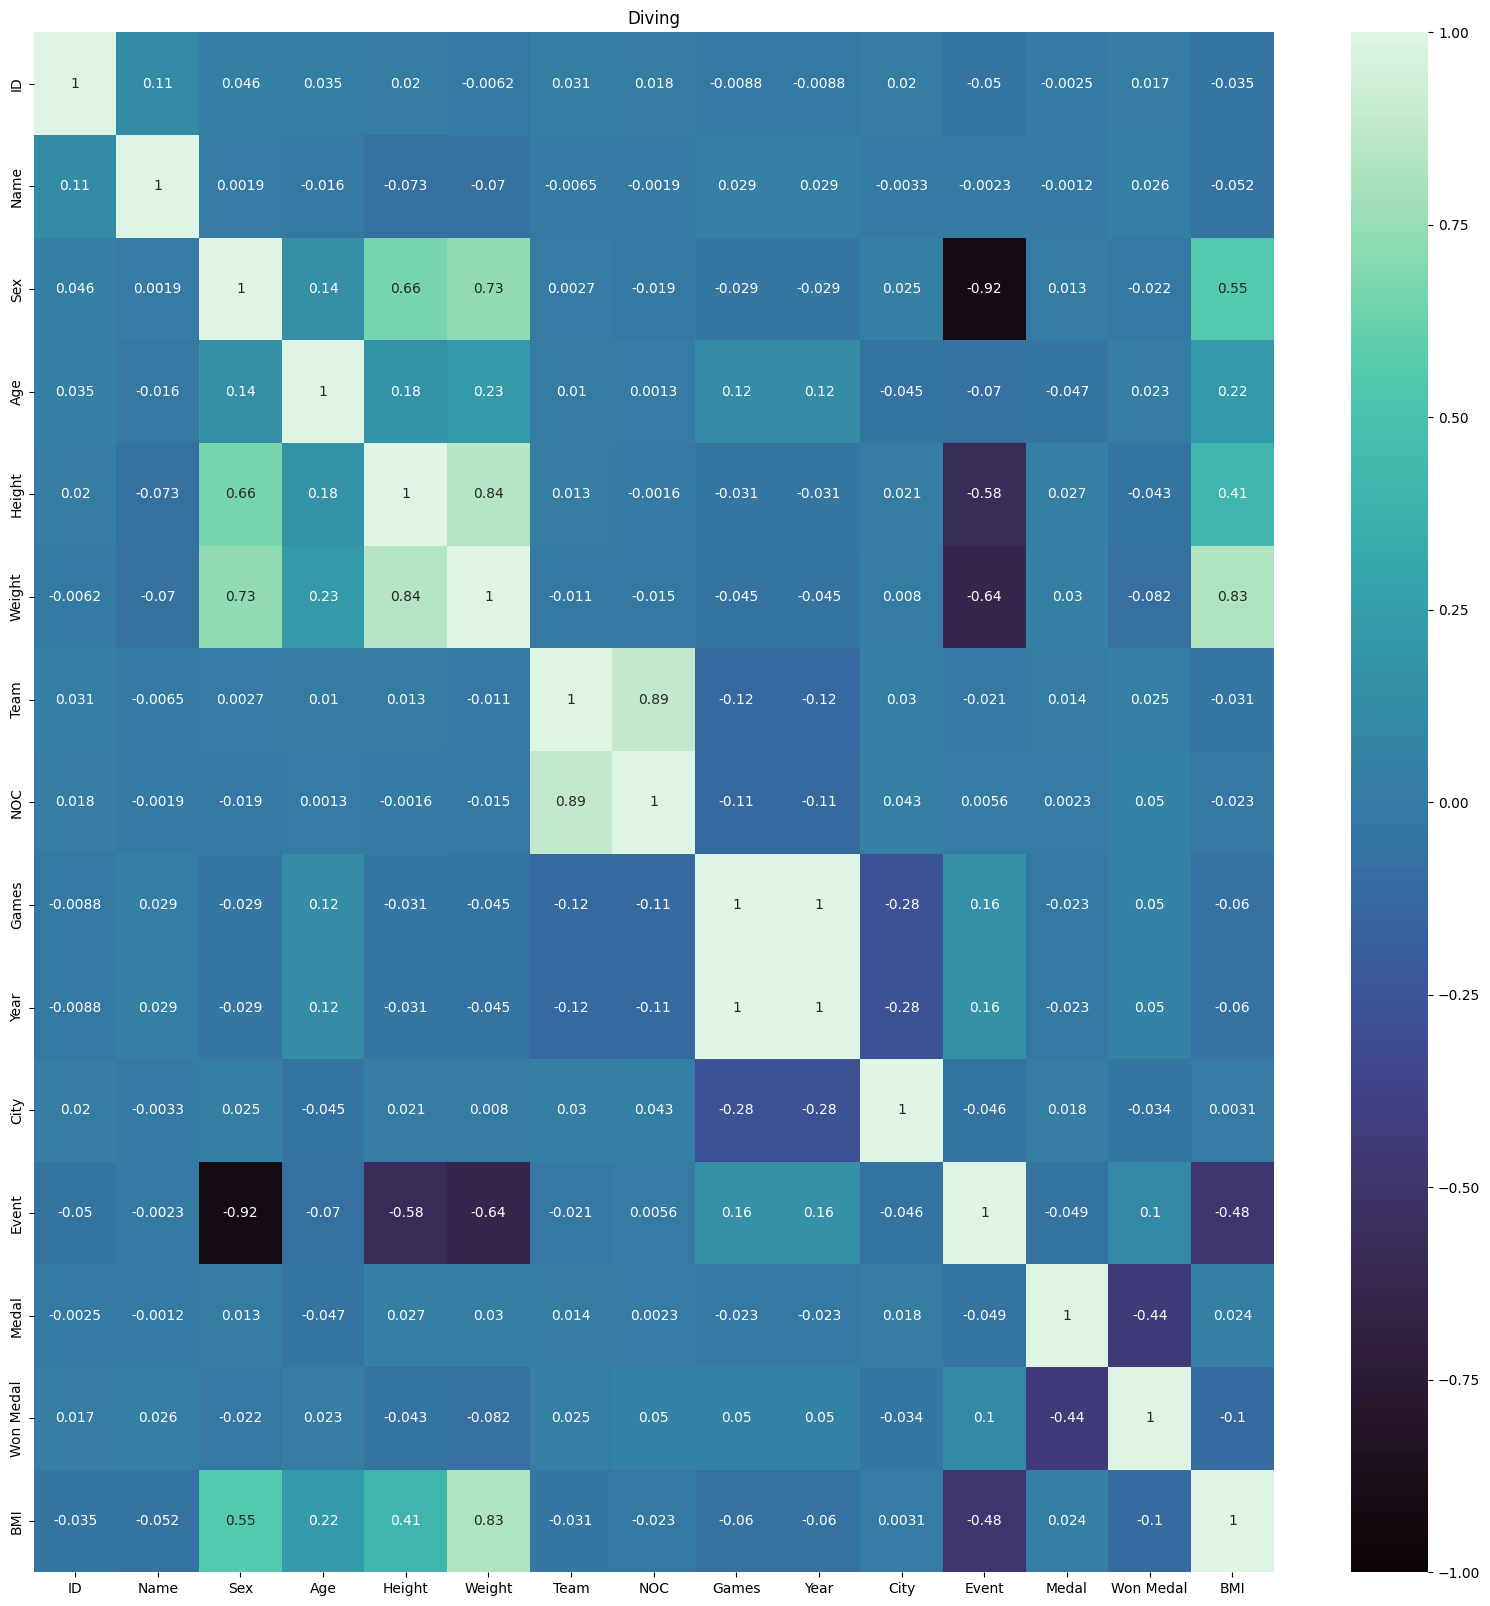

Equestrianism


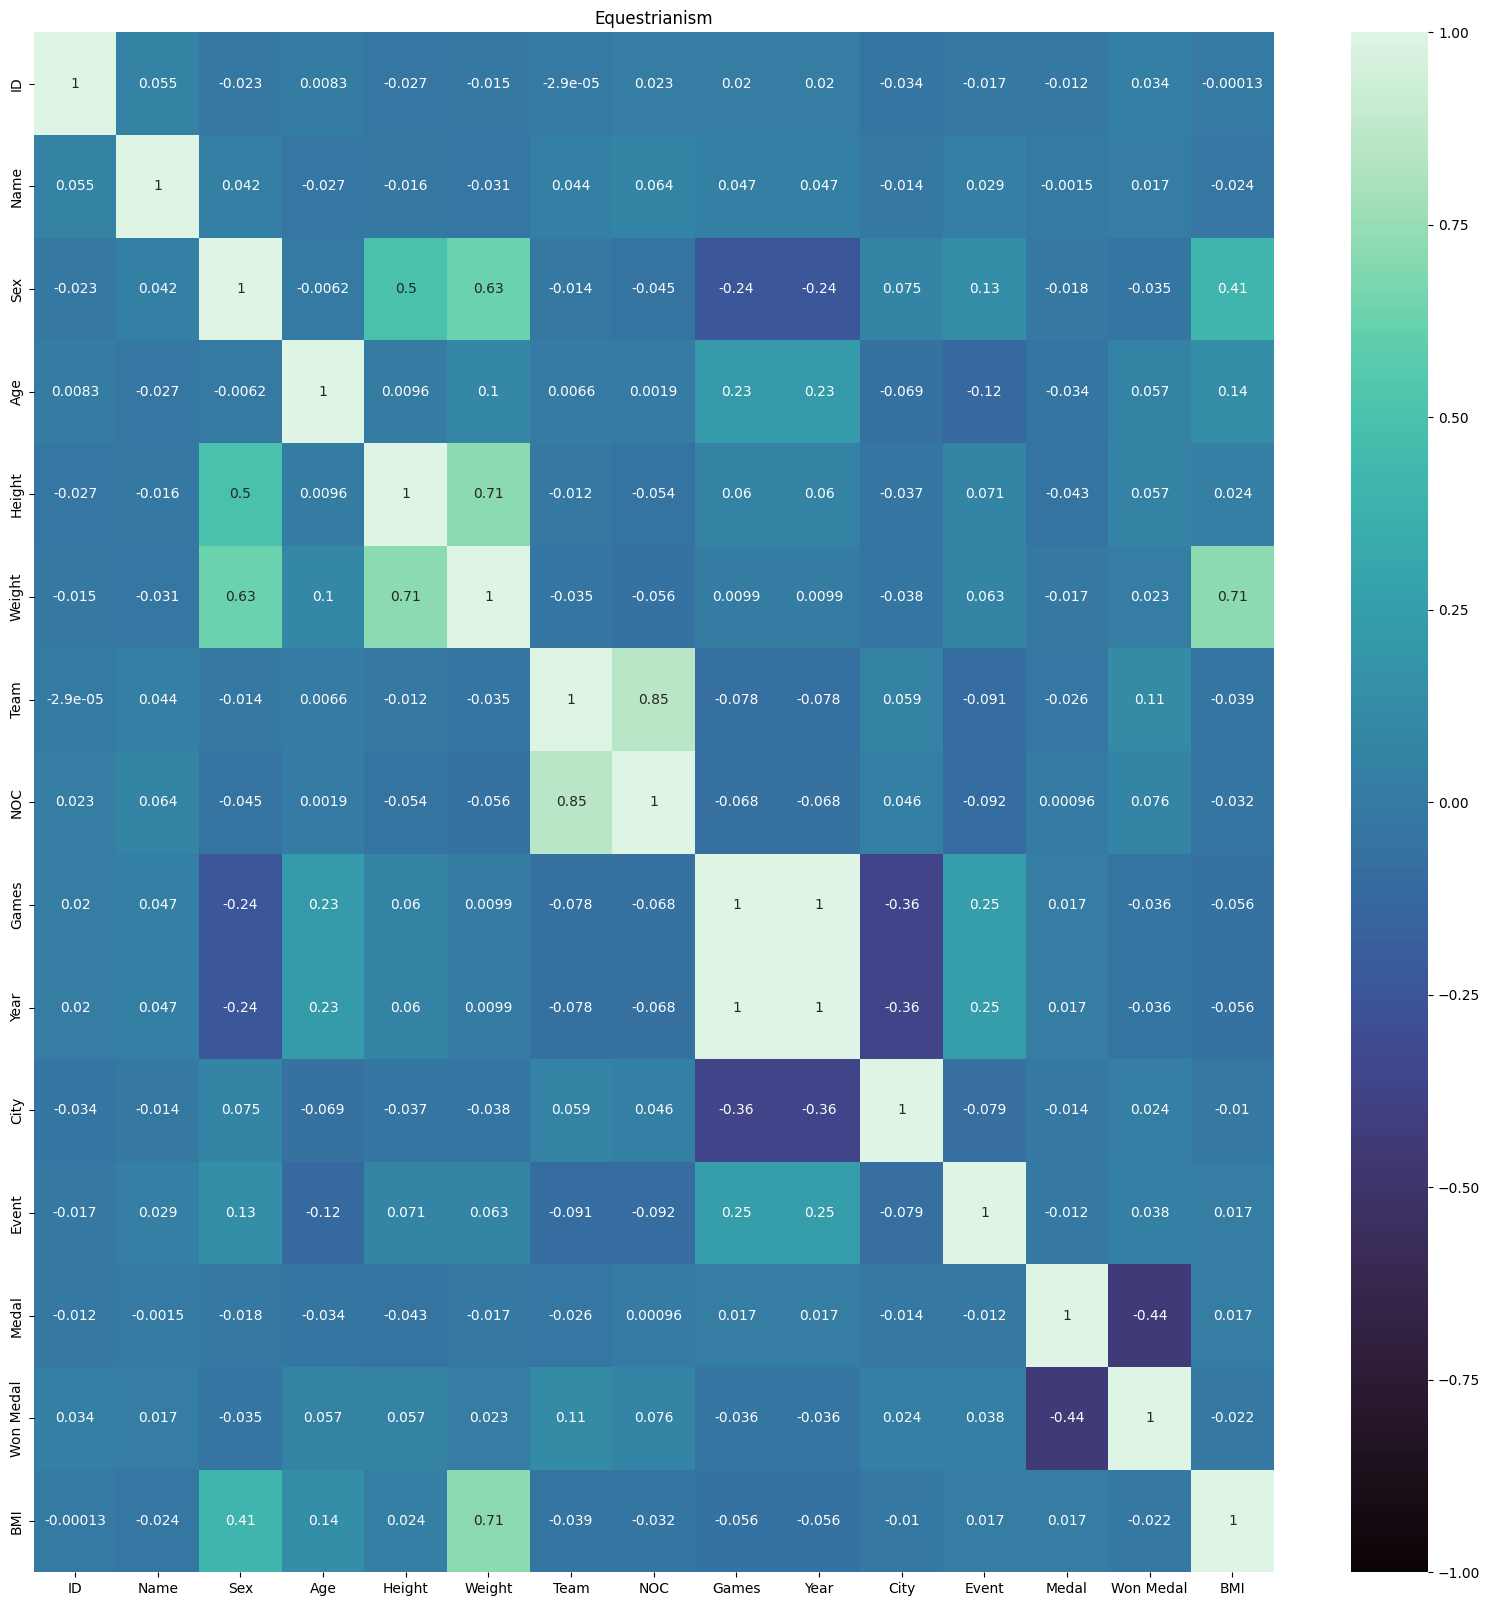

Fencing


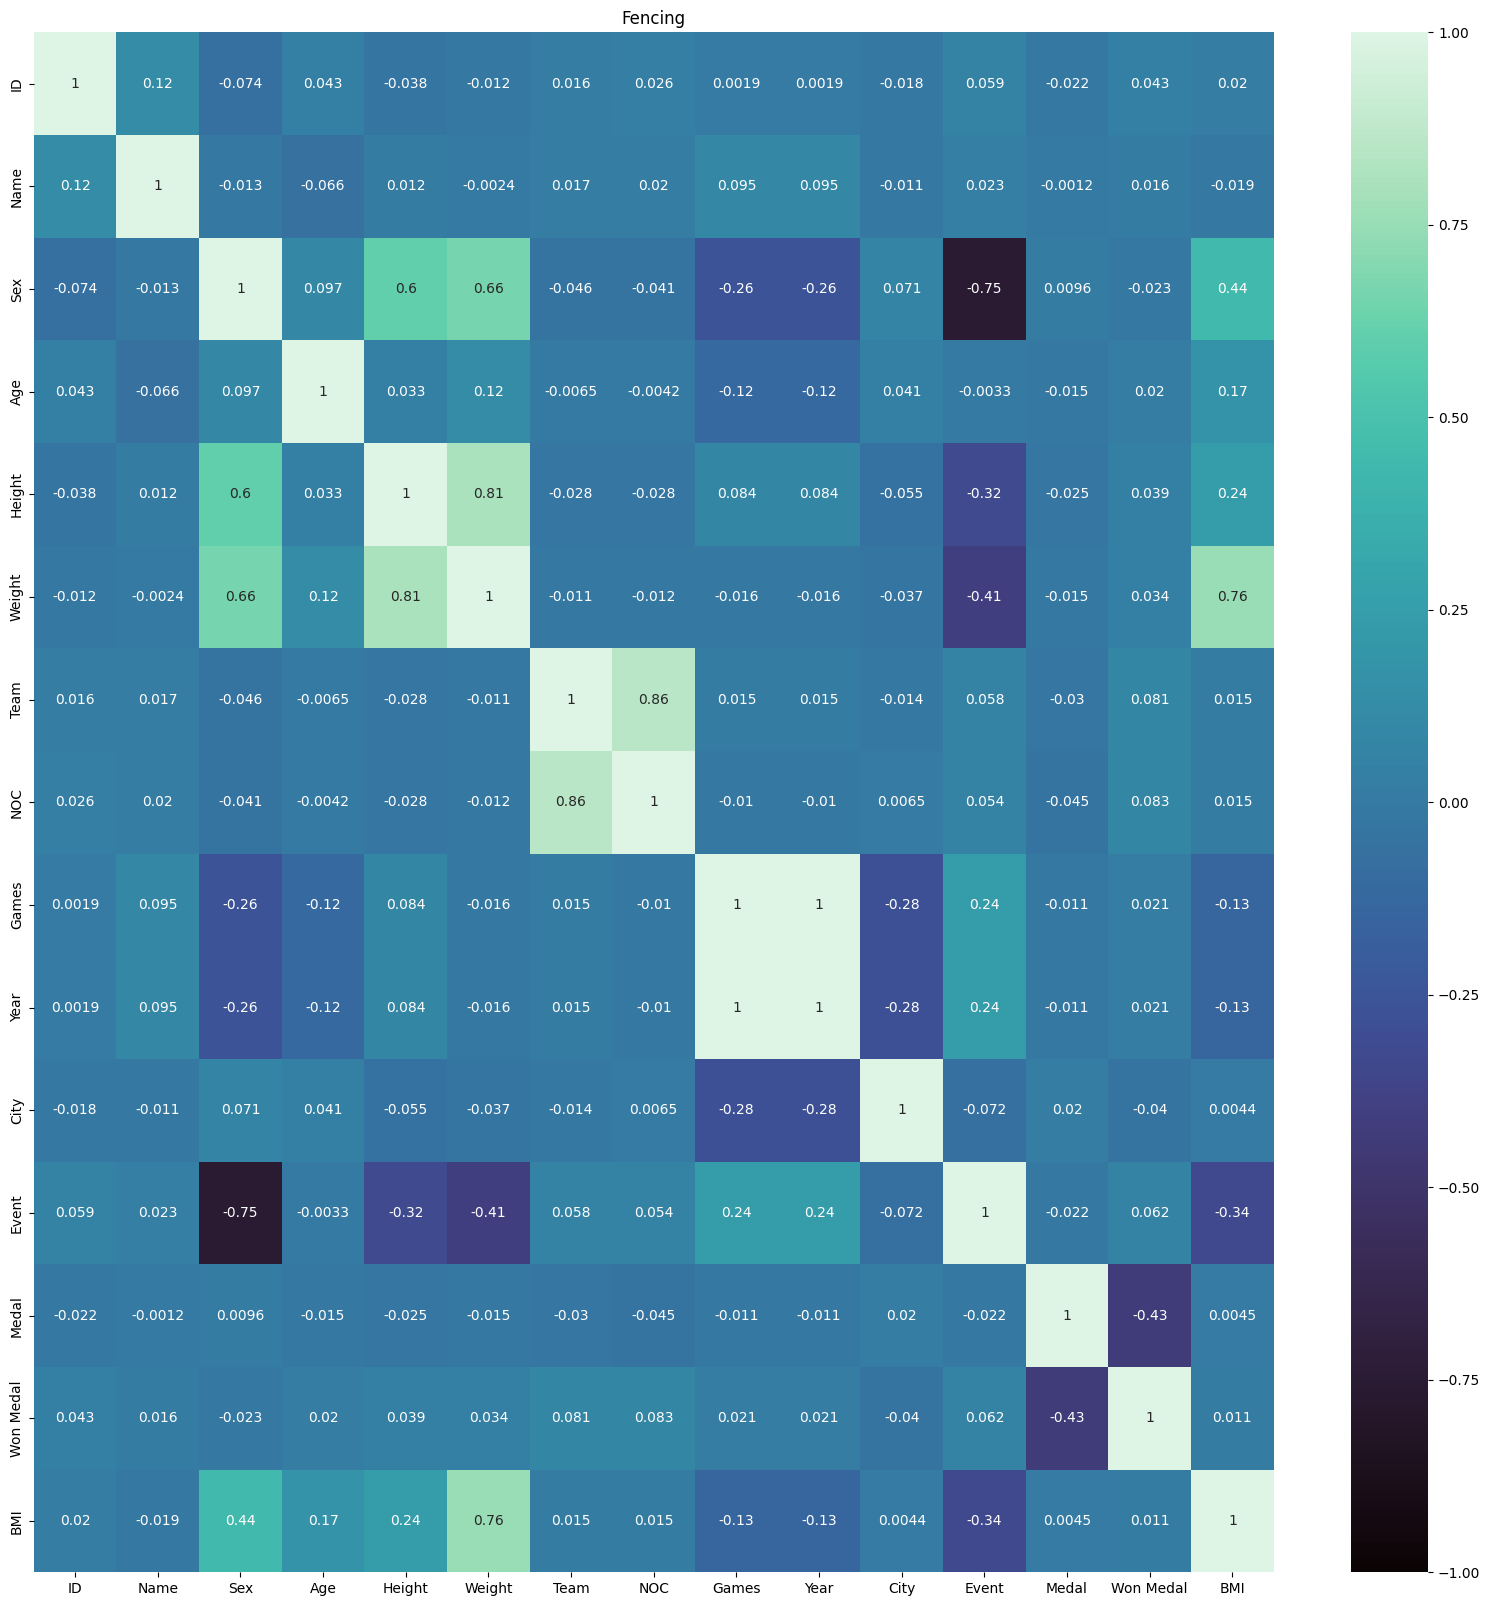

Football


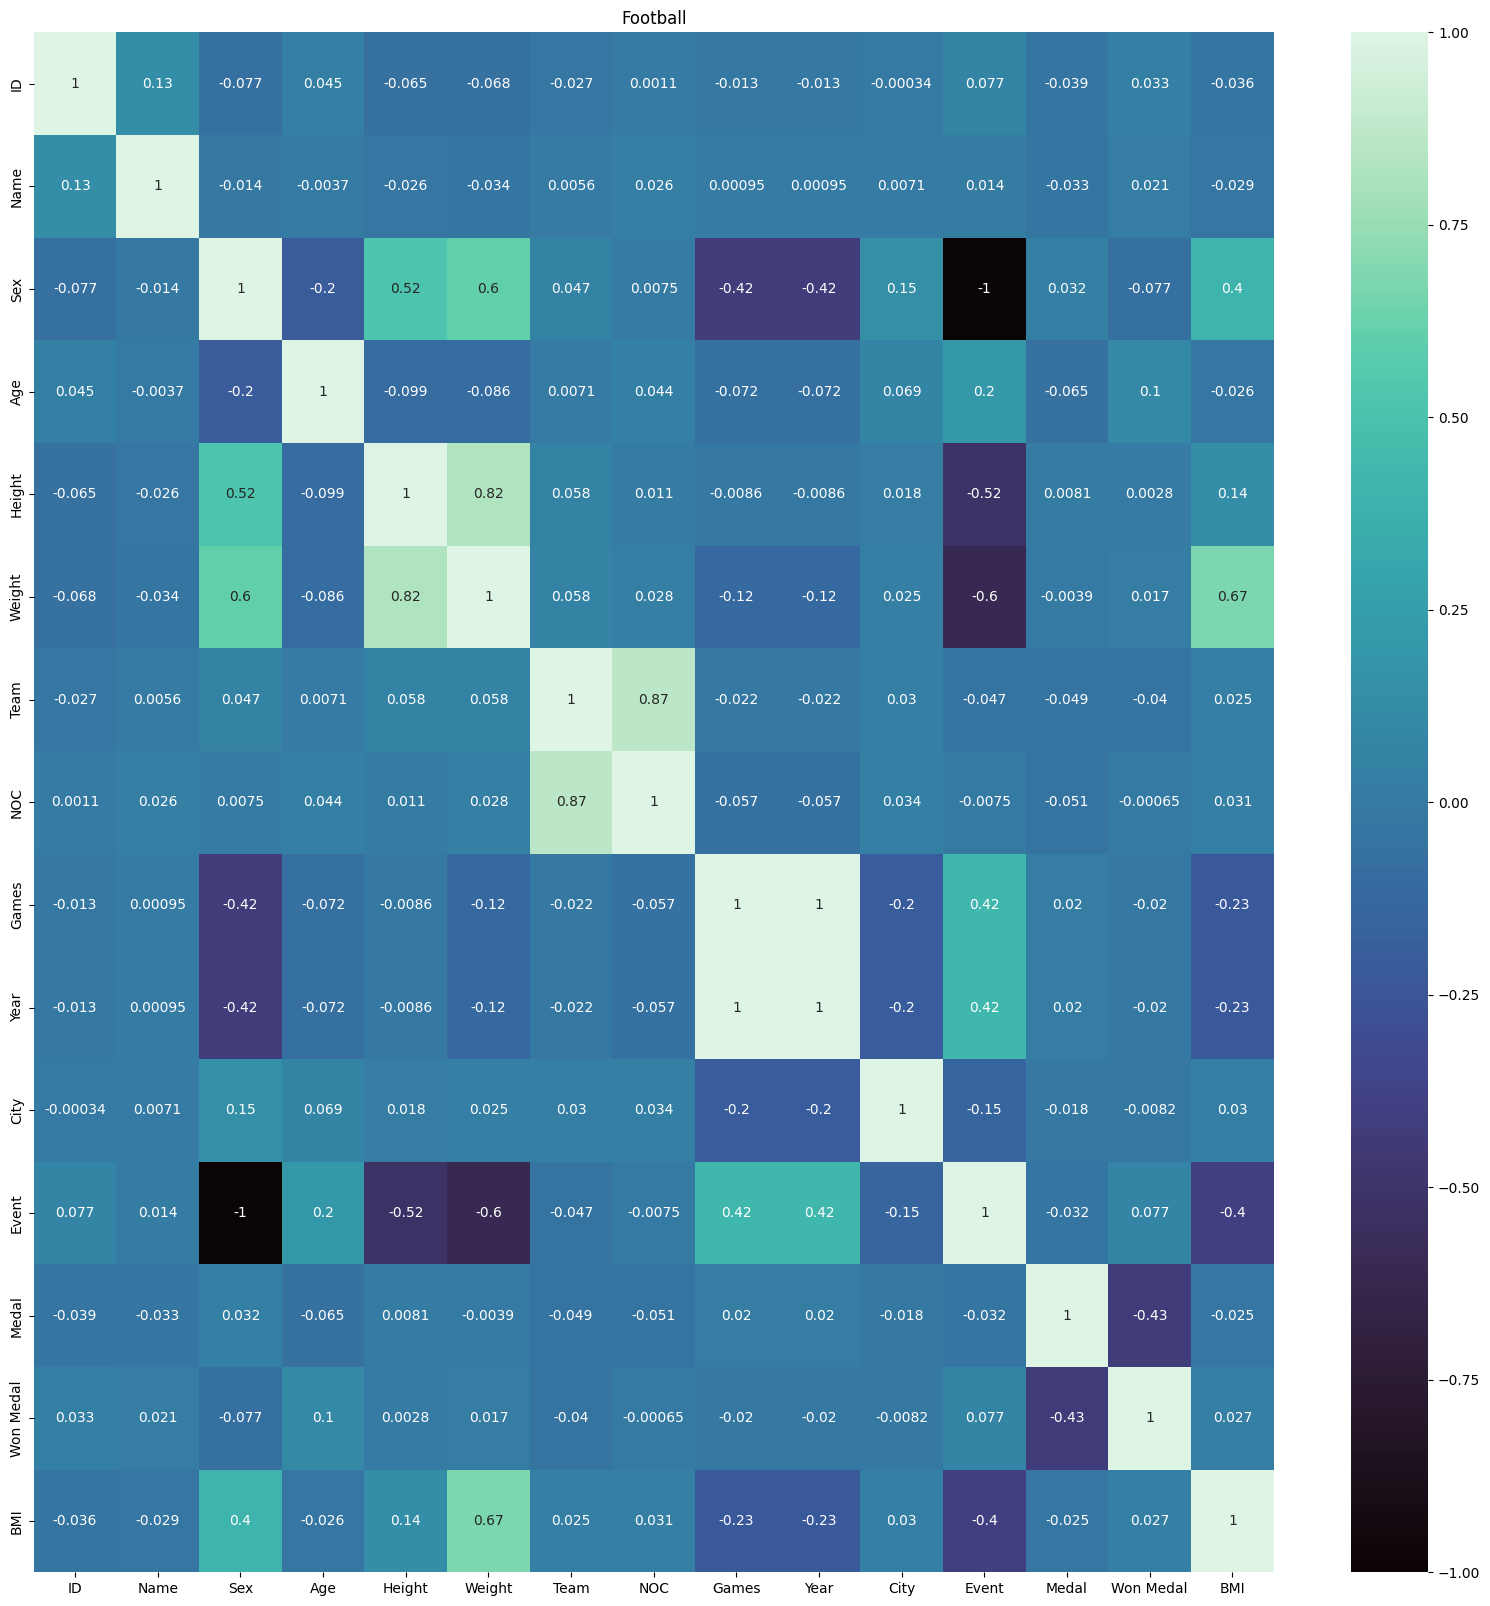

Golf


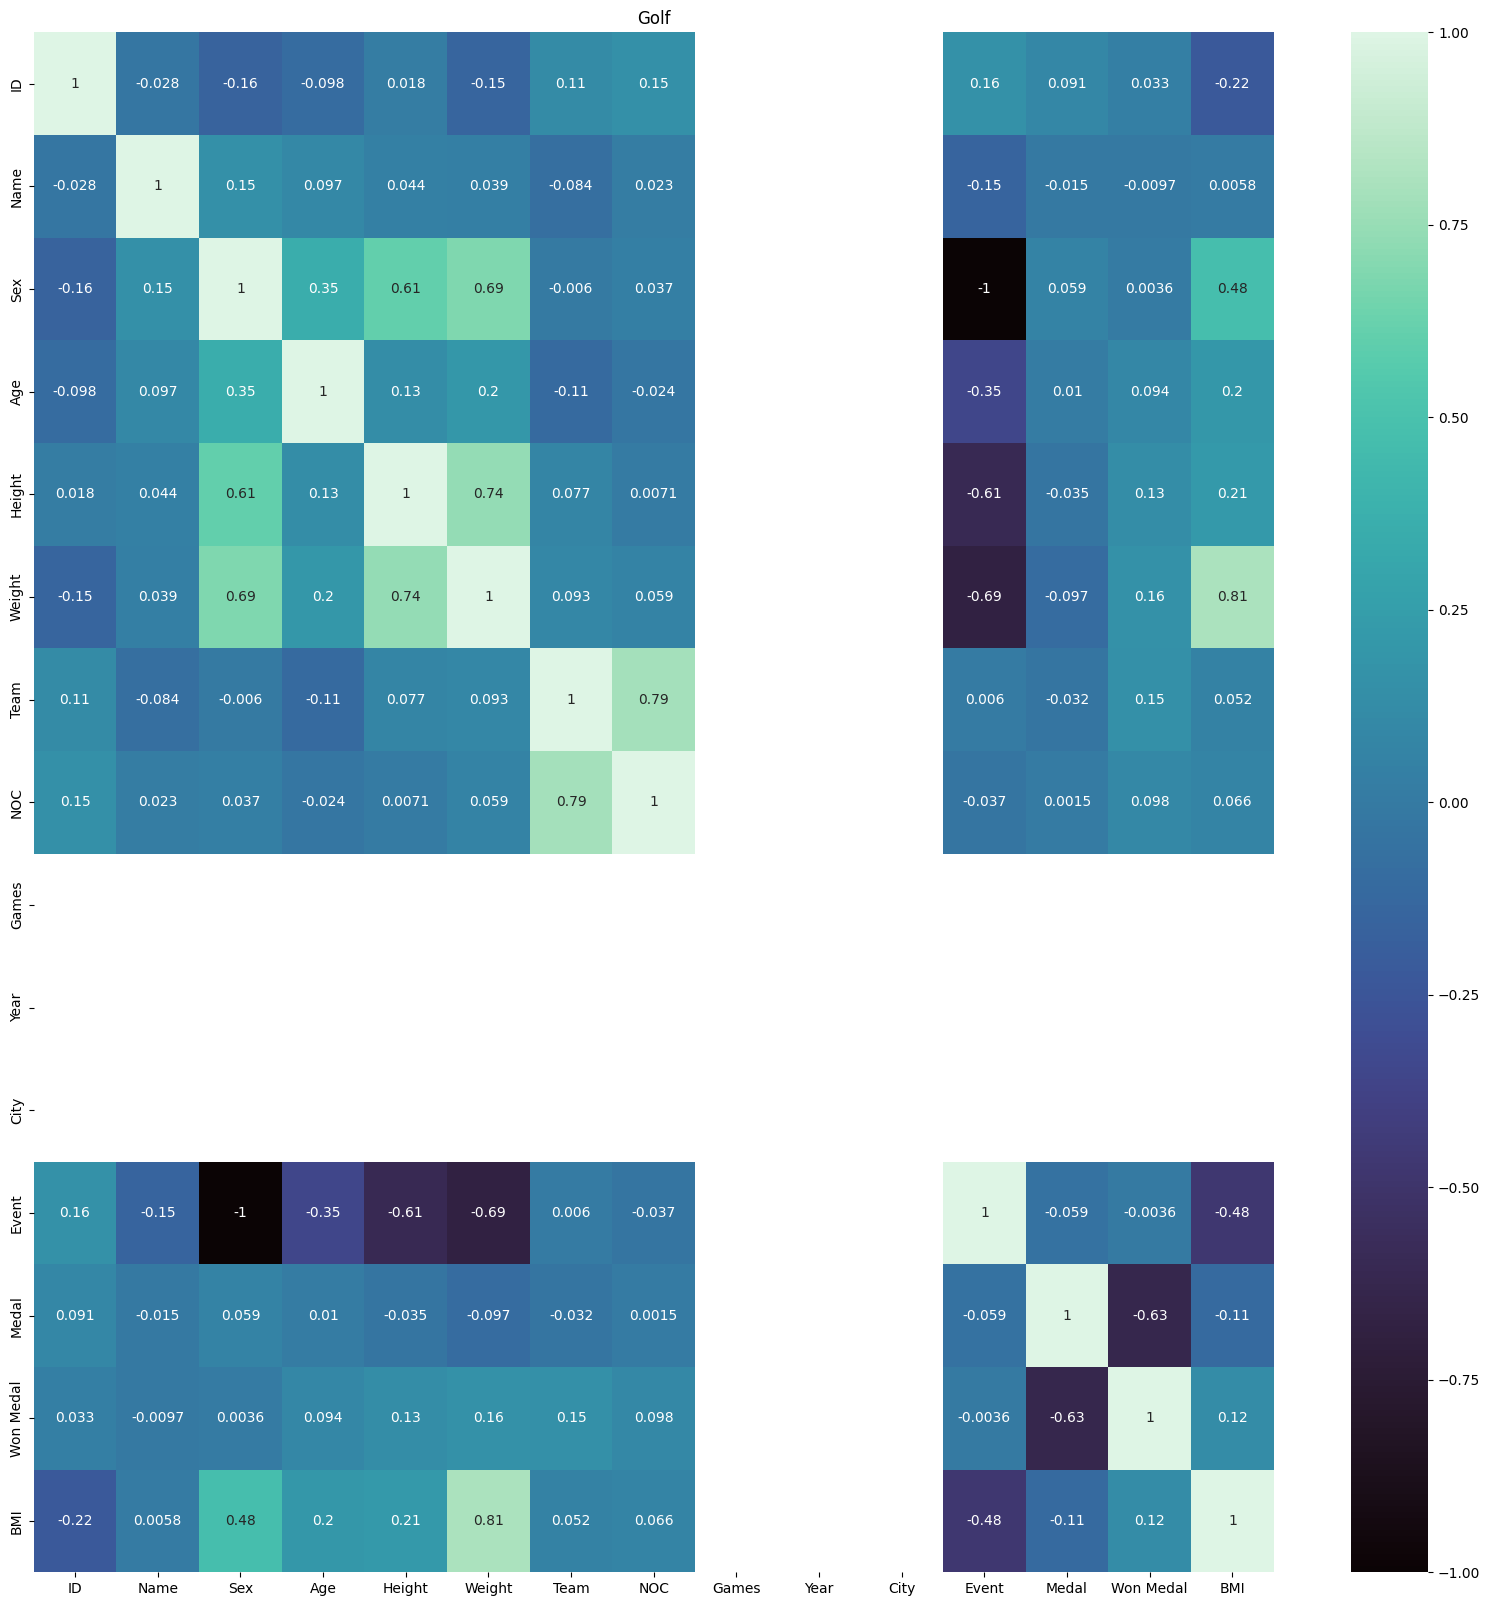

Gymnastics


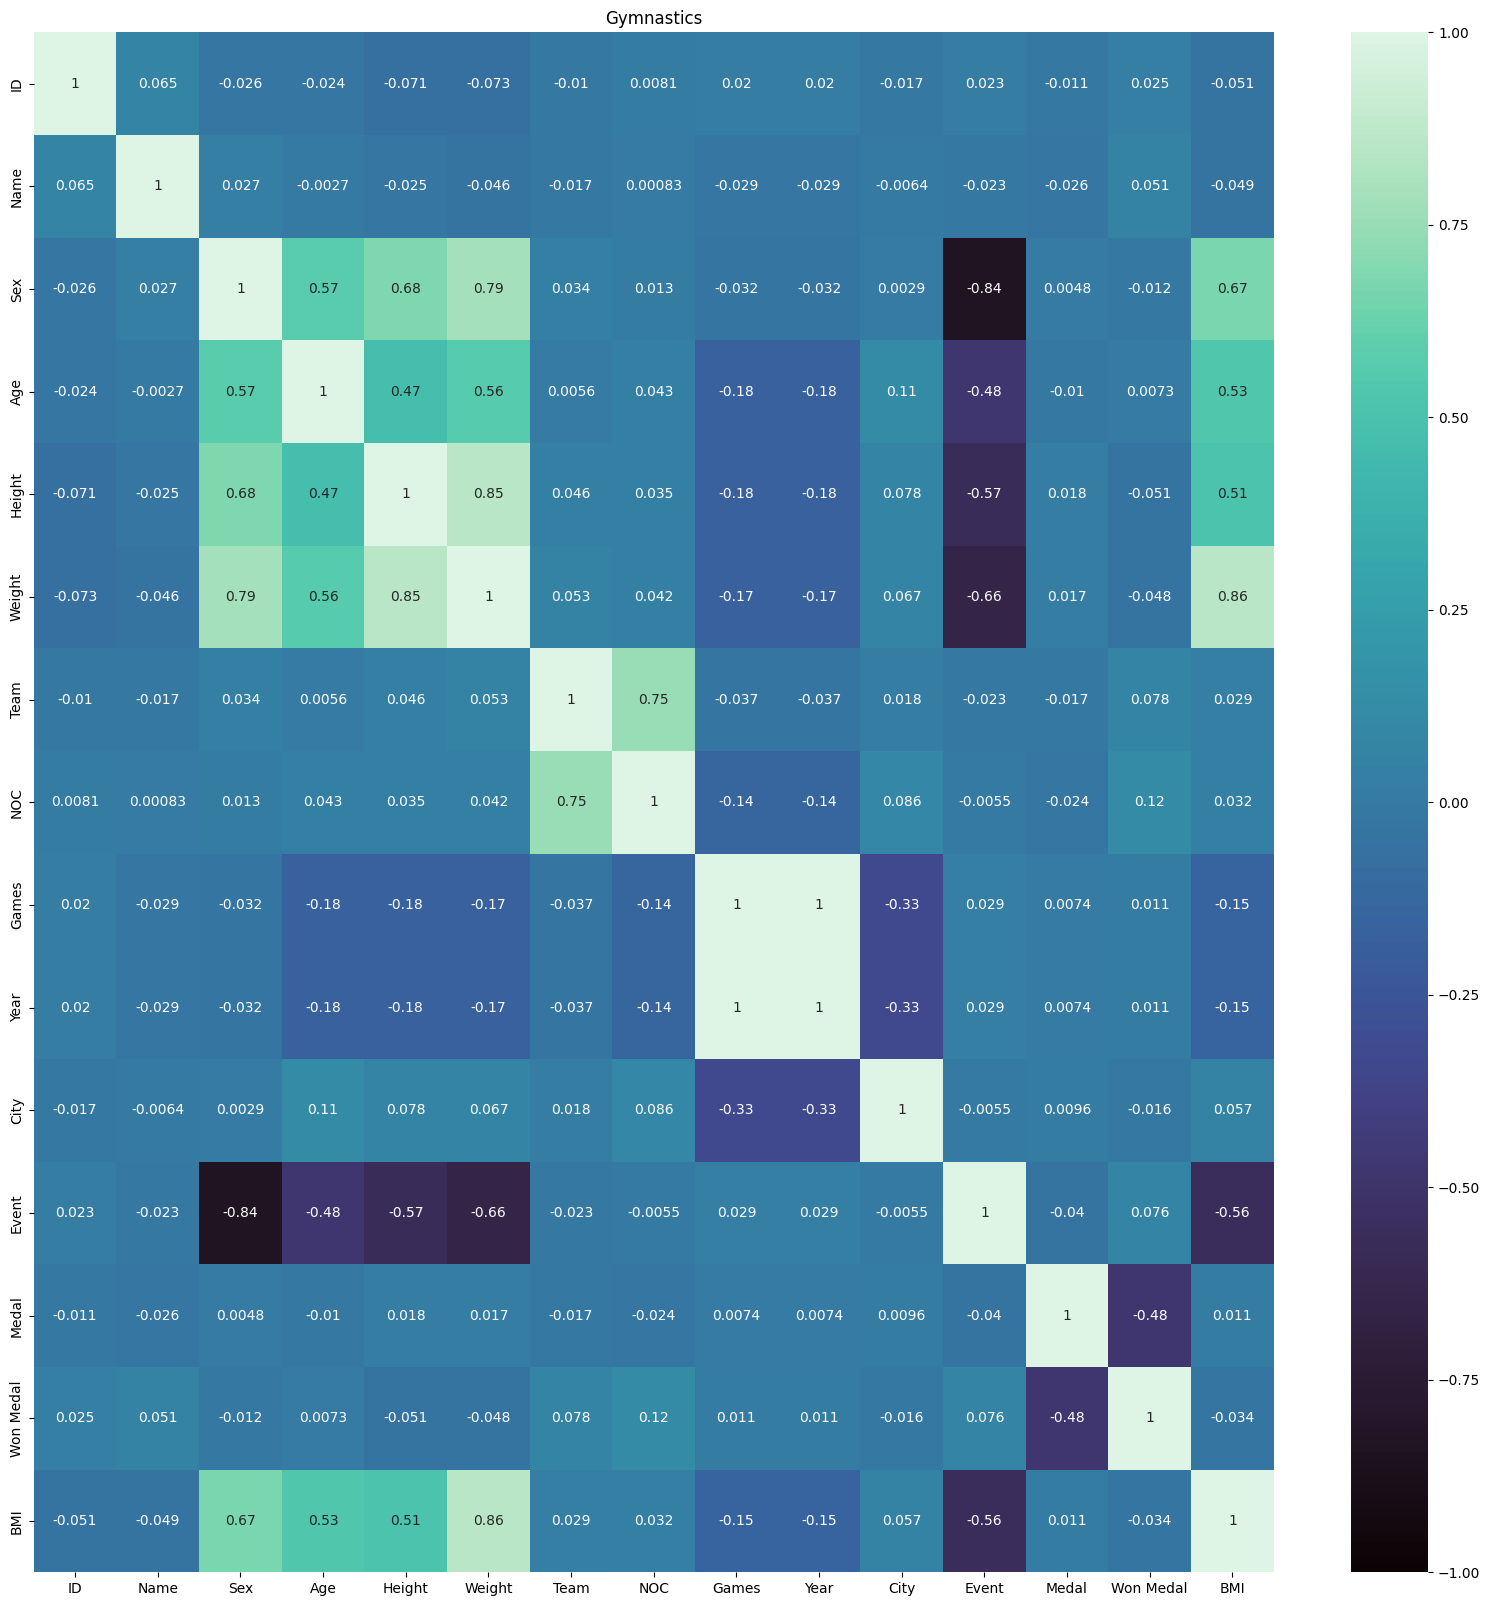

Handball


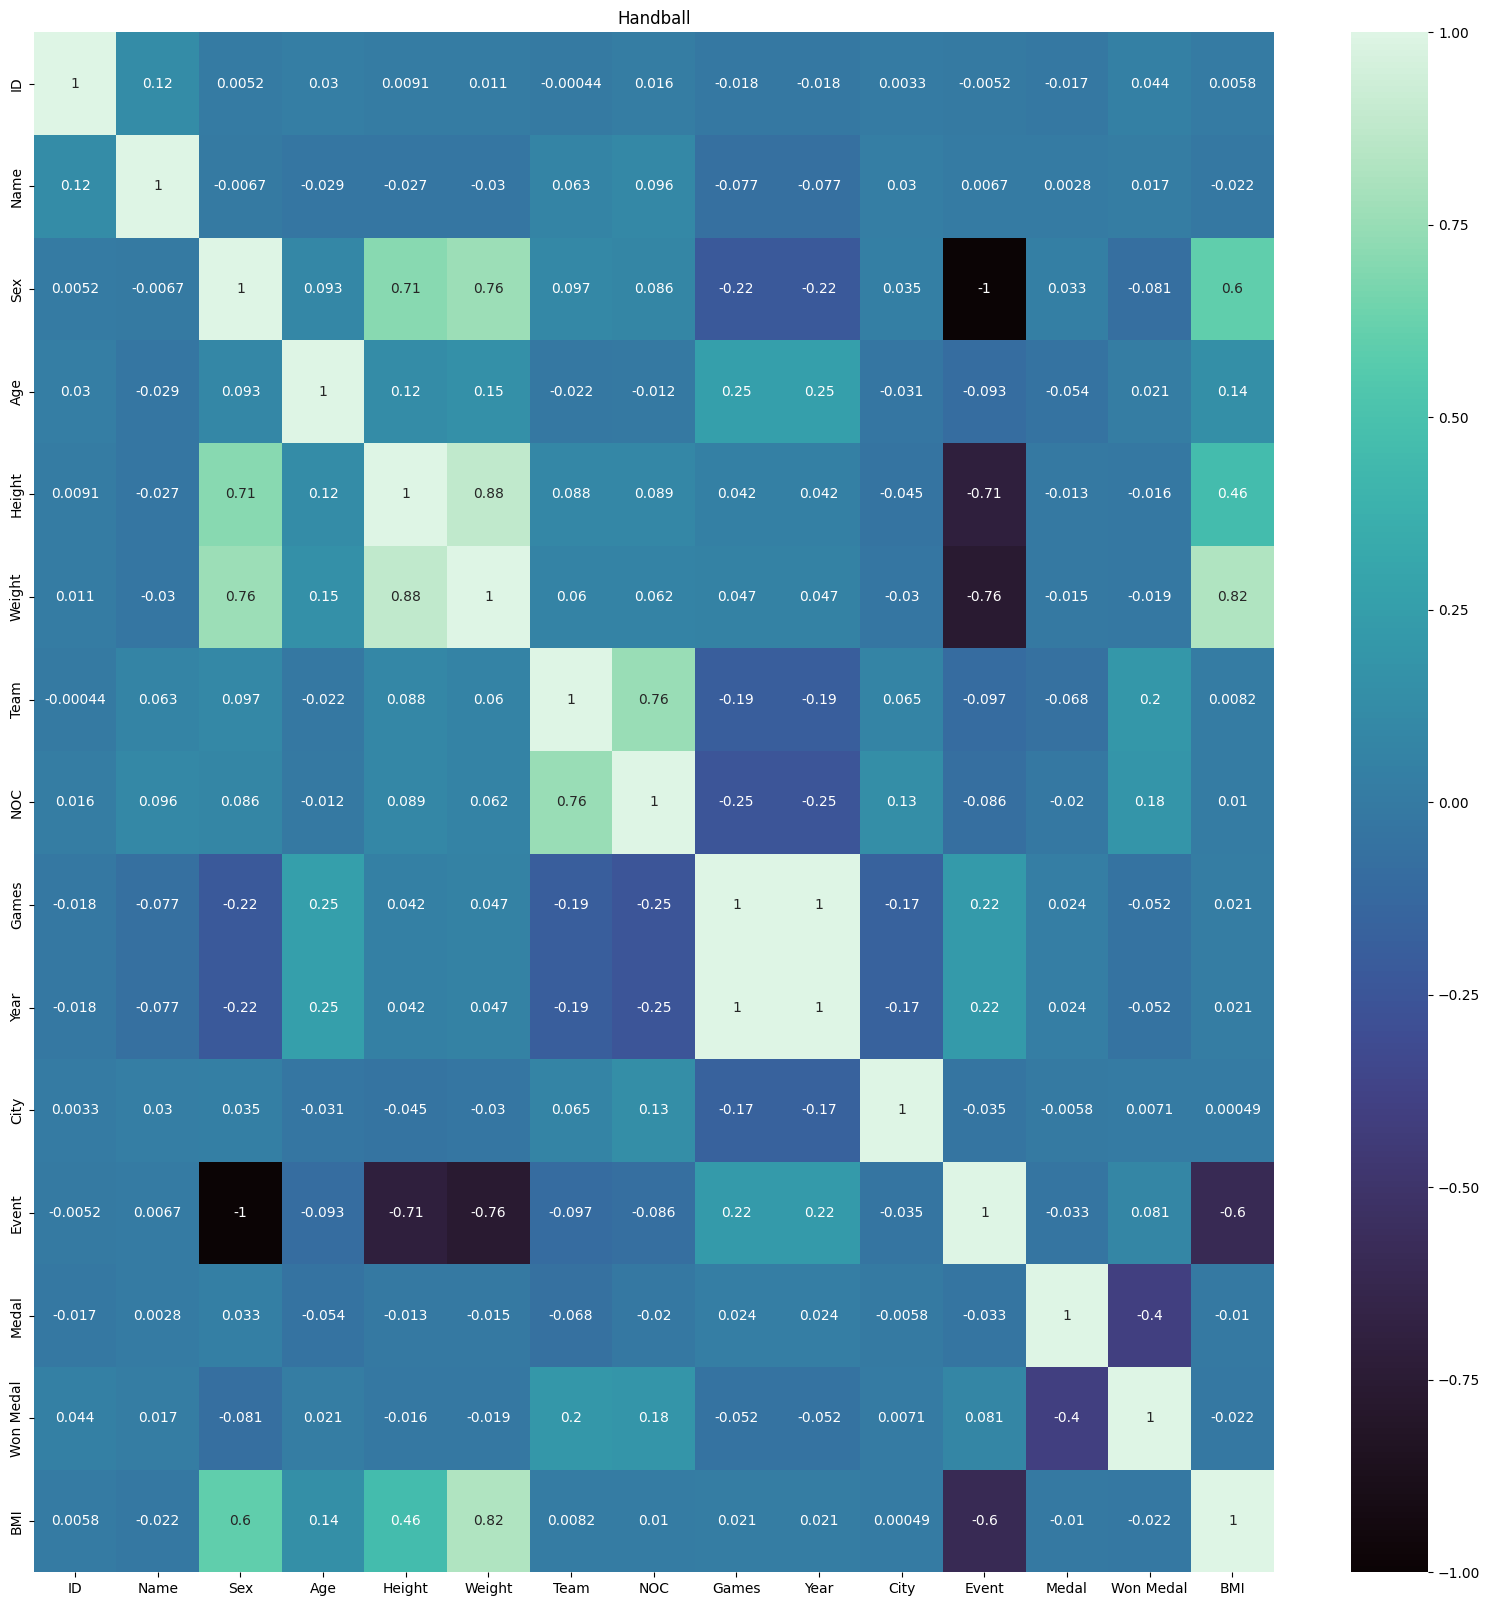

Hockey


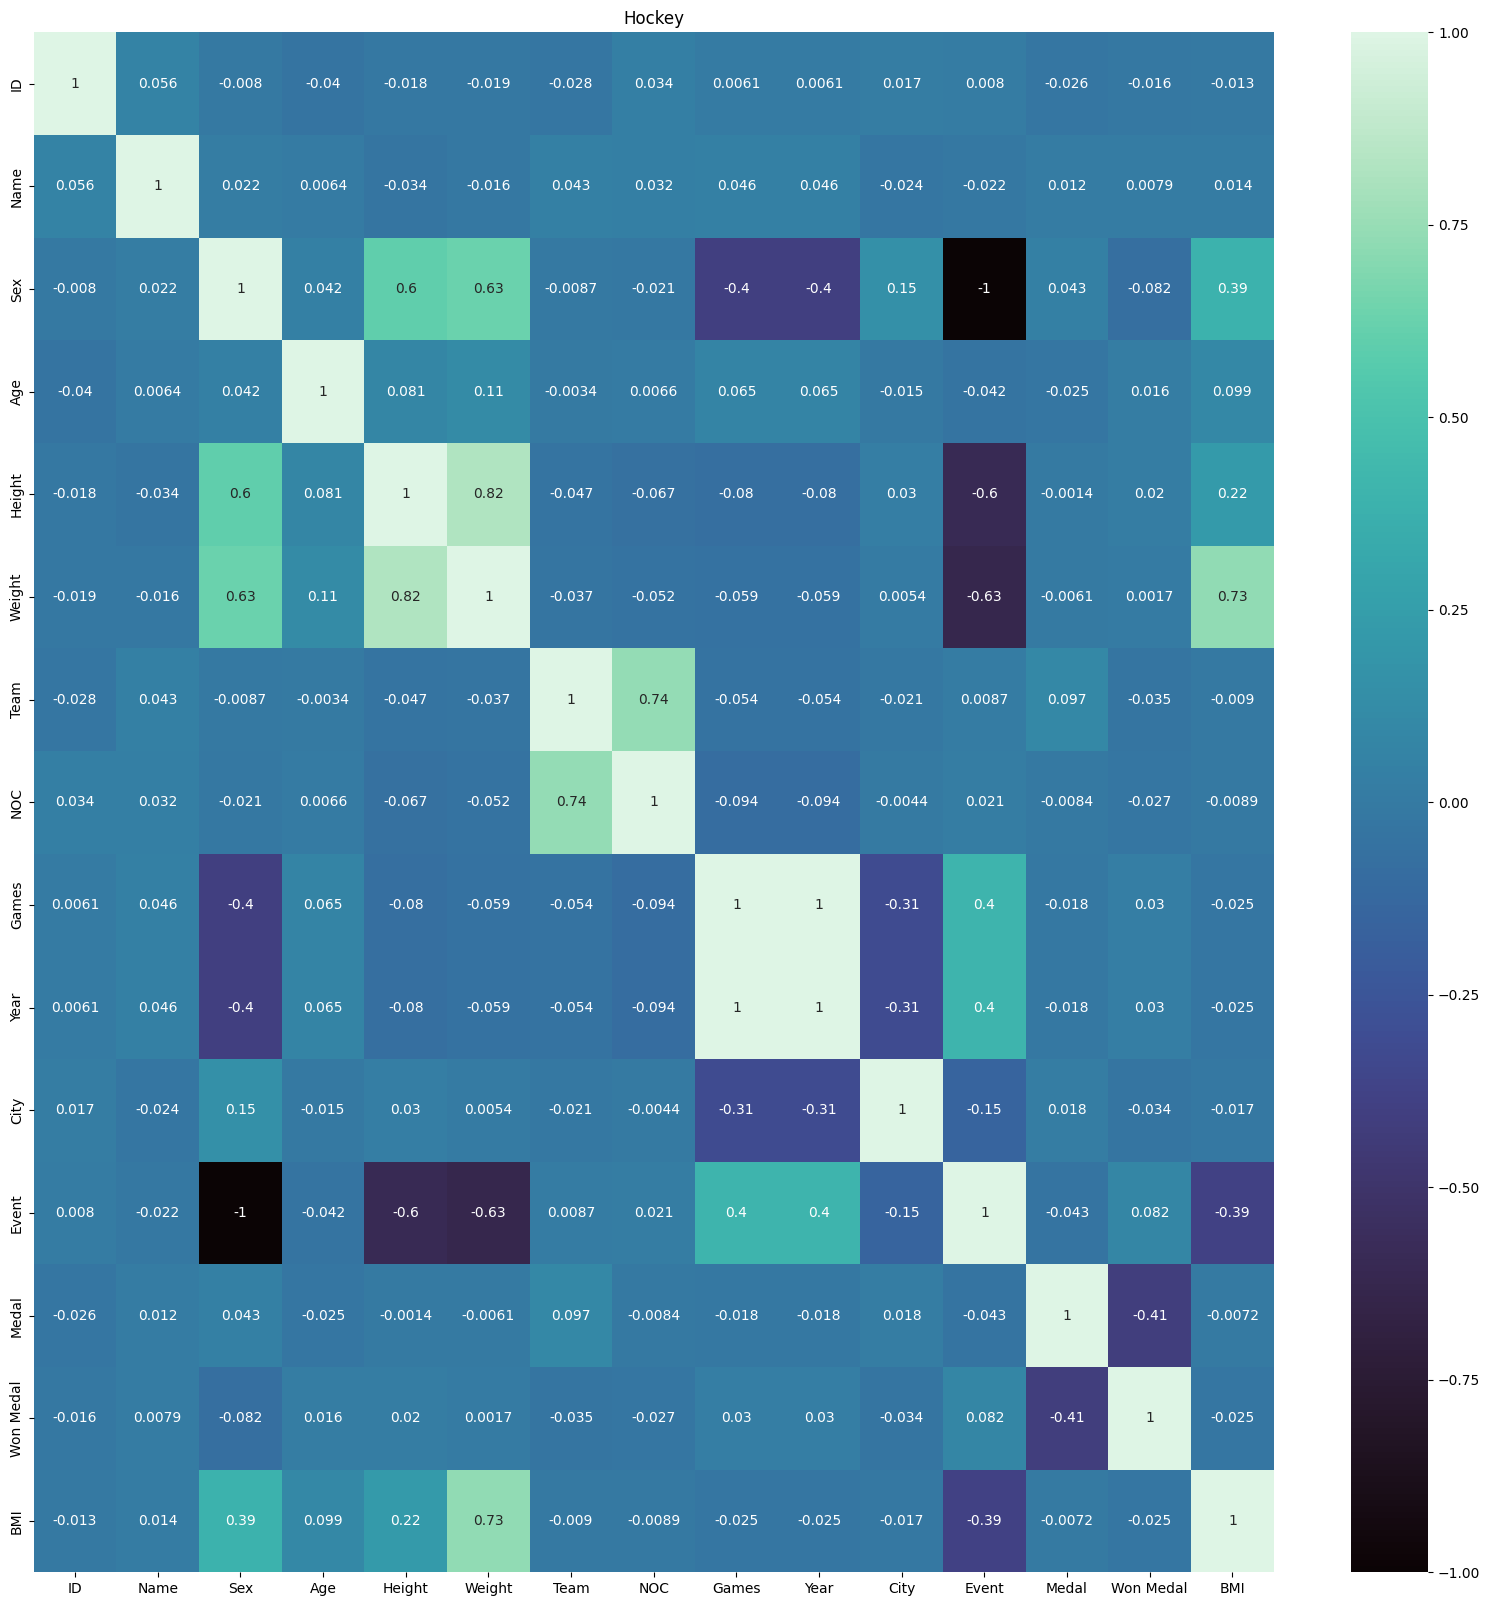

Judo


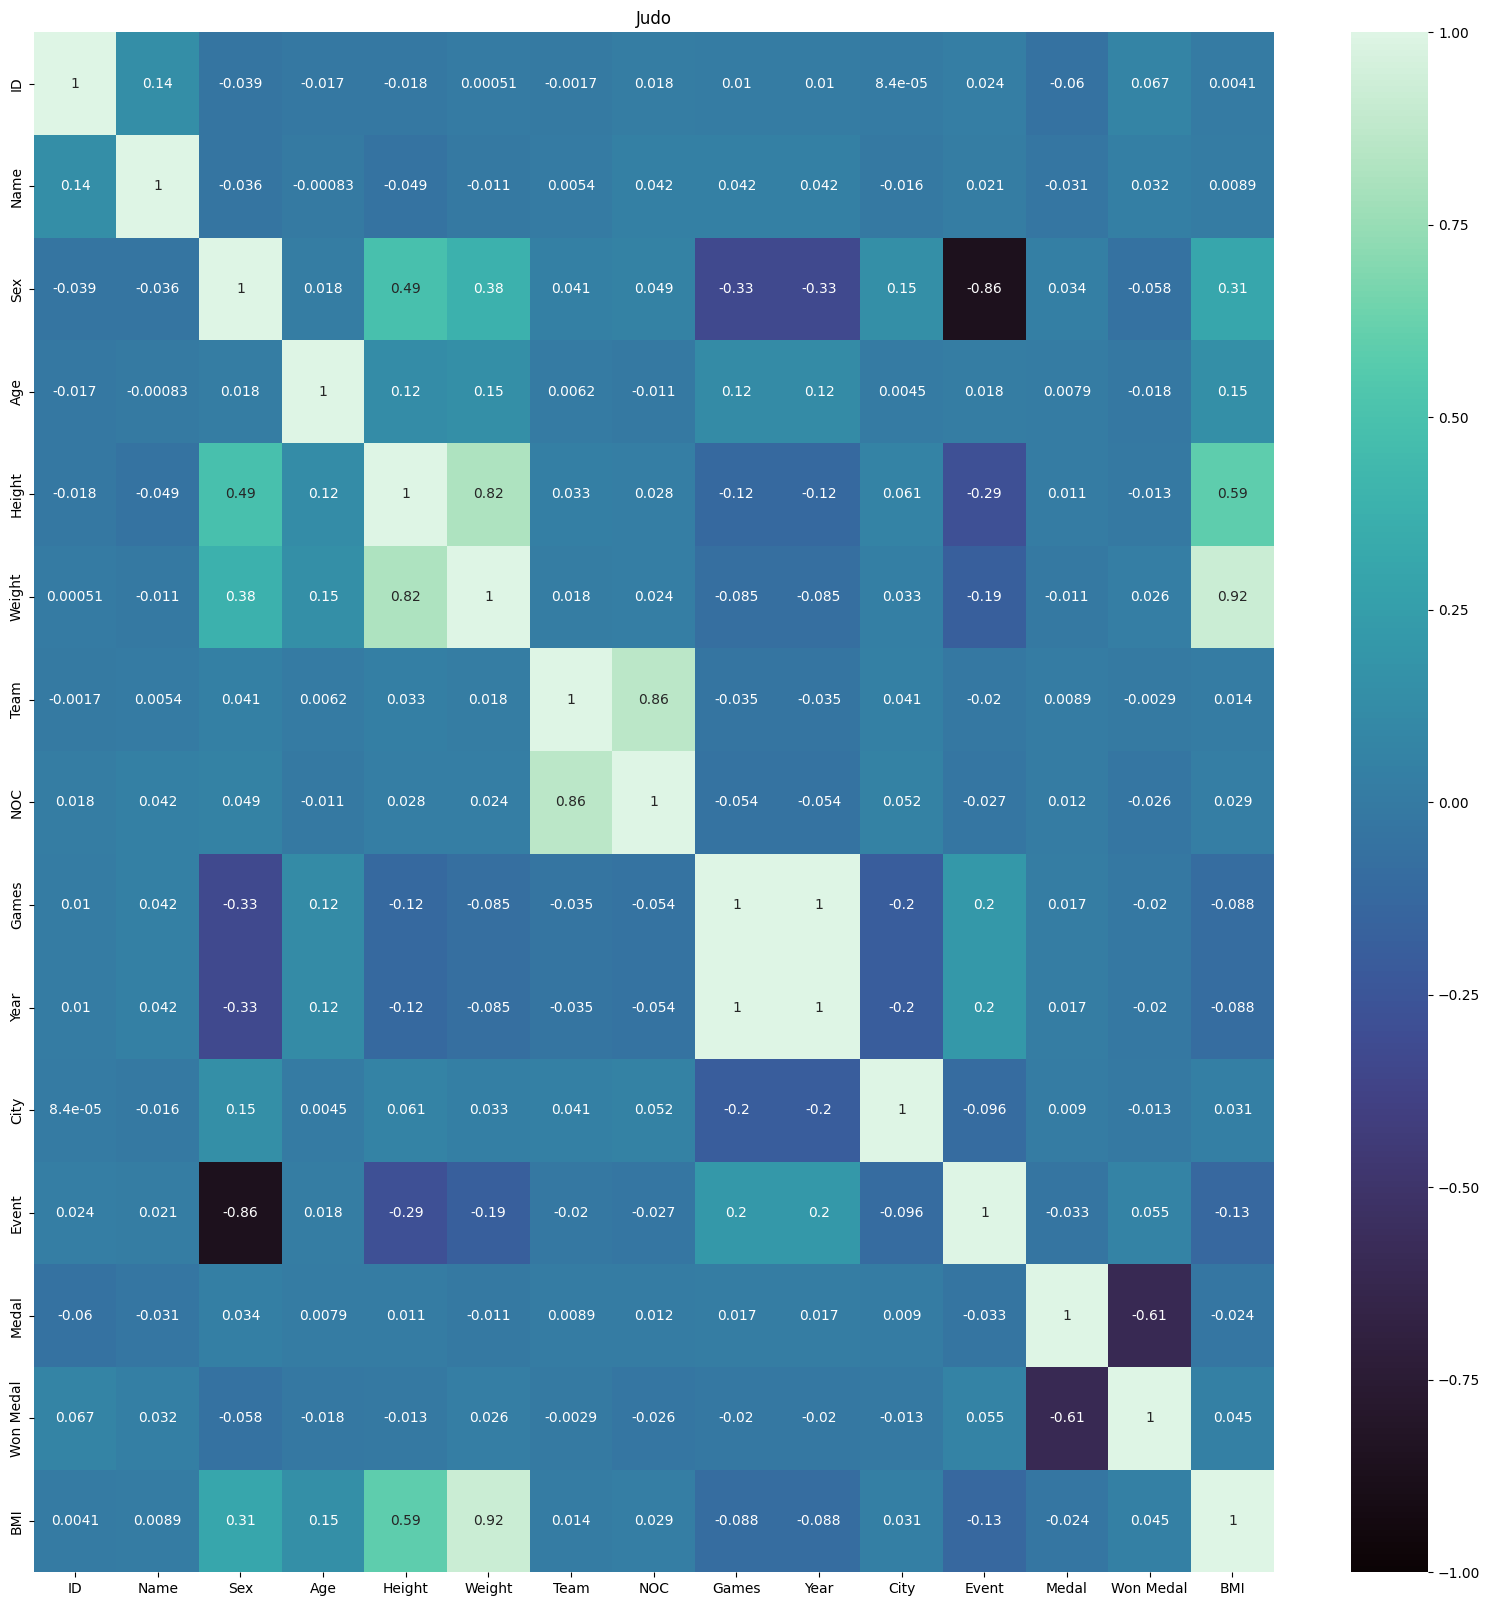

Modern Pentathlon


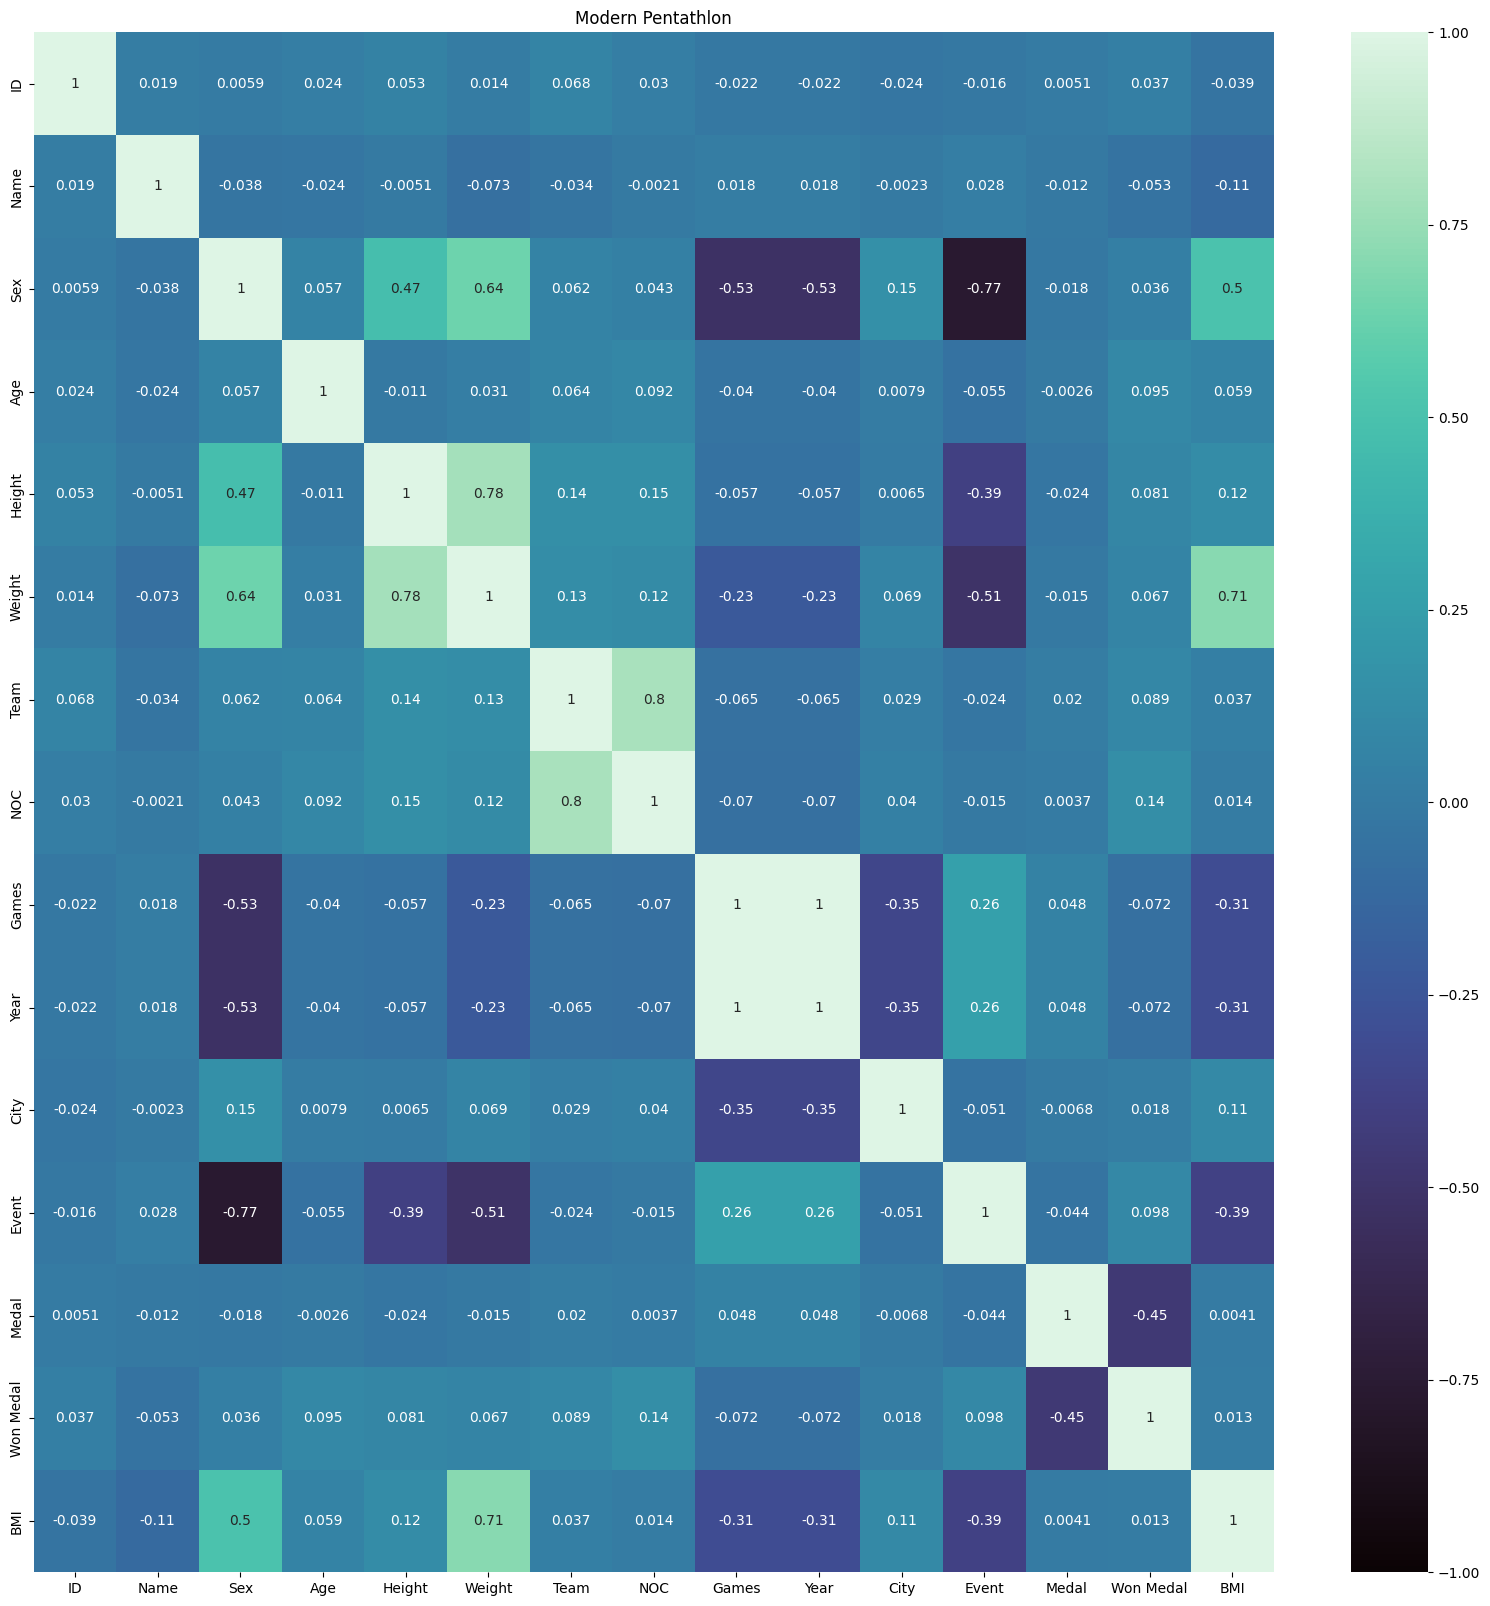

Rhythmic Gymnastics


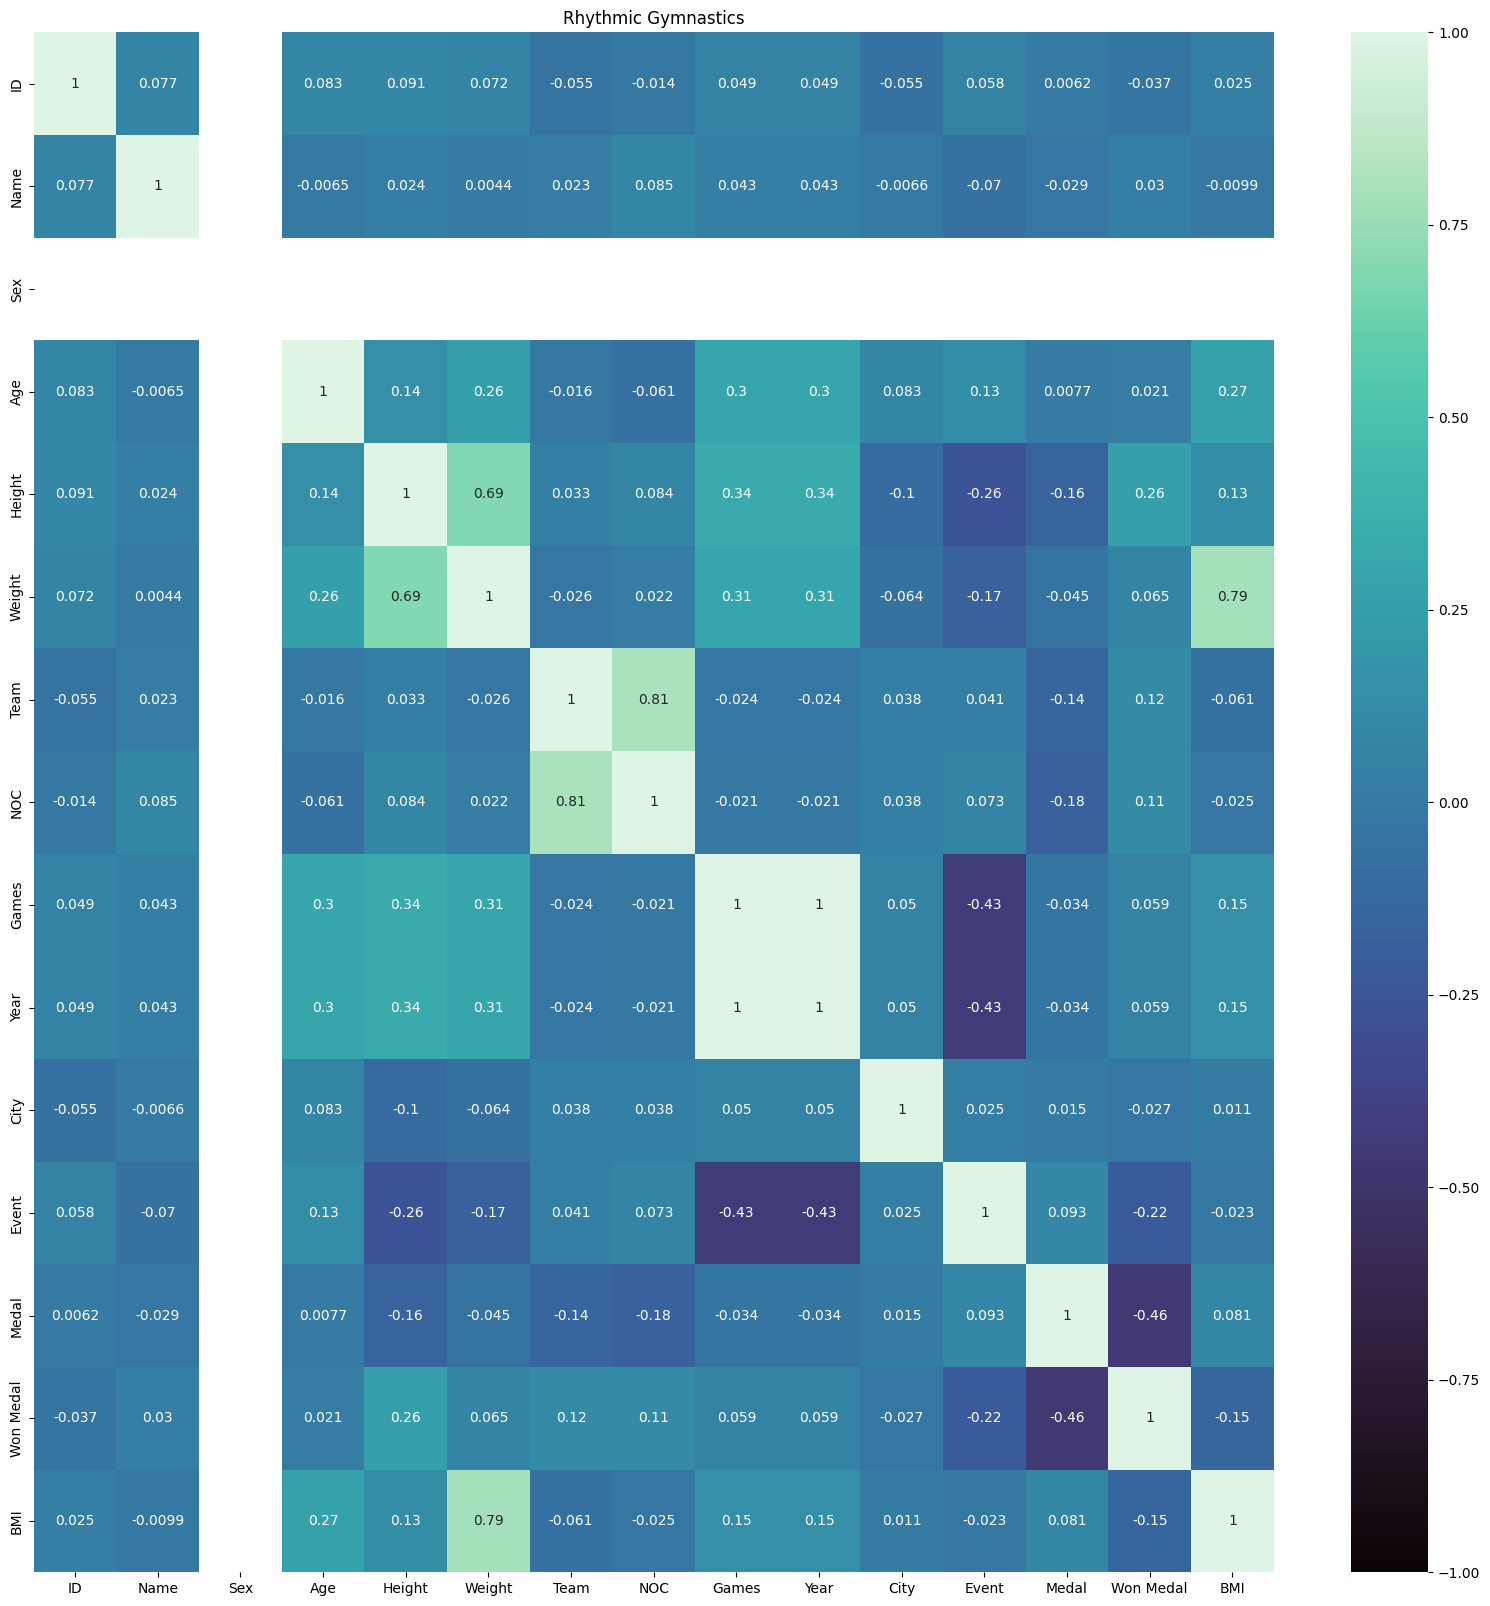

Rowing


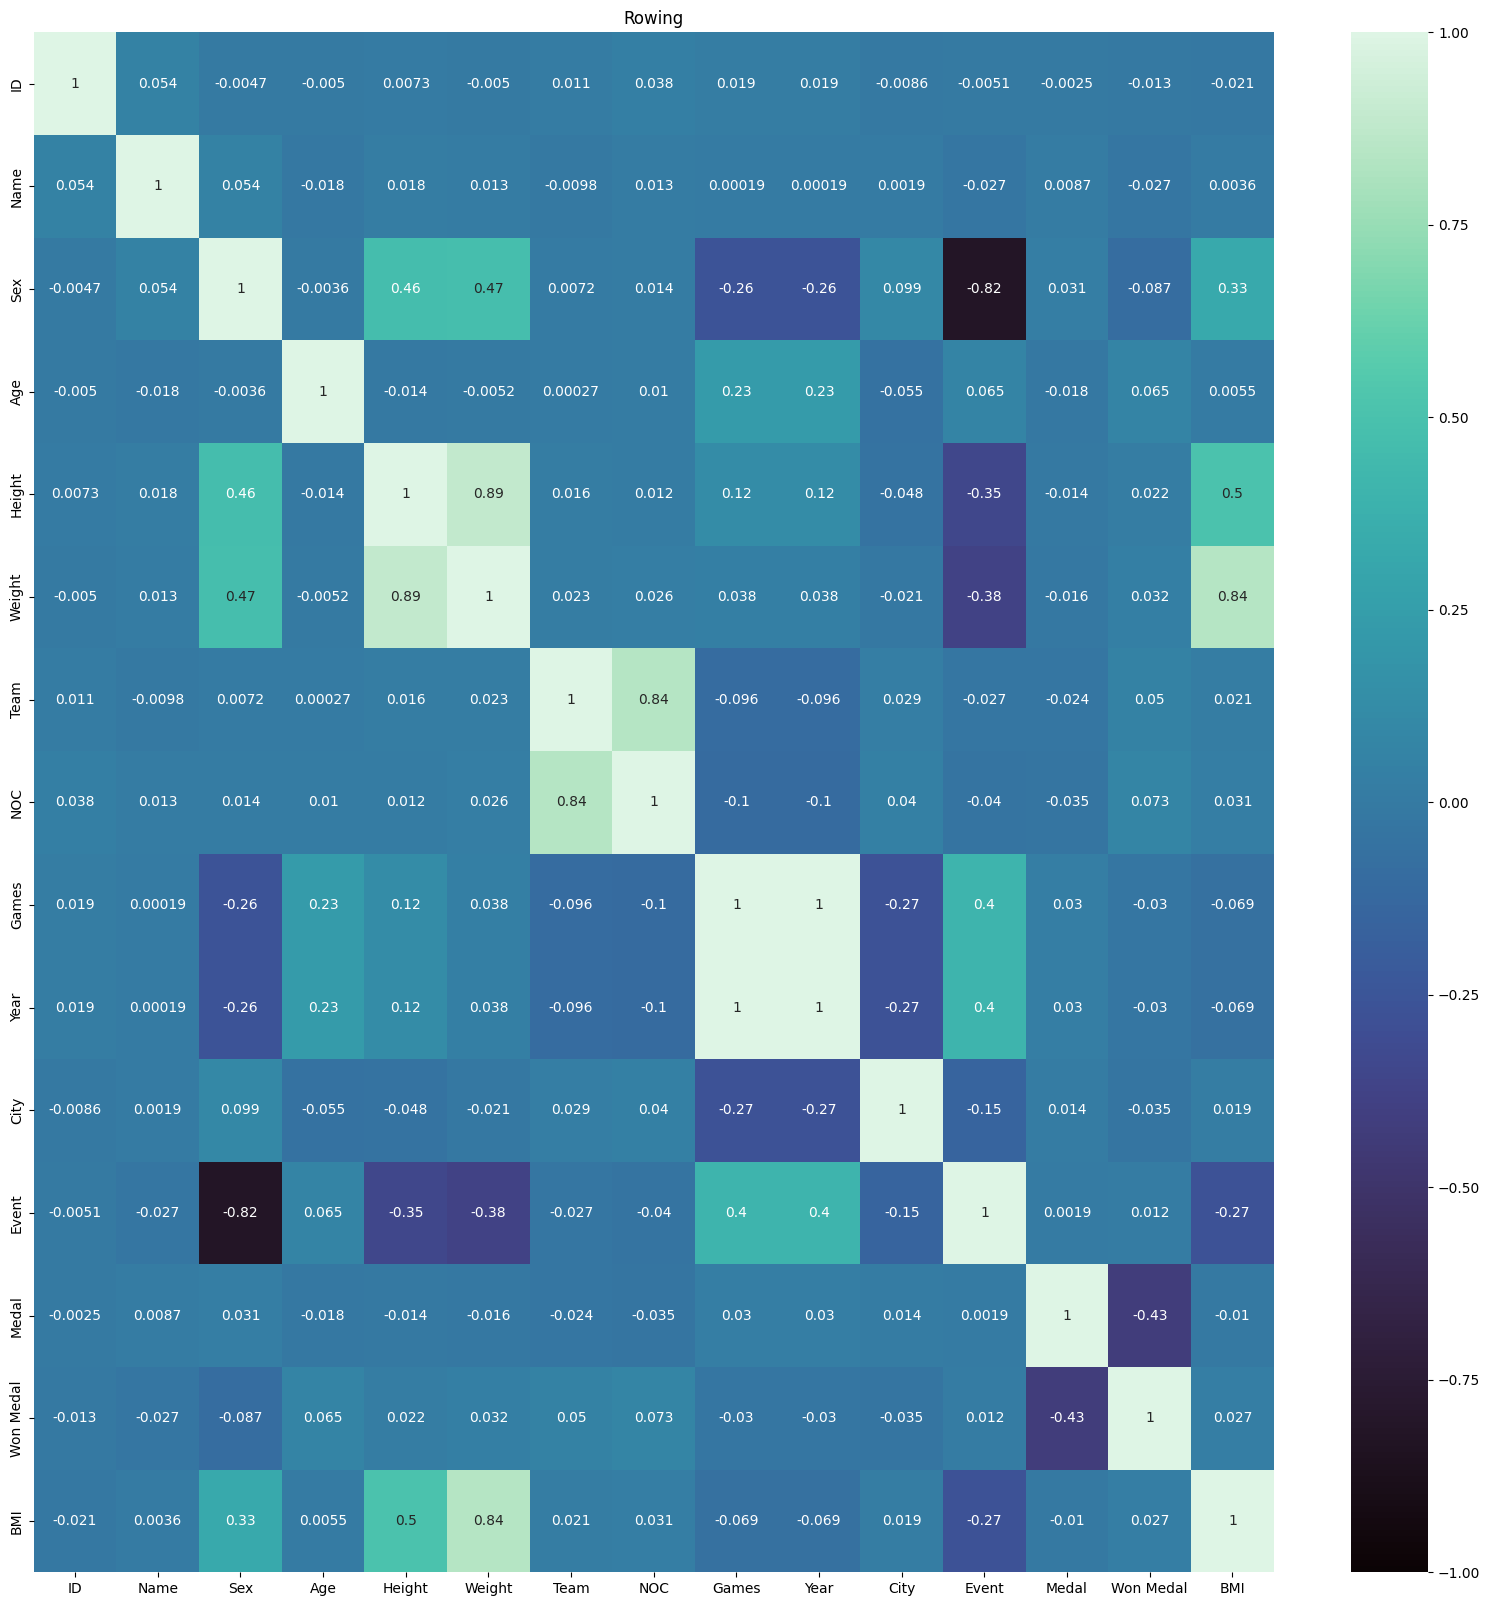

Rugby Sevens


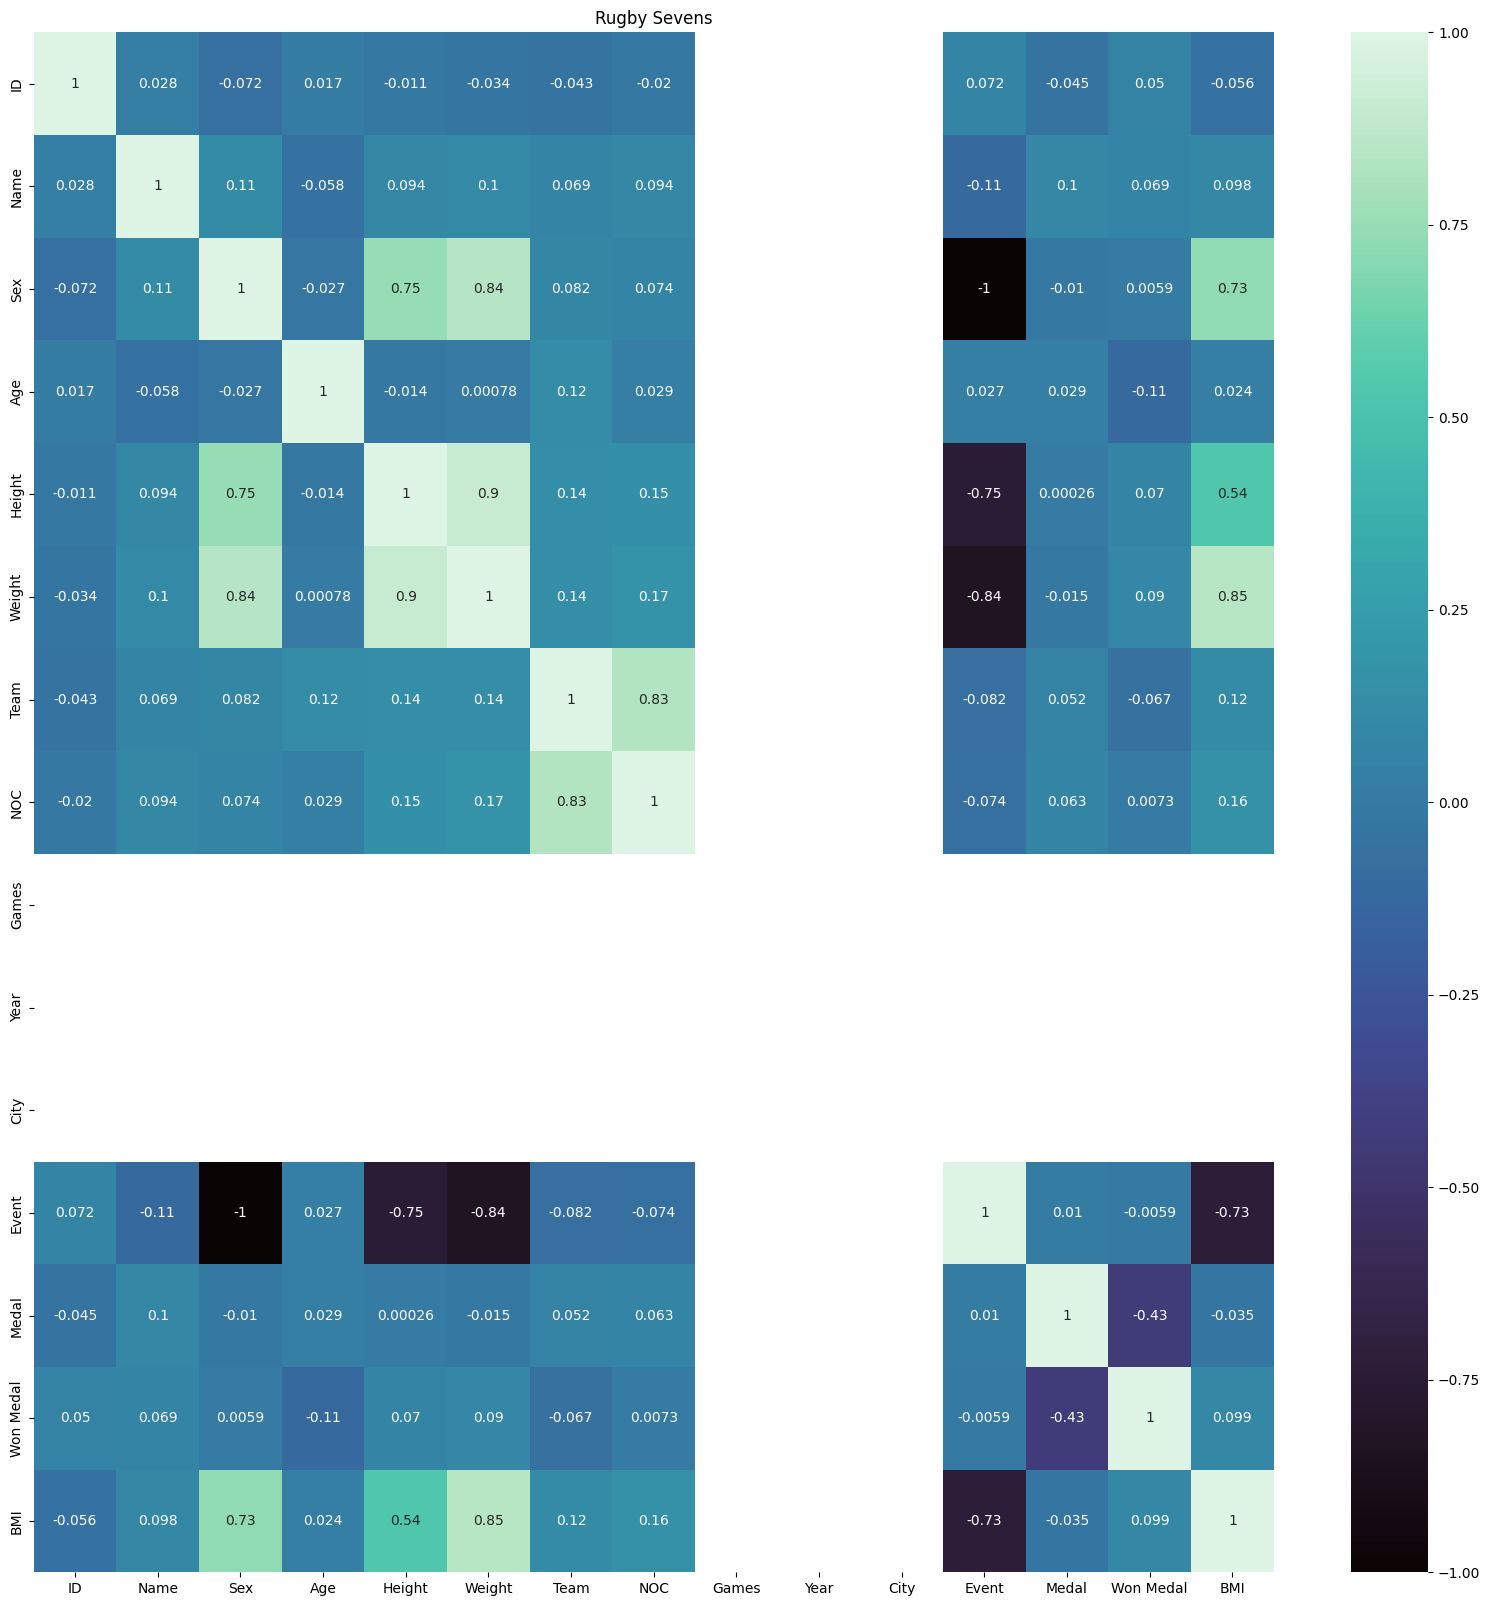

Sailing


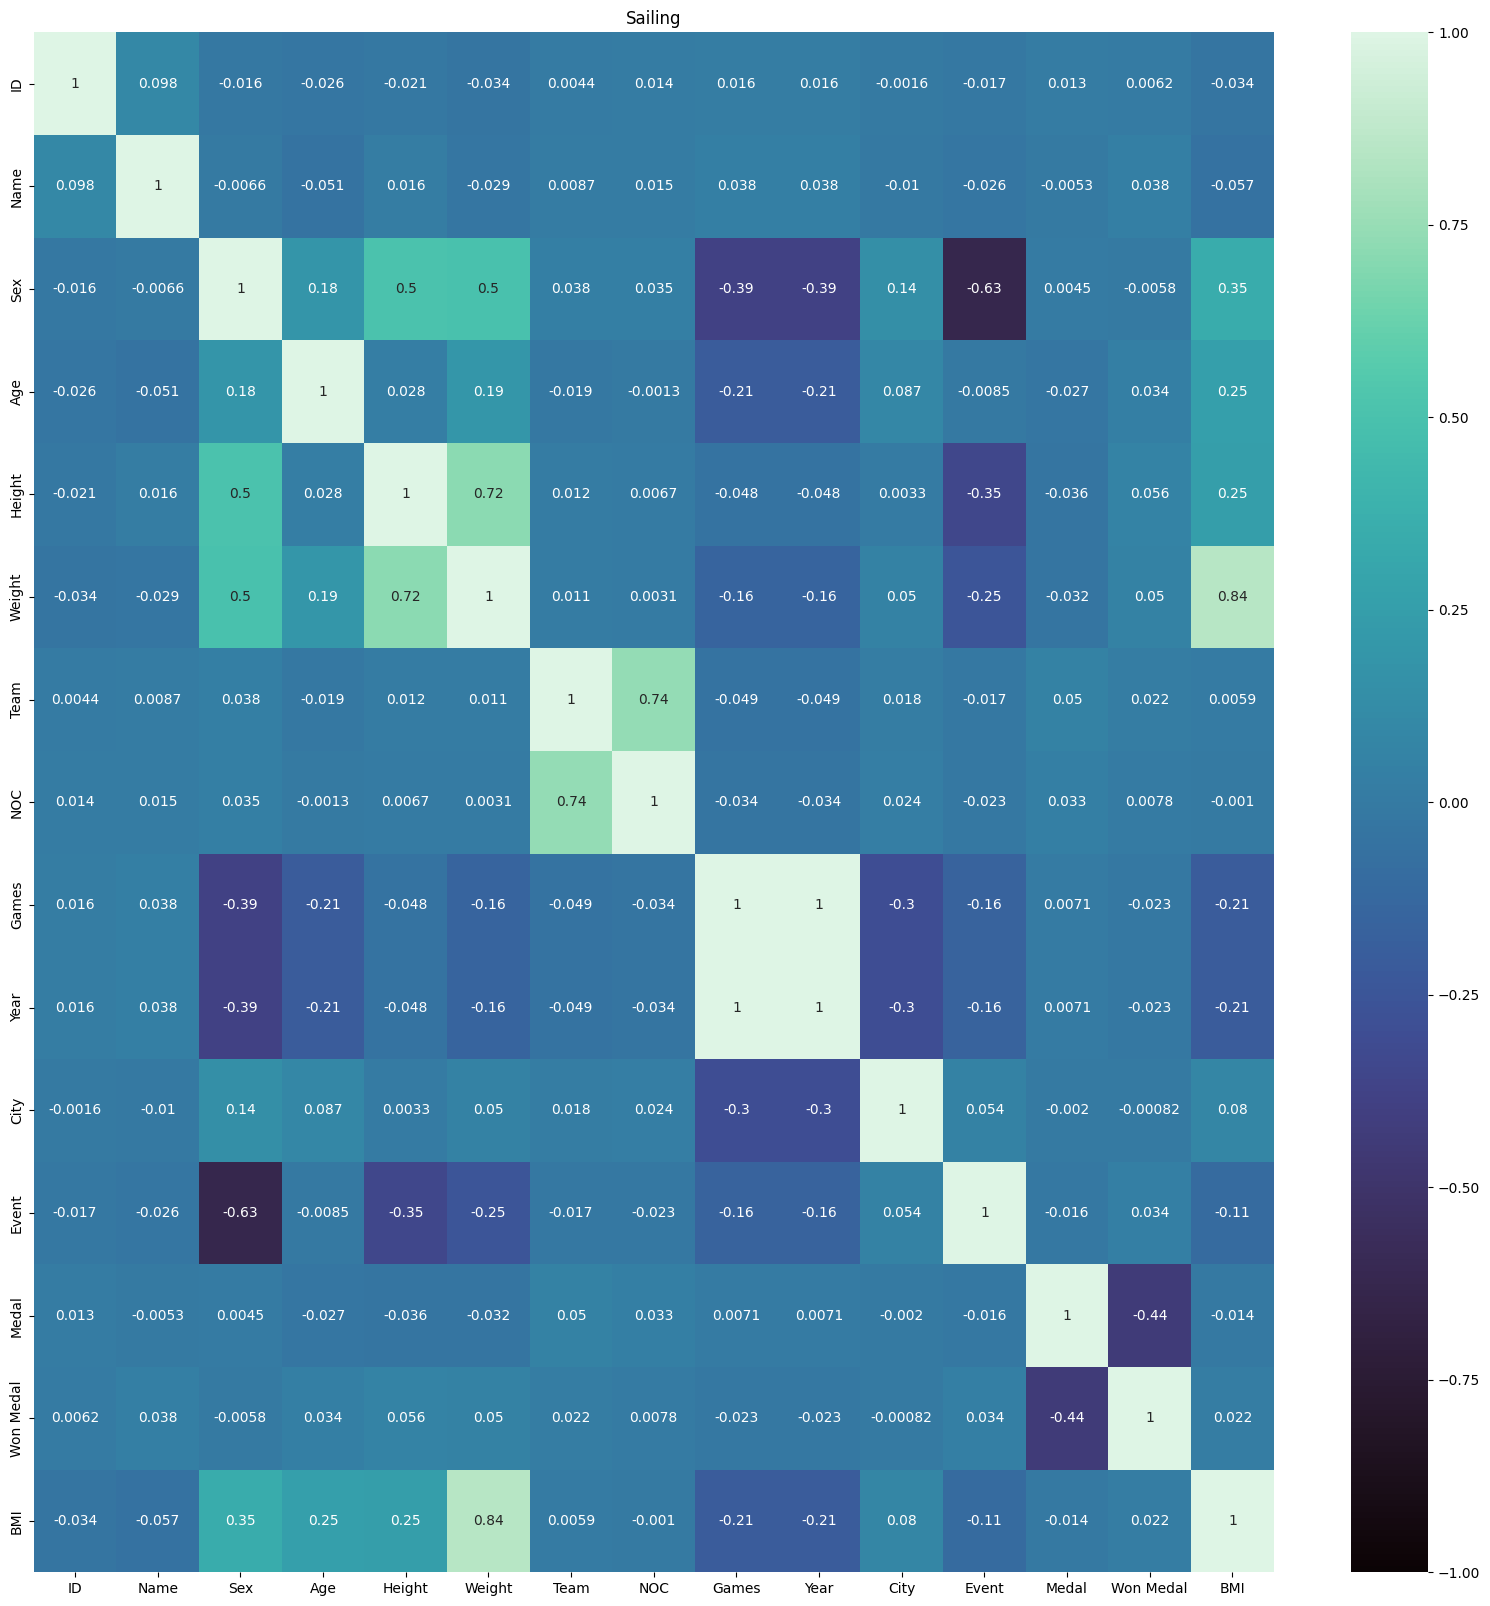

Shooting


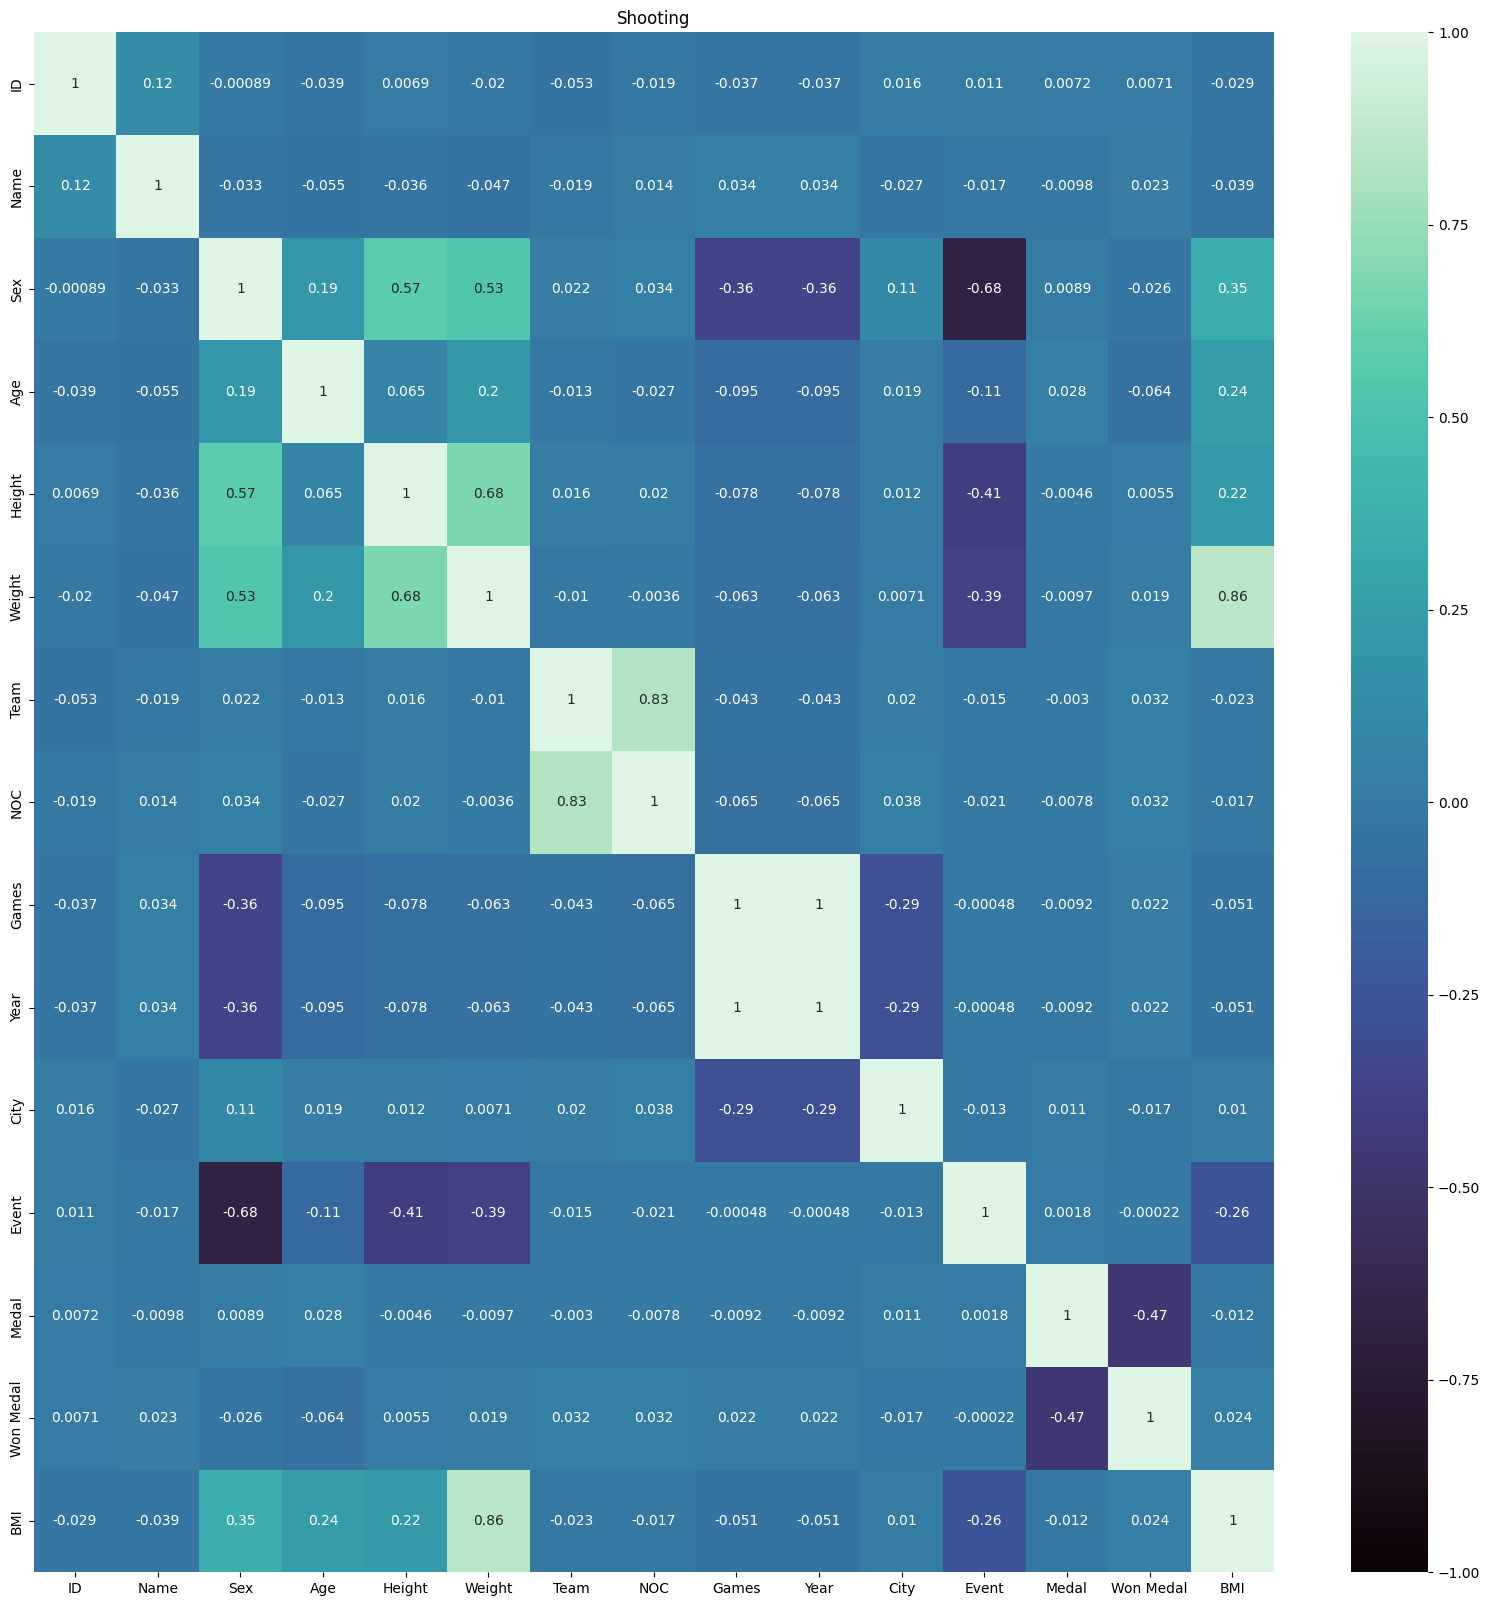

Softball


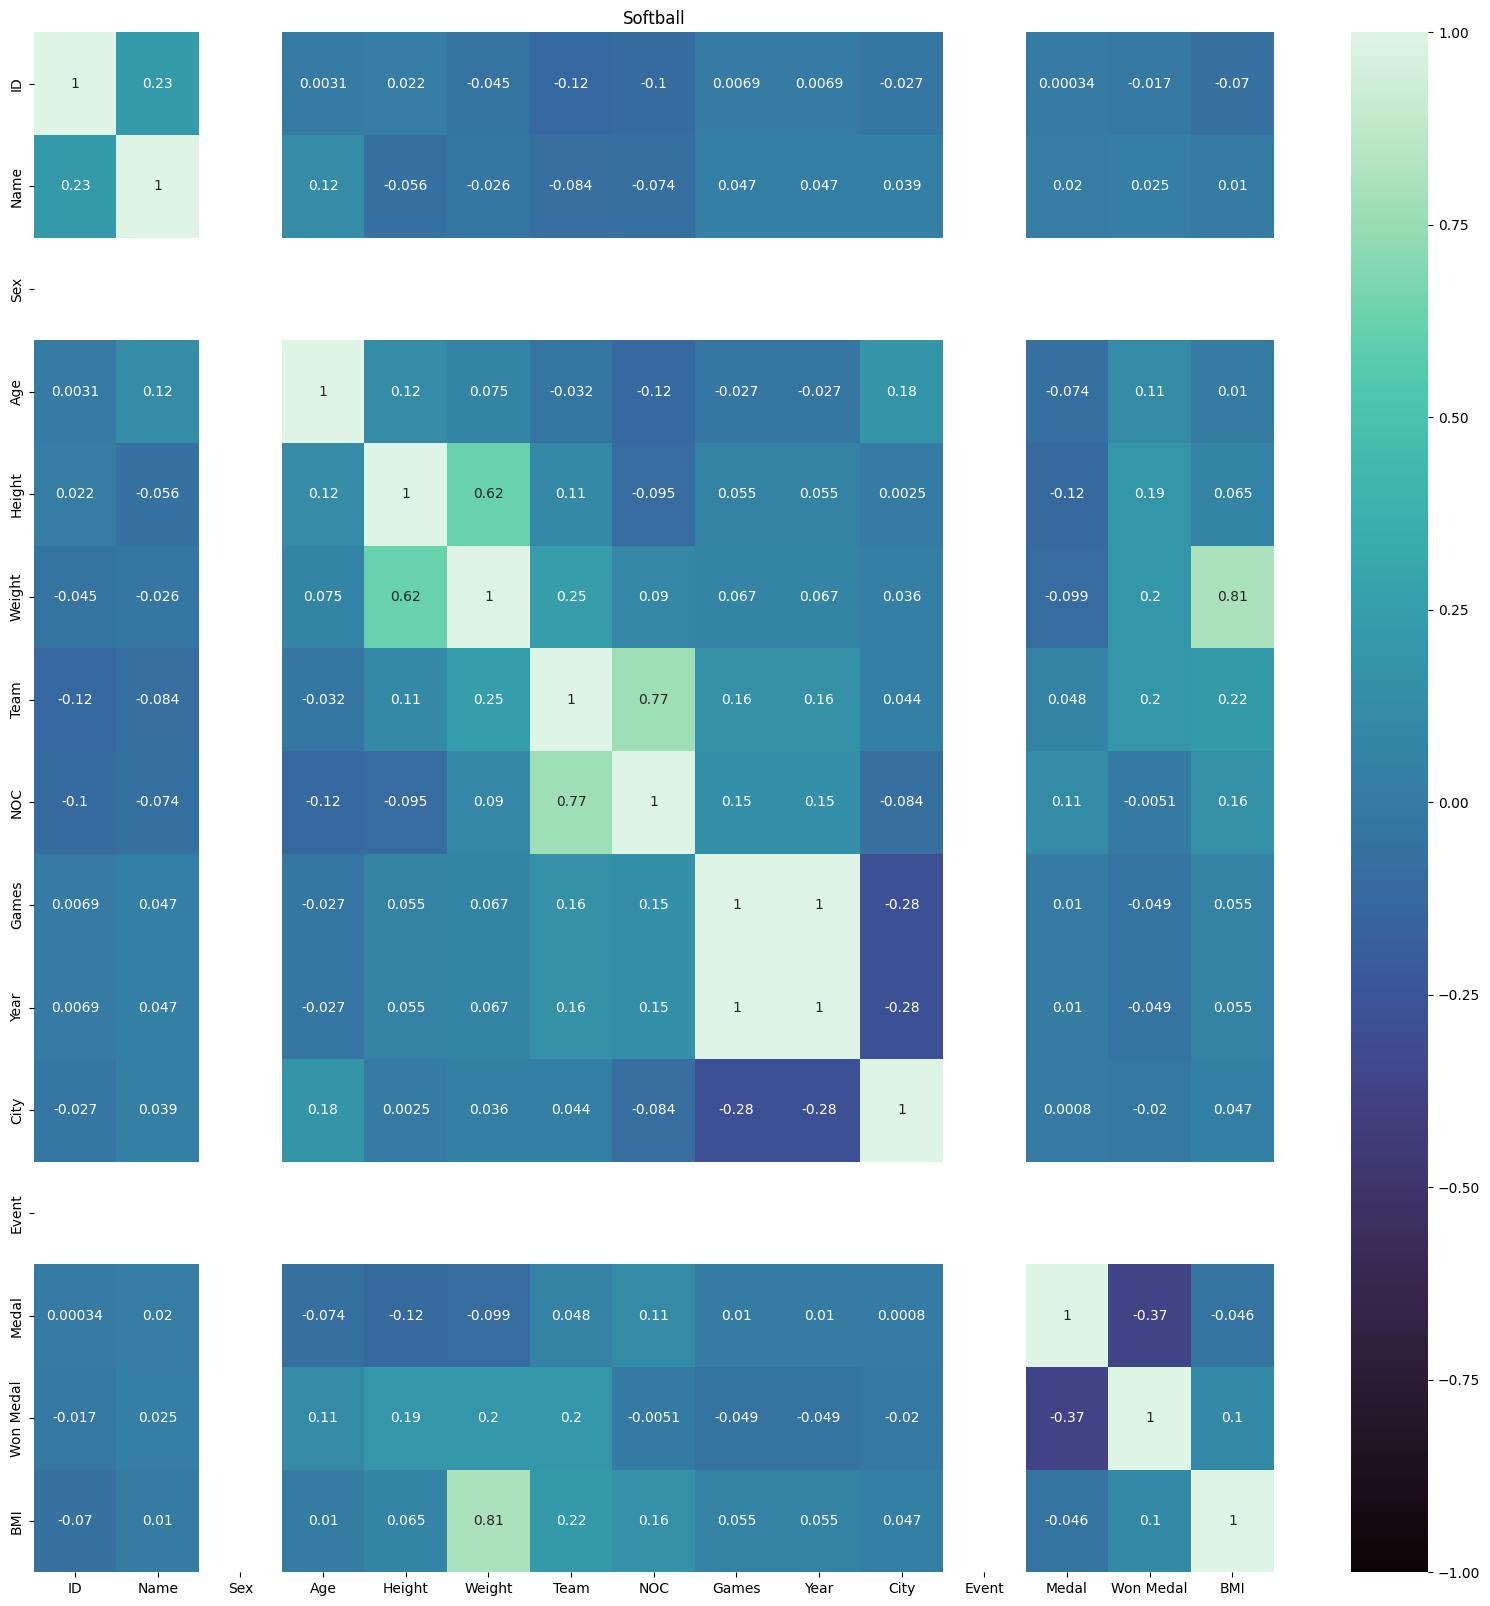

Swimming


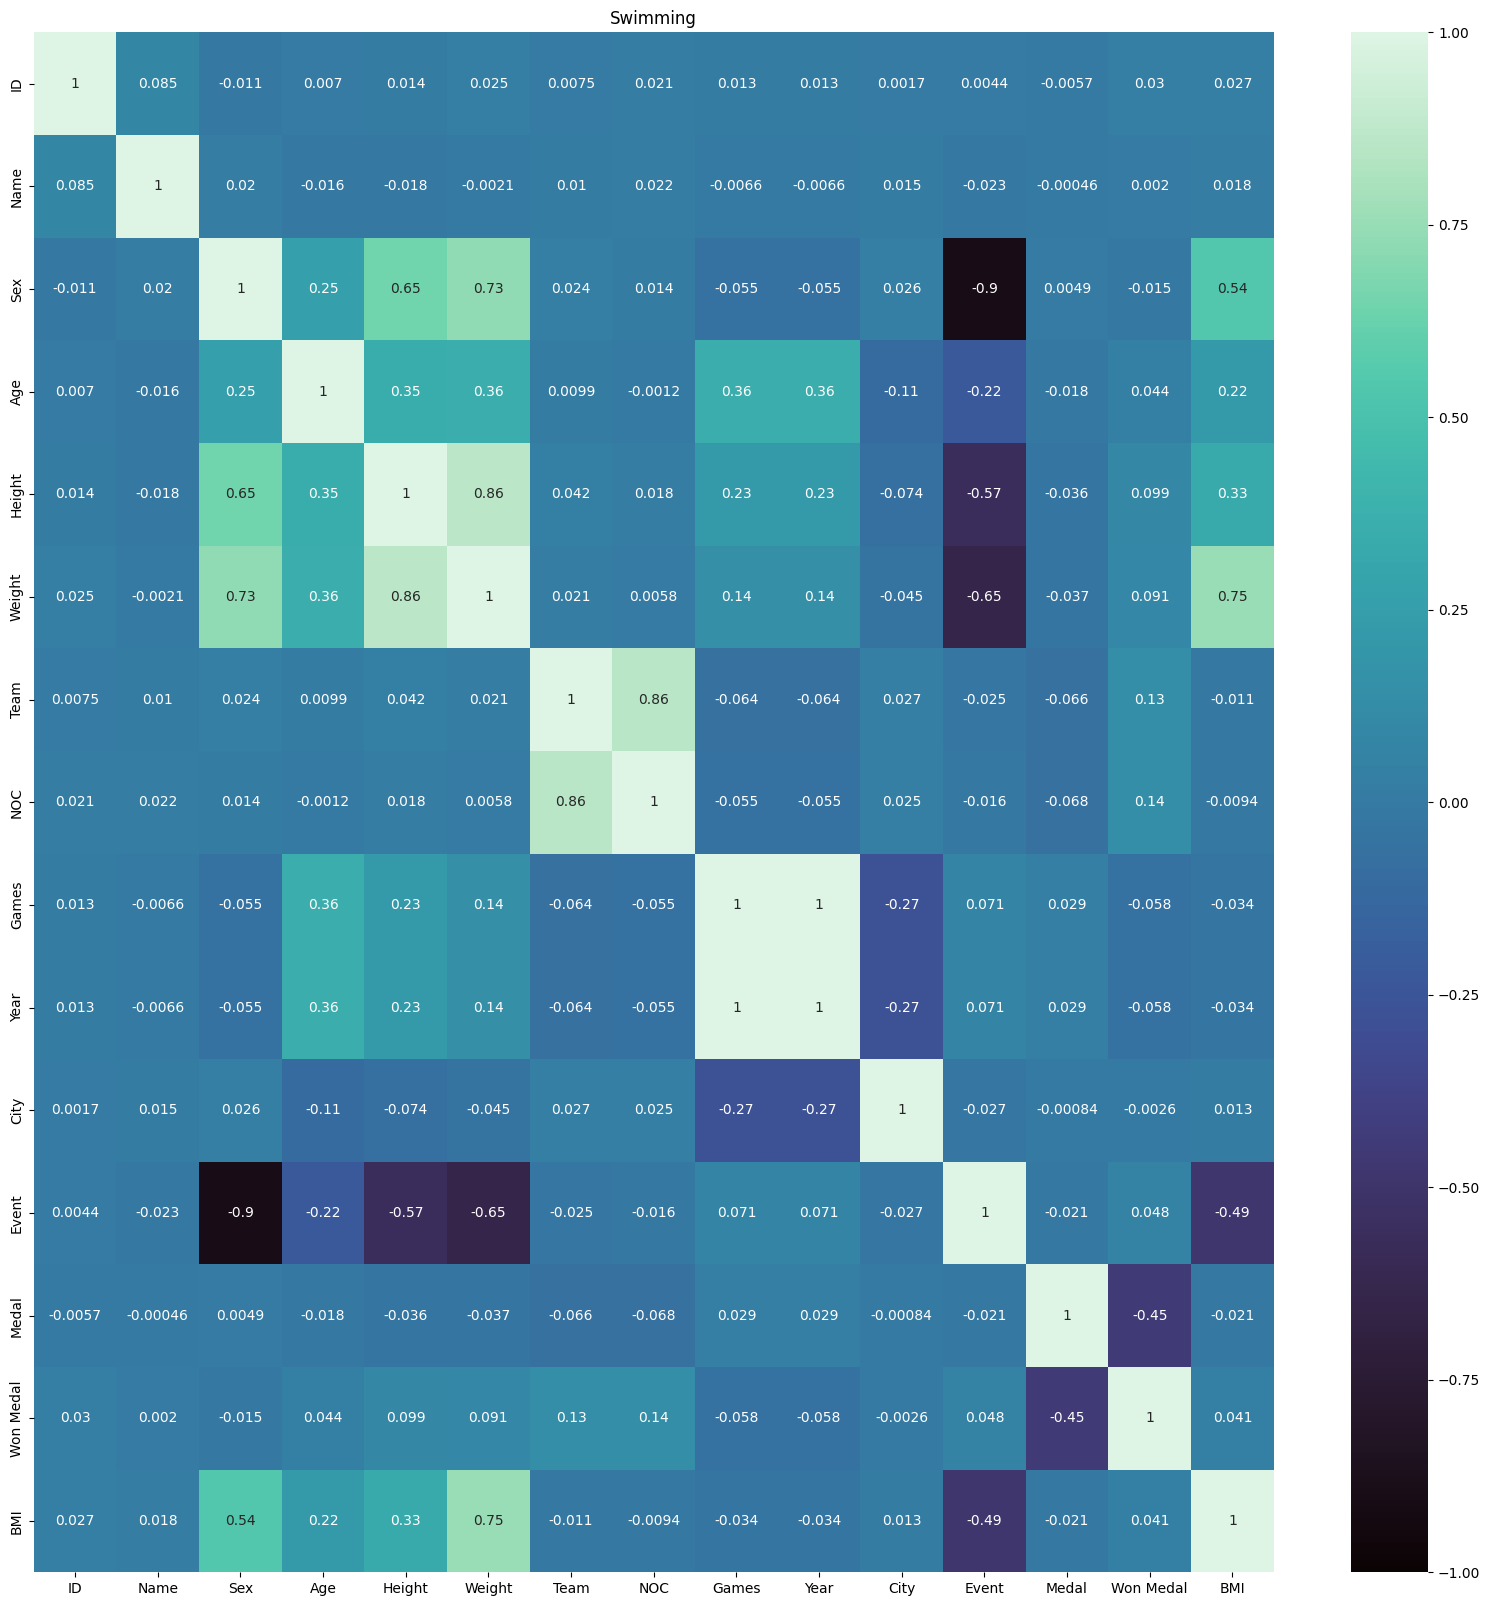

Synchronized Swimming


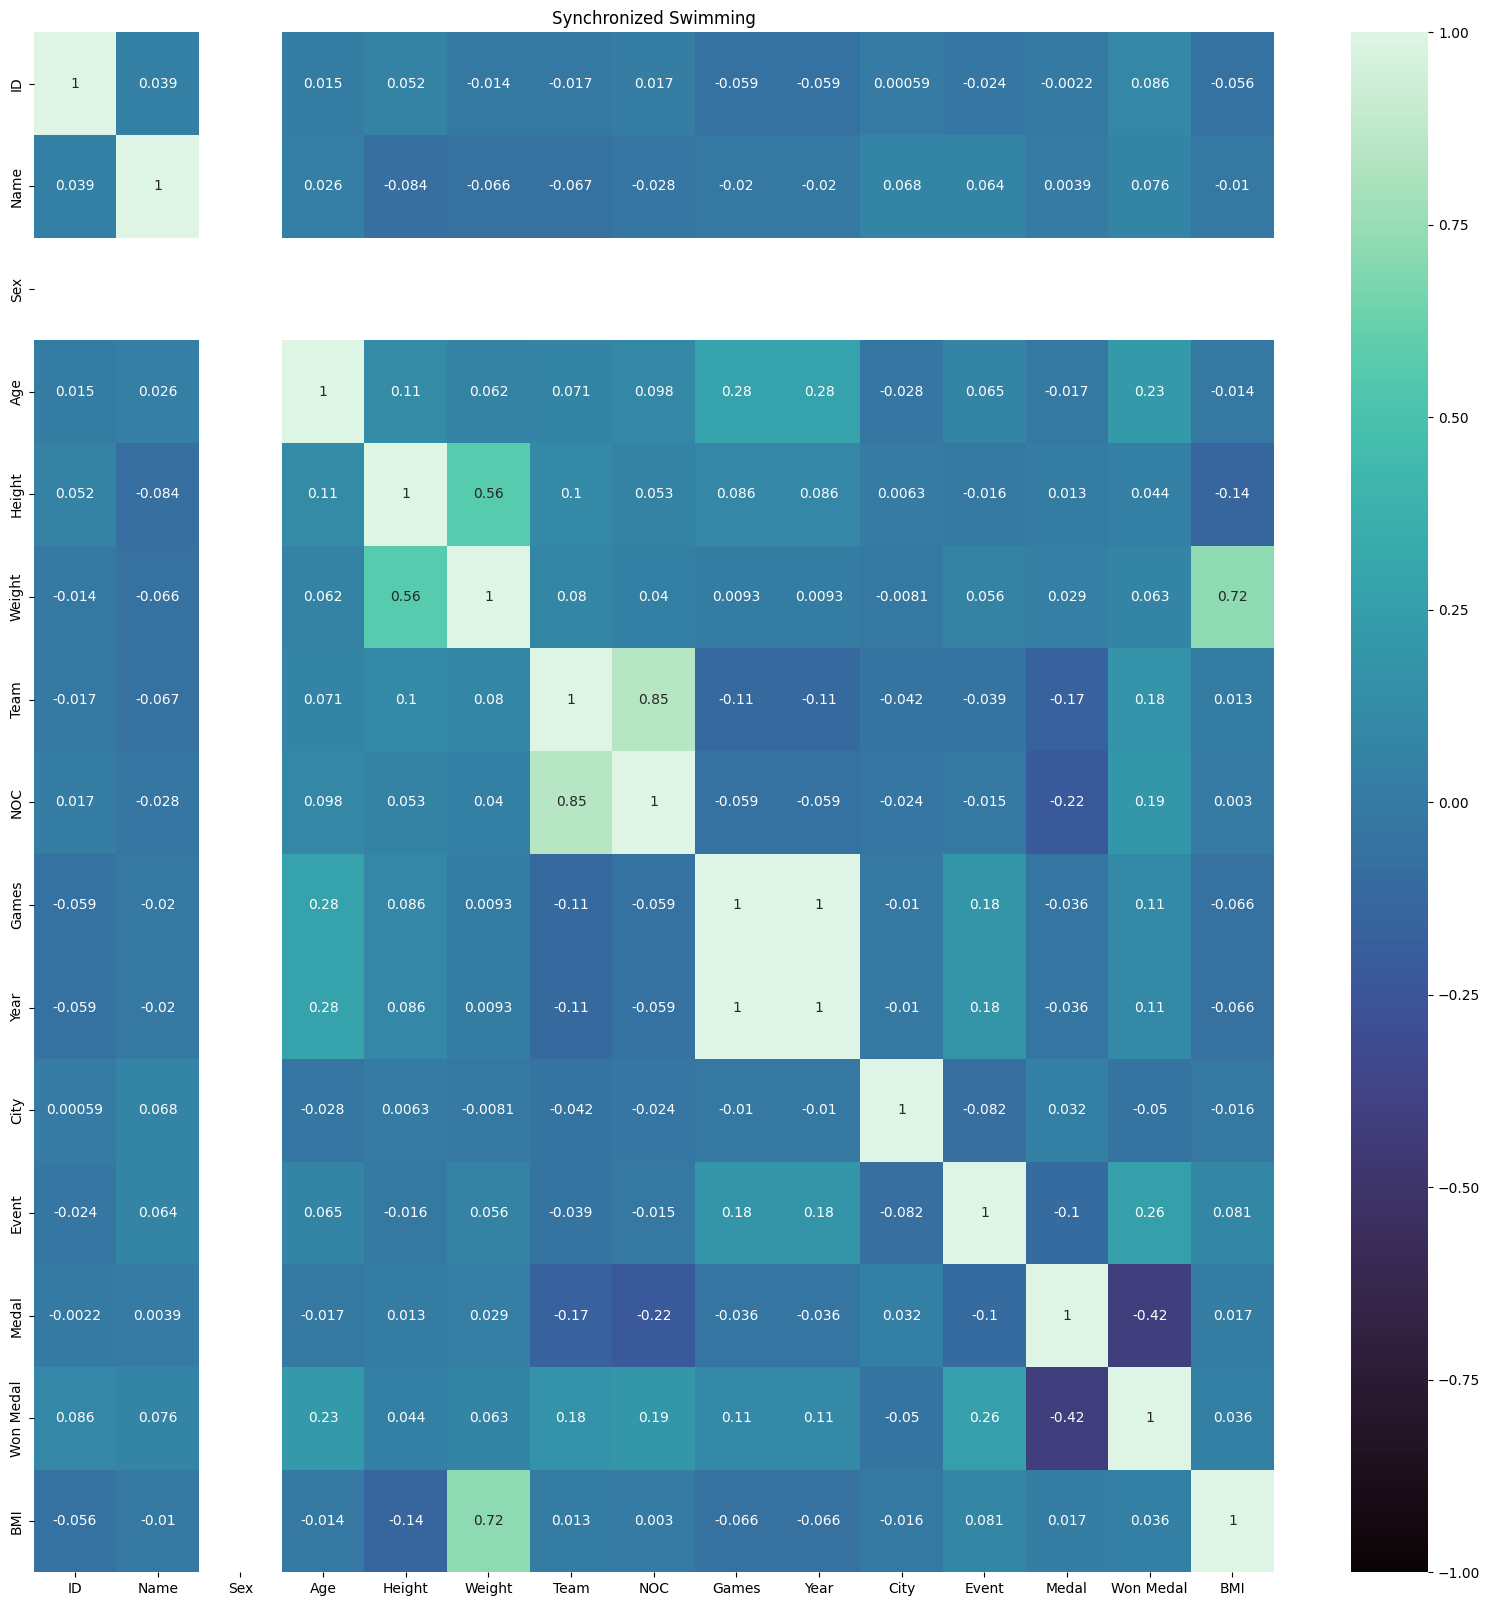

Table Tennis


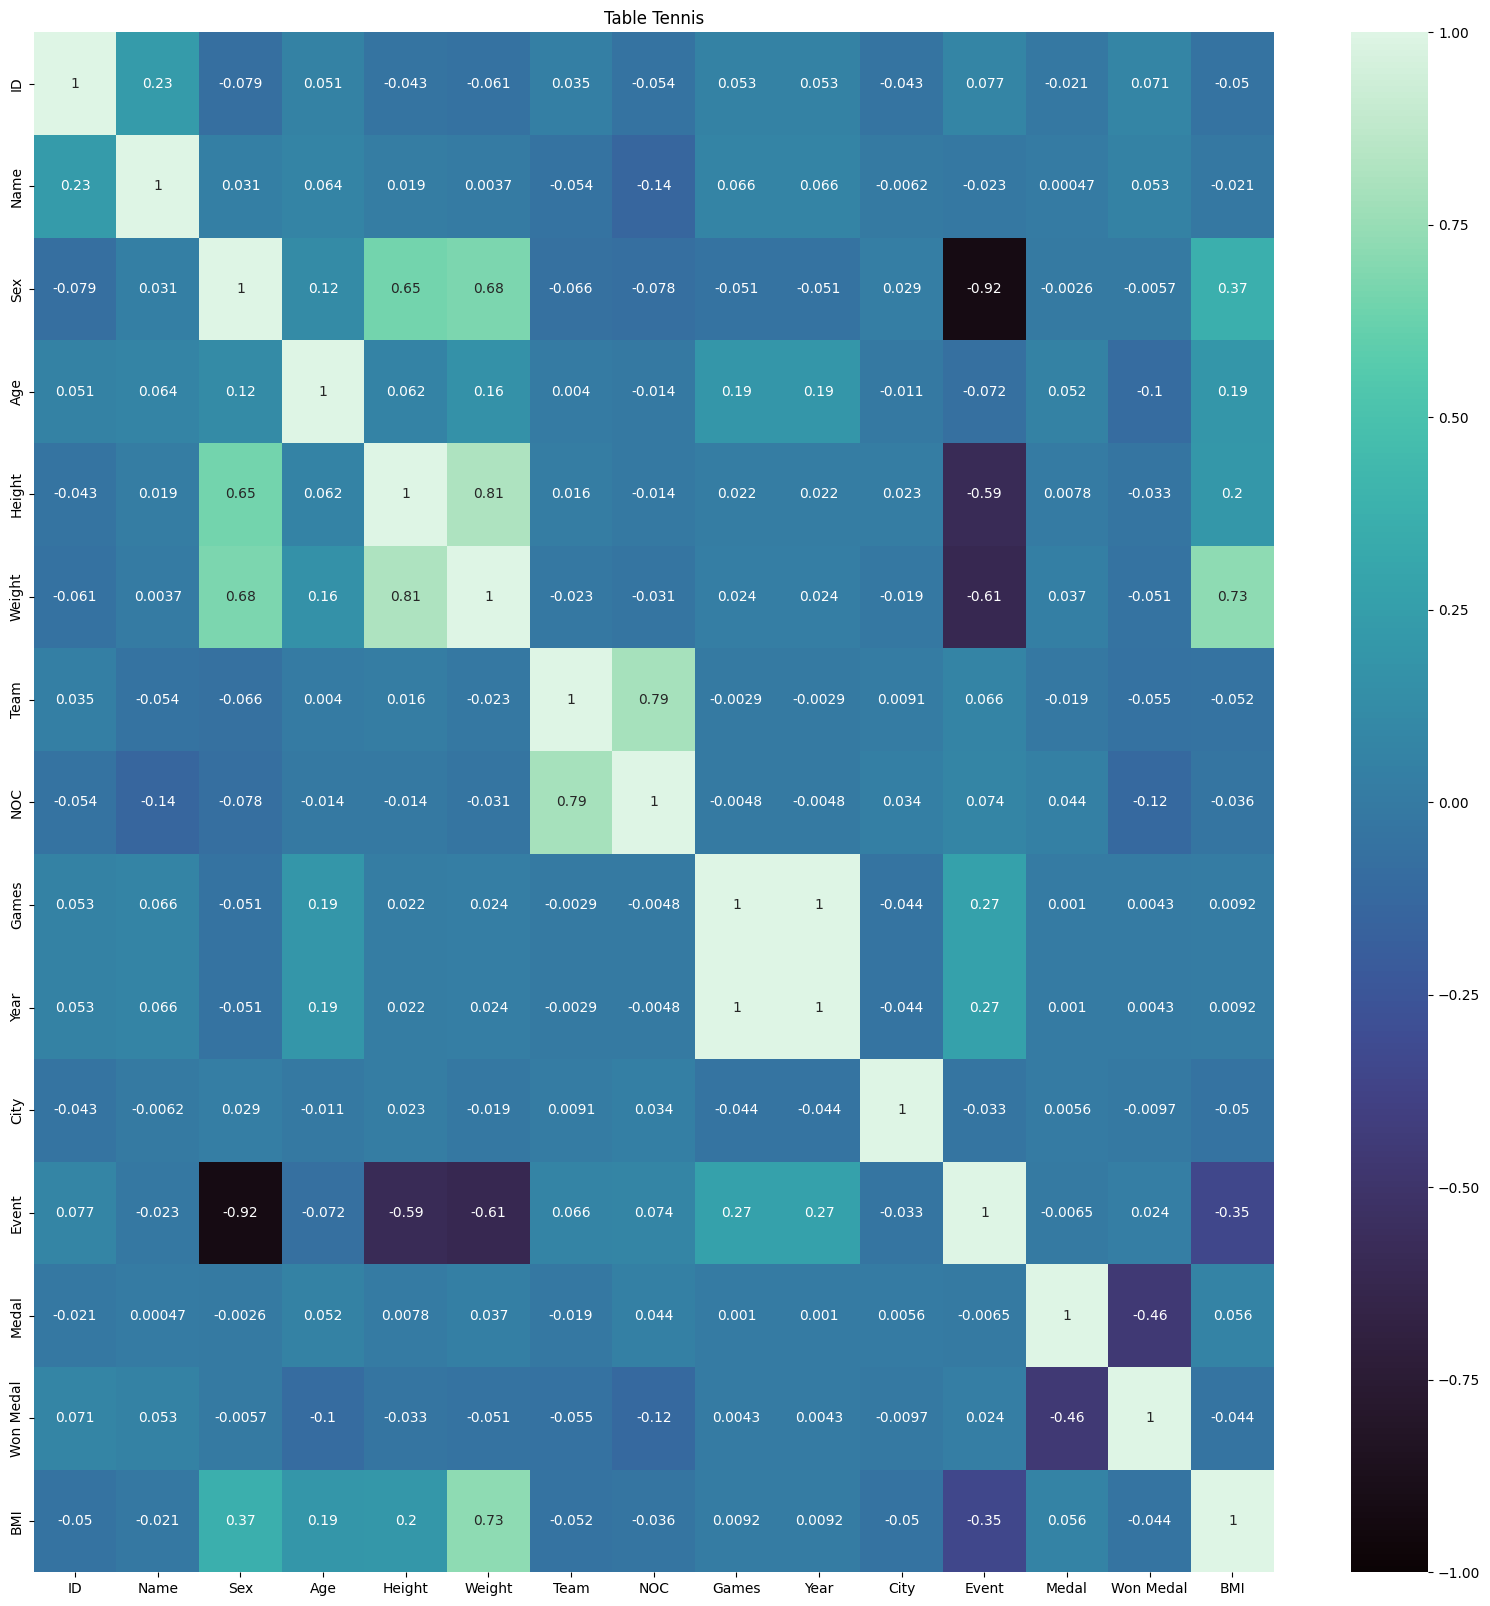

Taekwondo


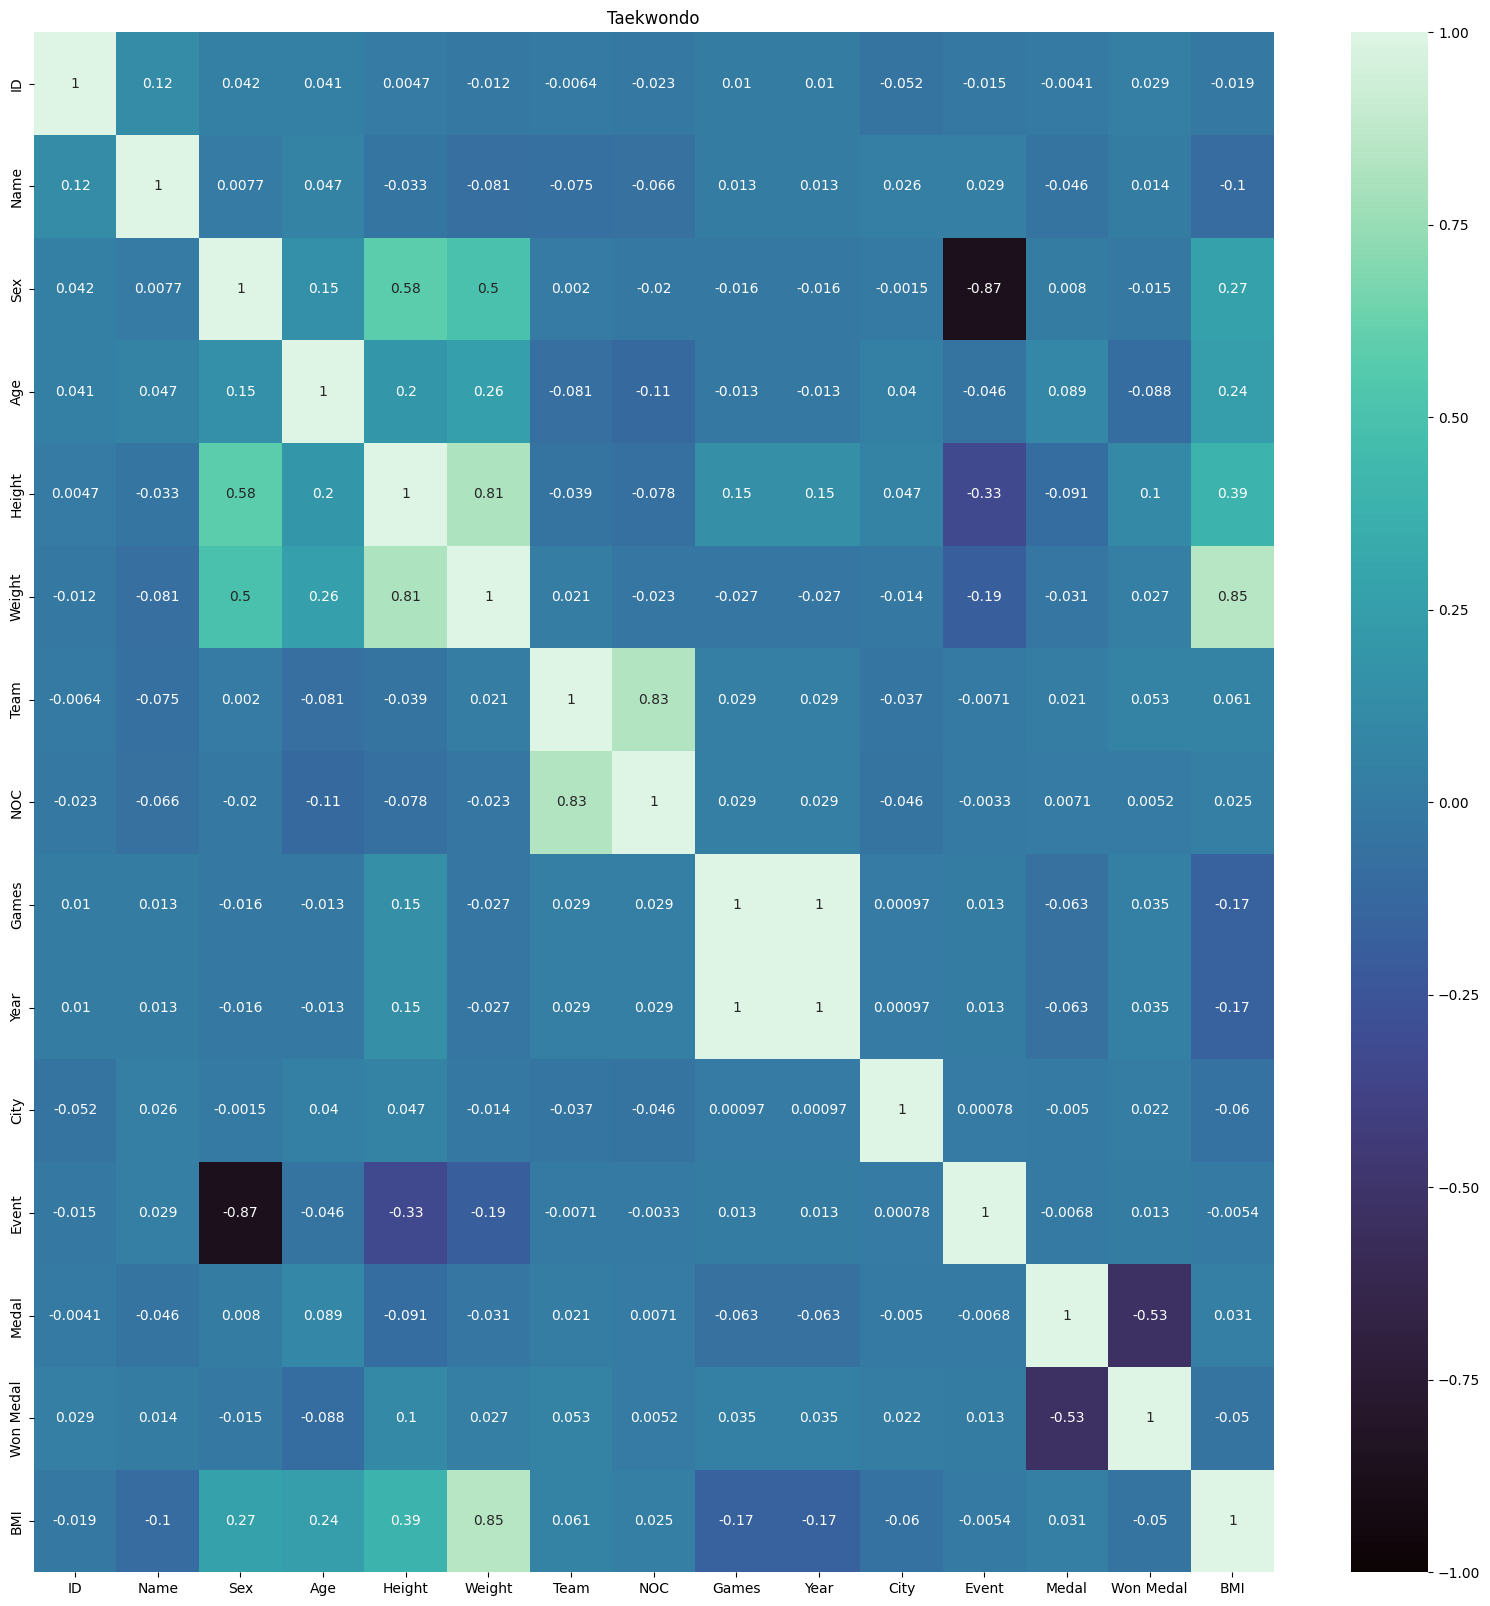

Tennis


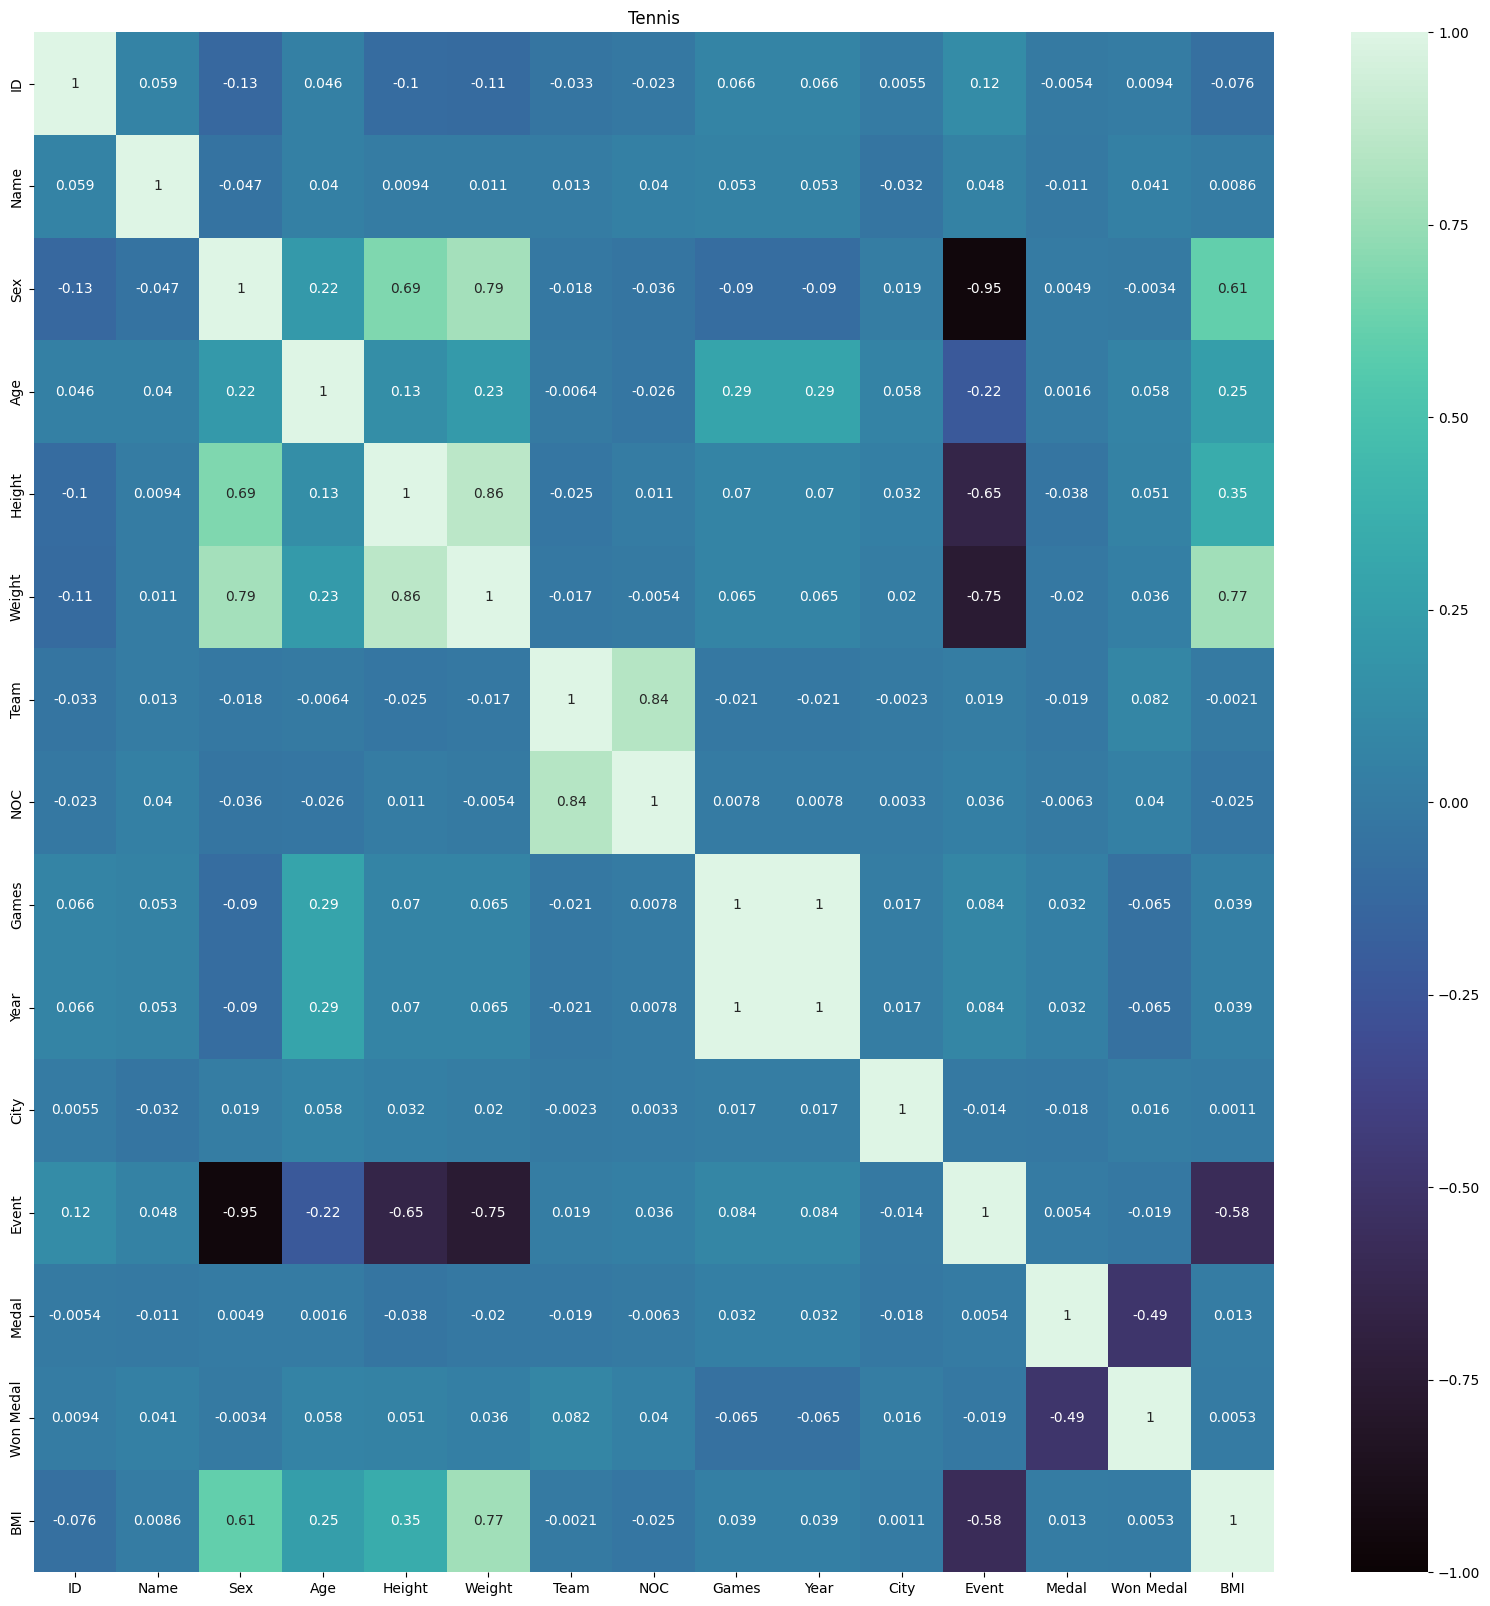

Trampolining


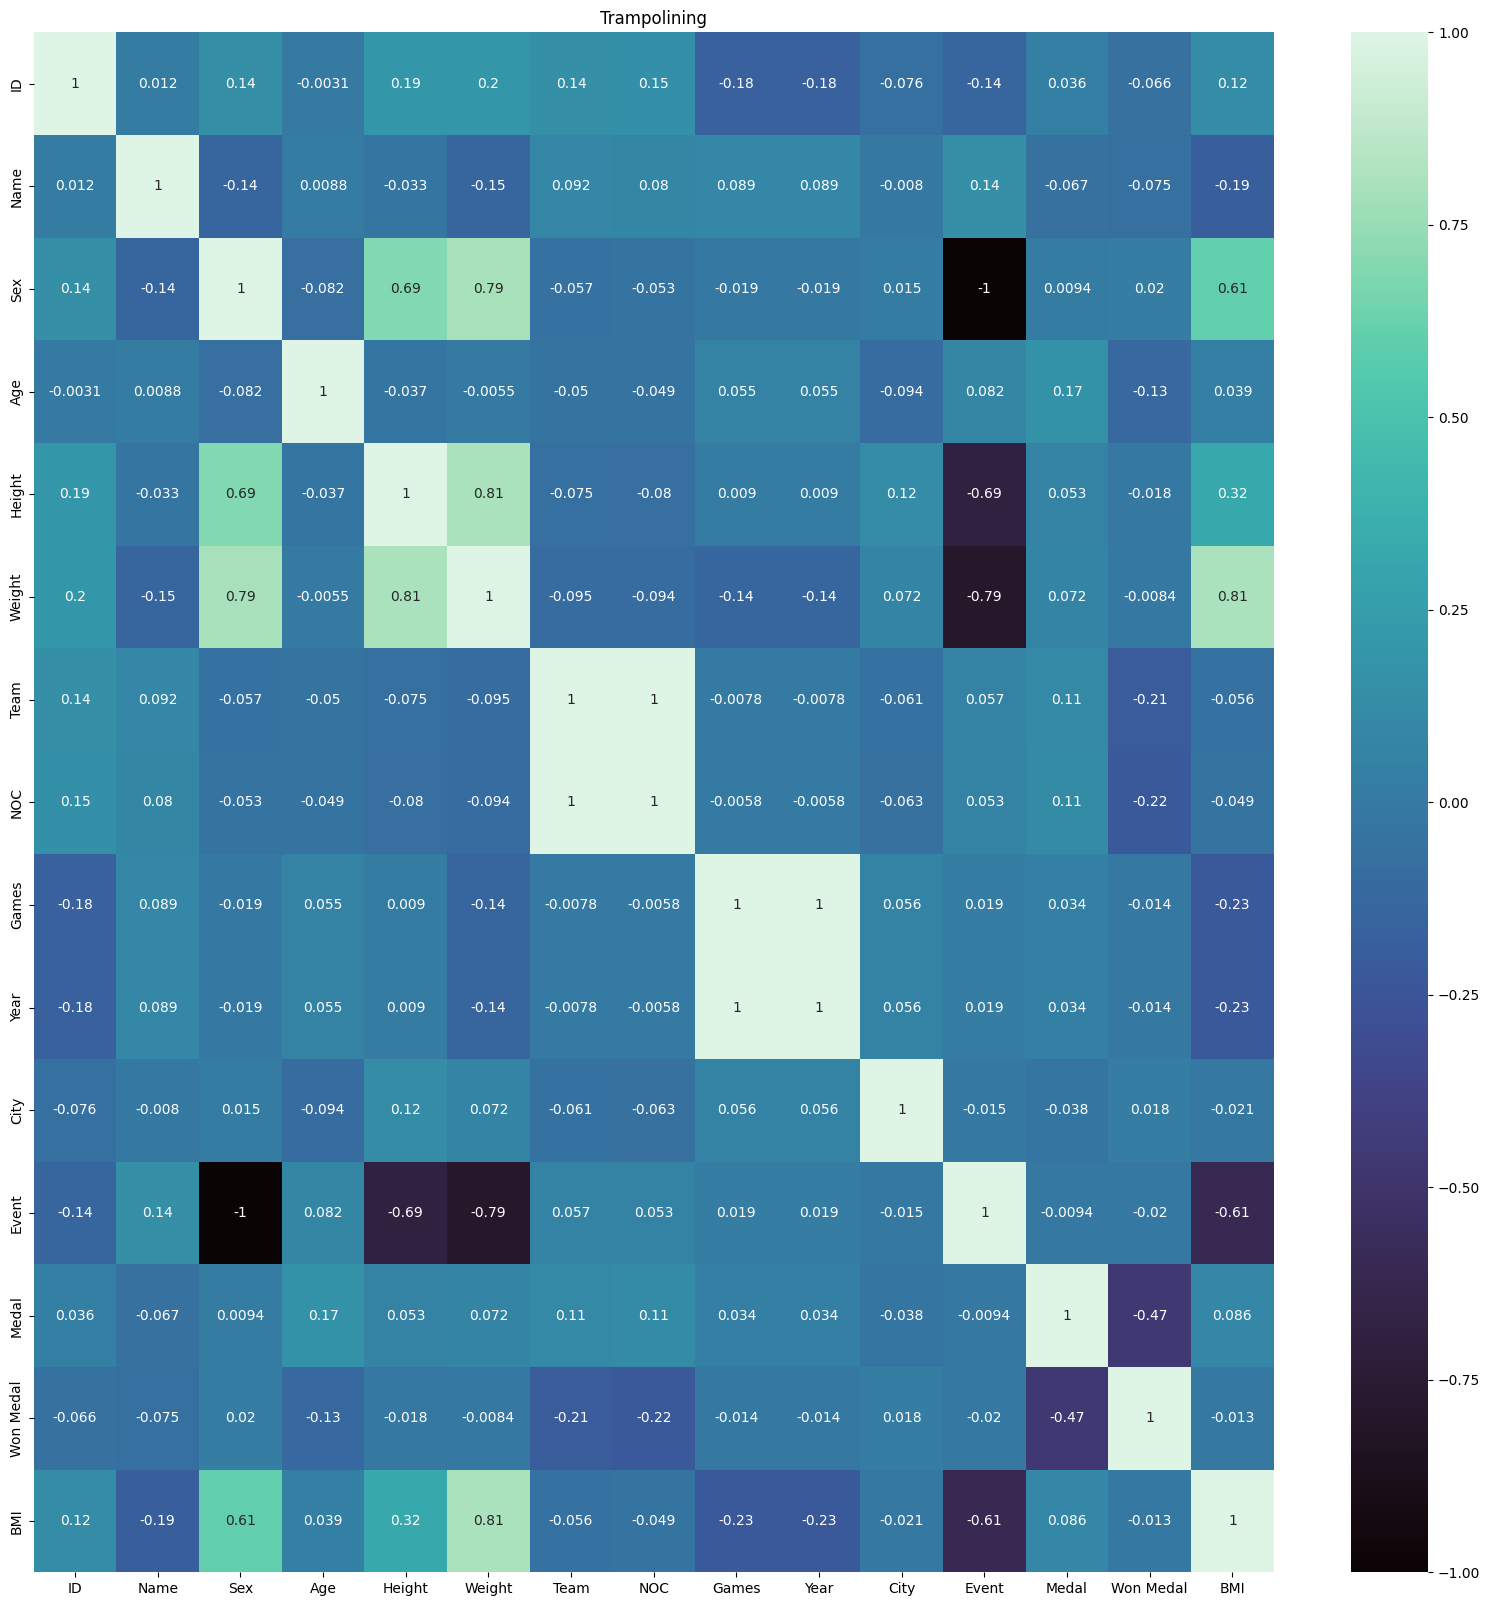

Triathlon


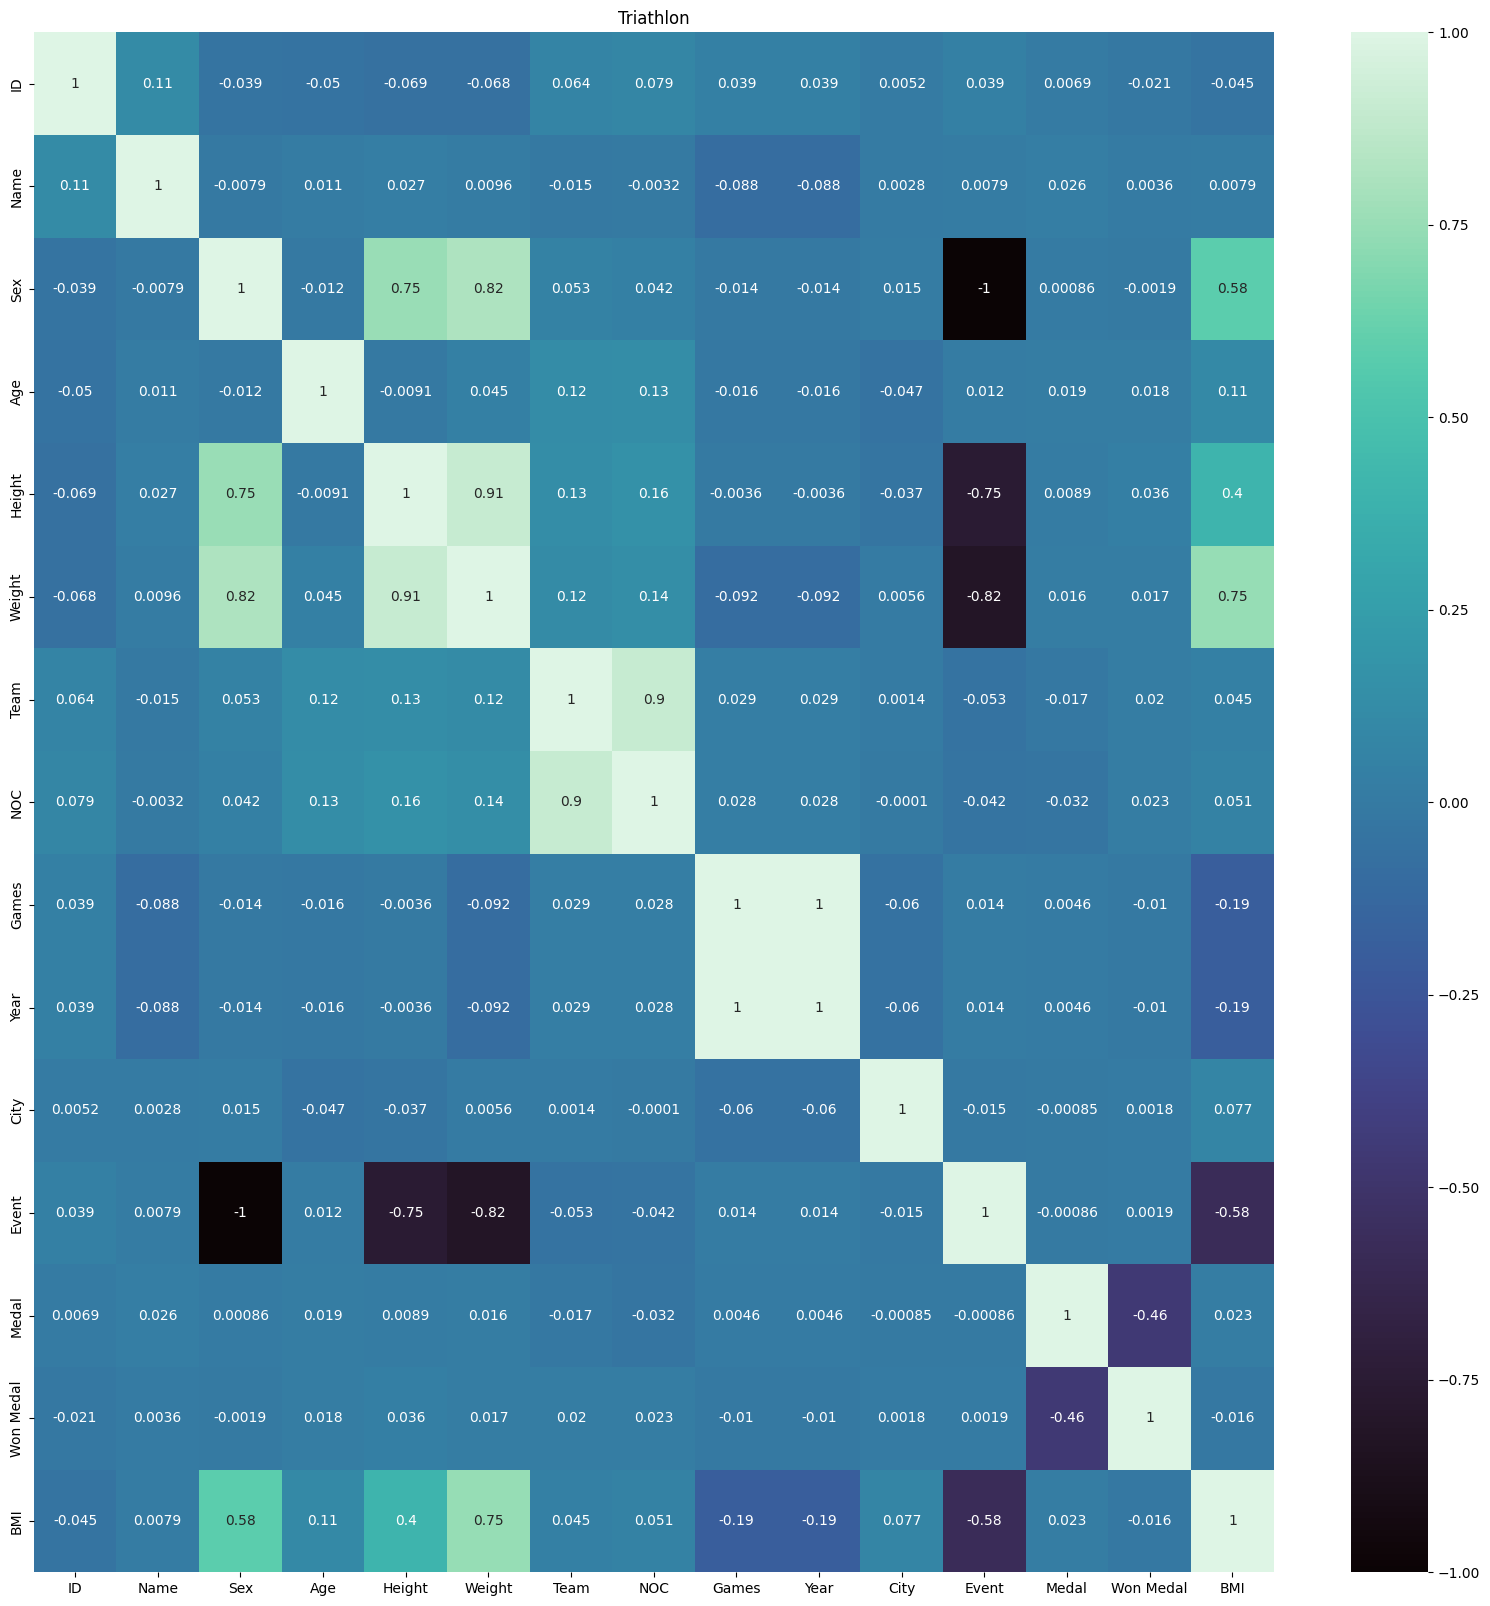

Volleyball


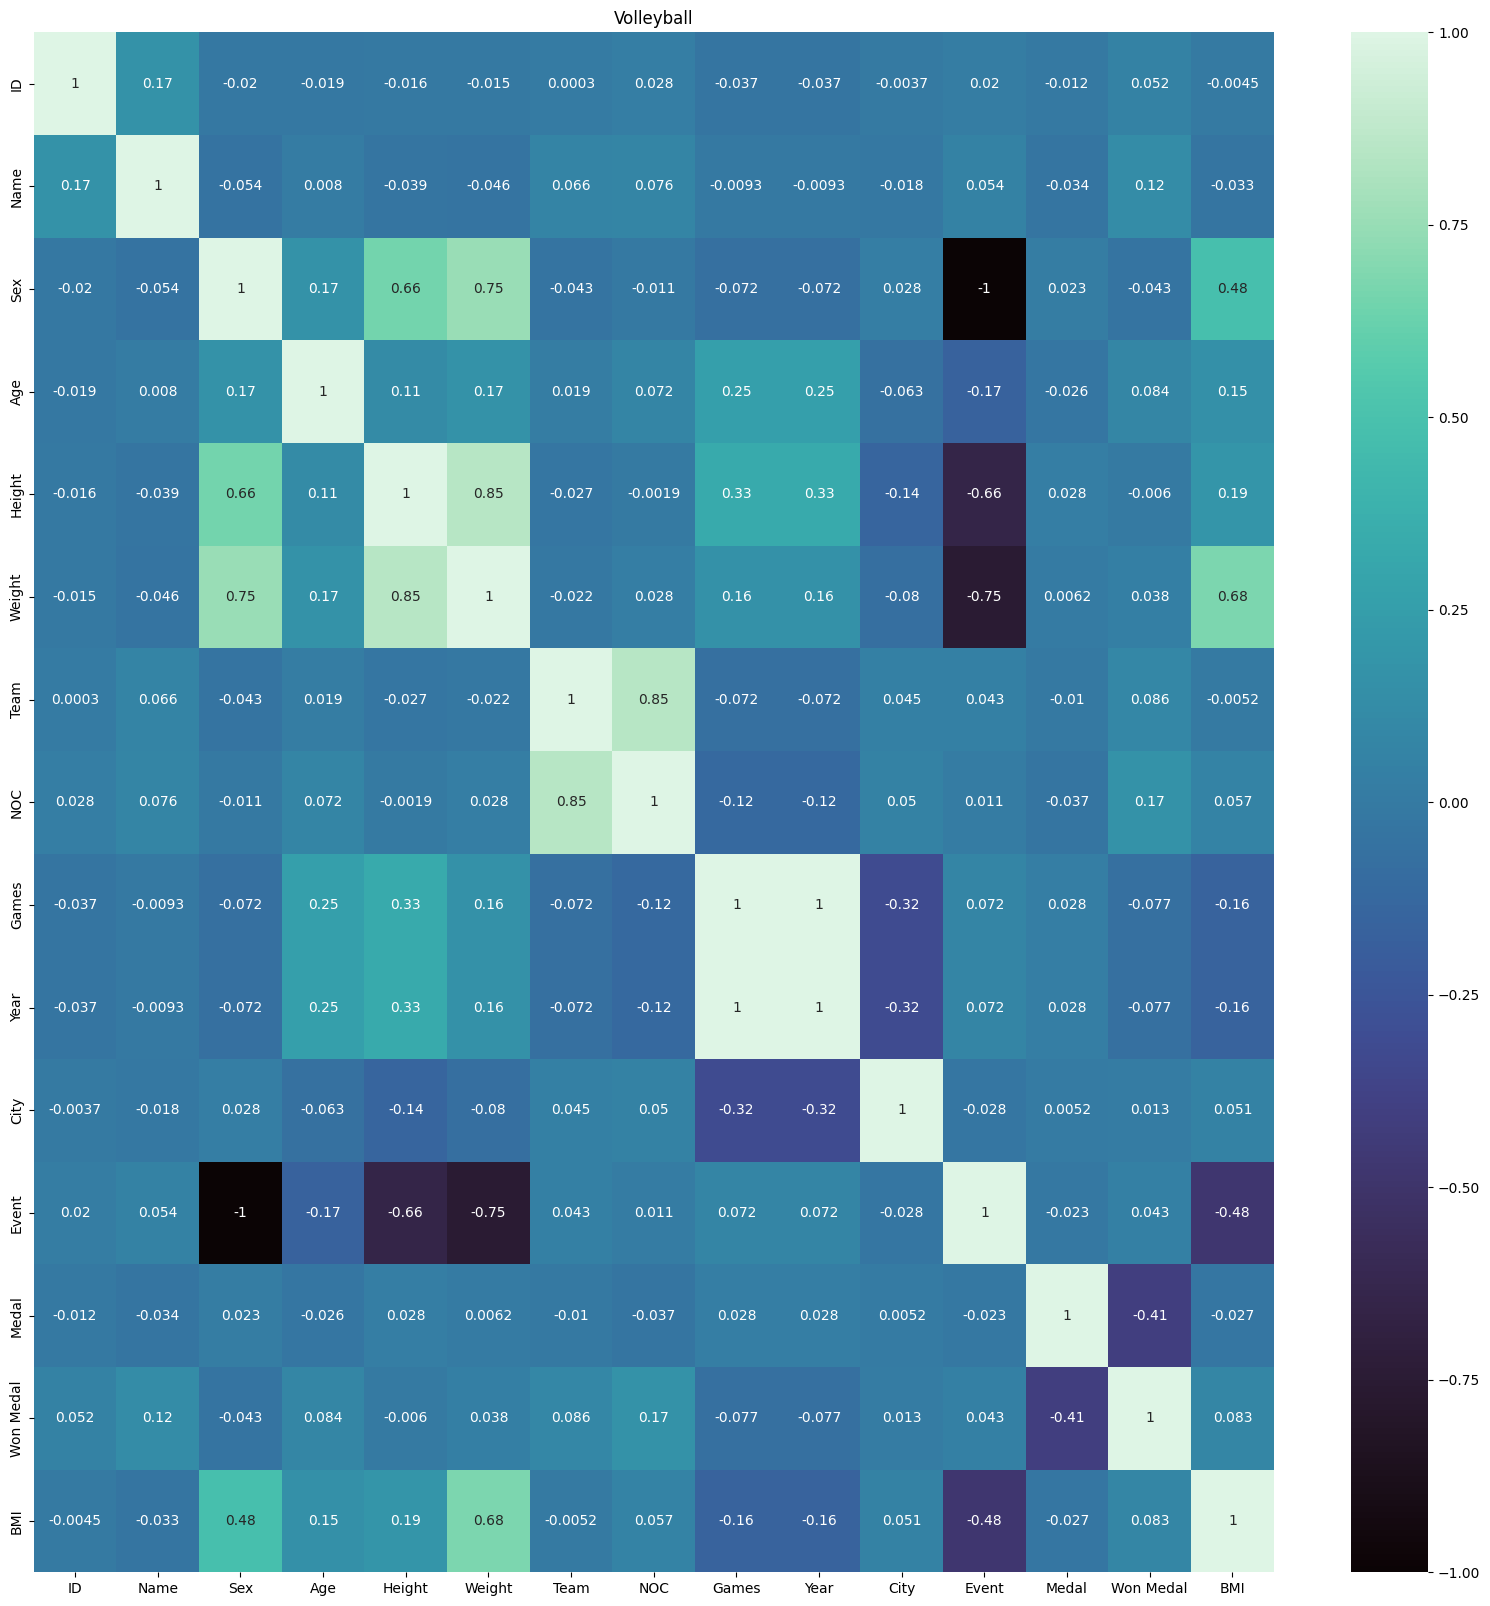

Water Polo


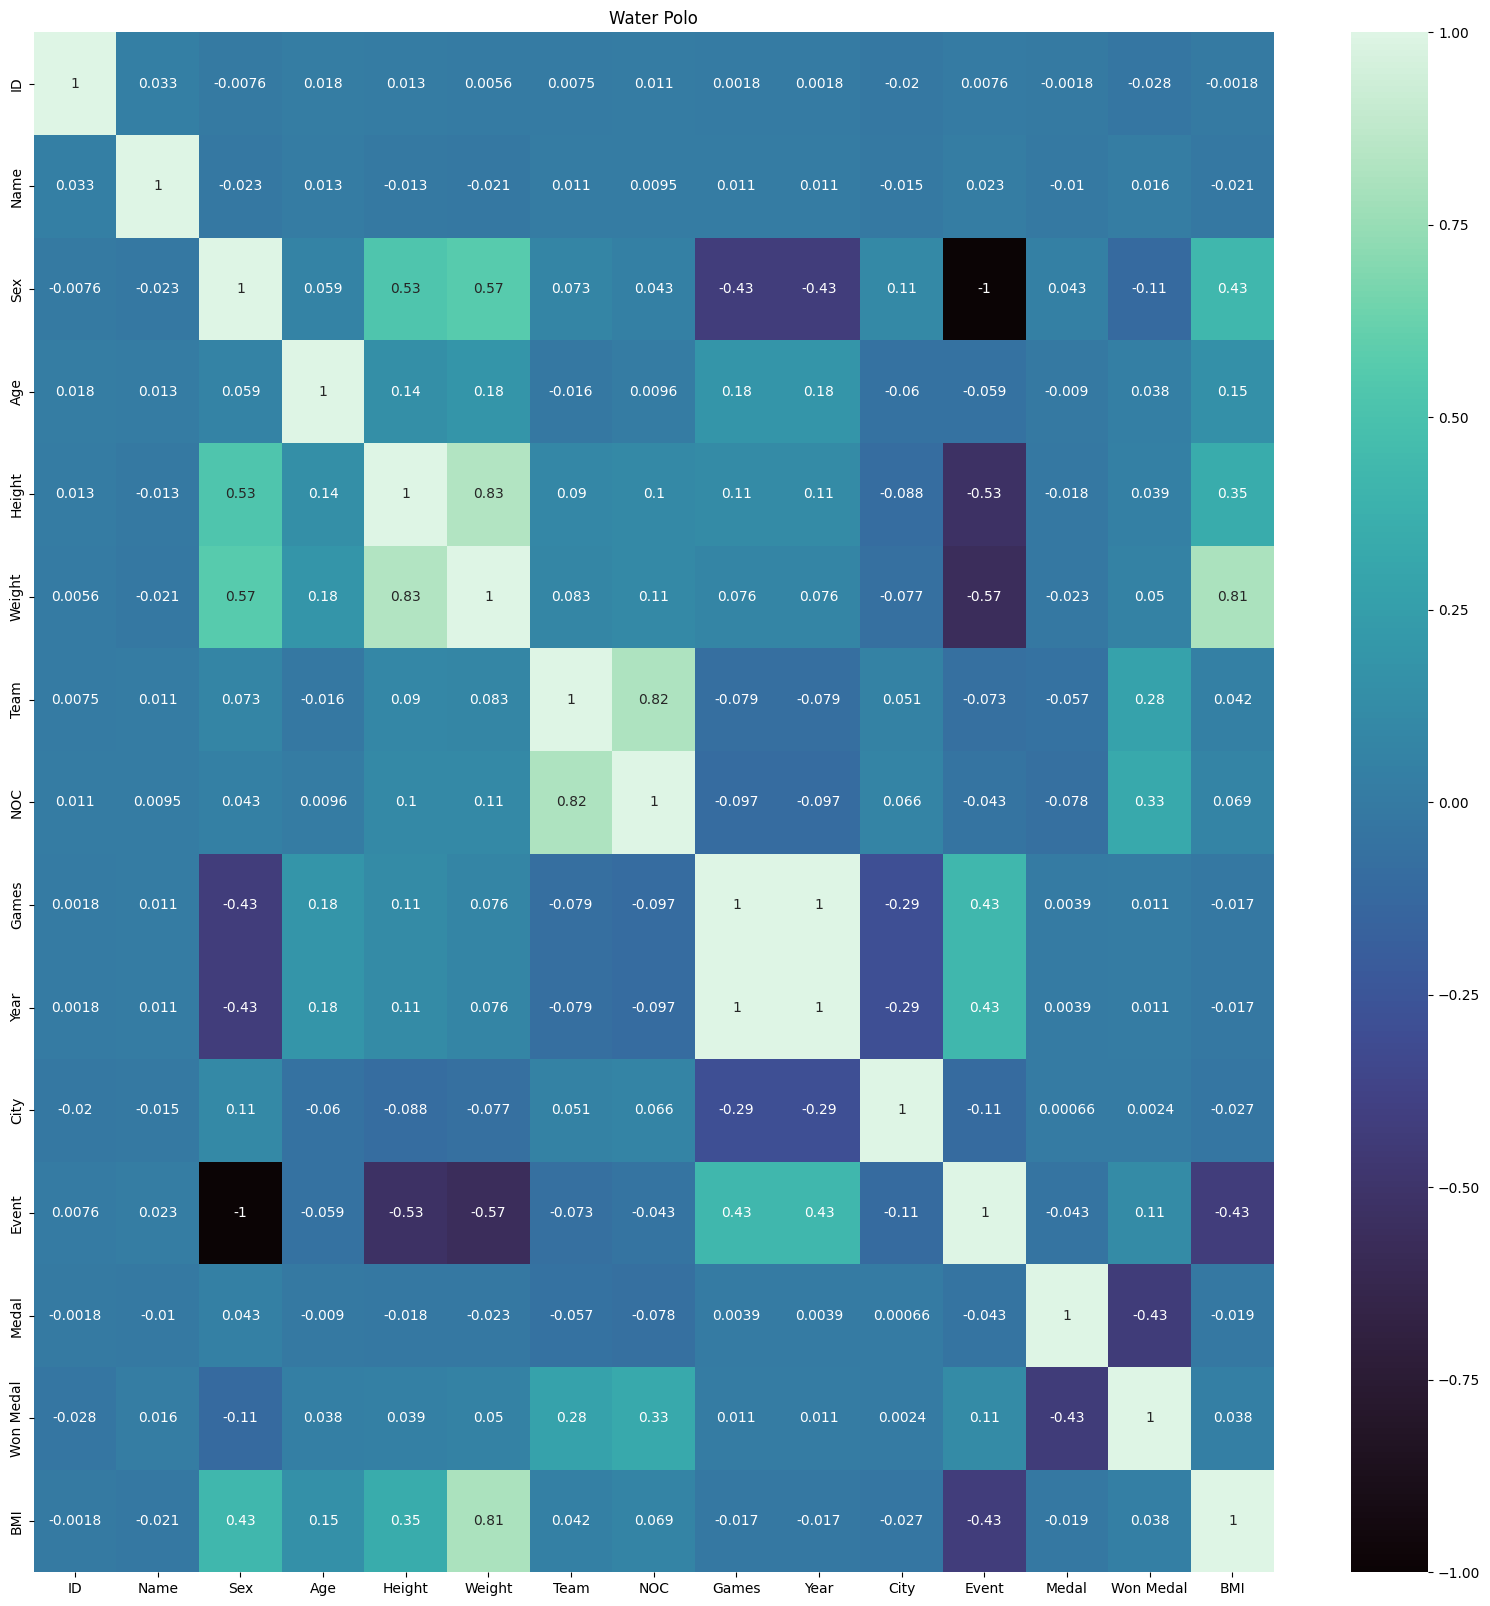

Weightlifting


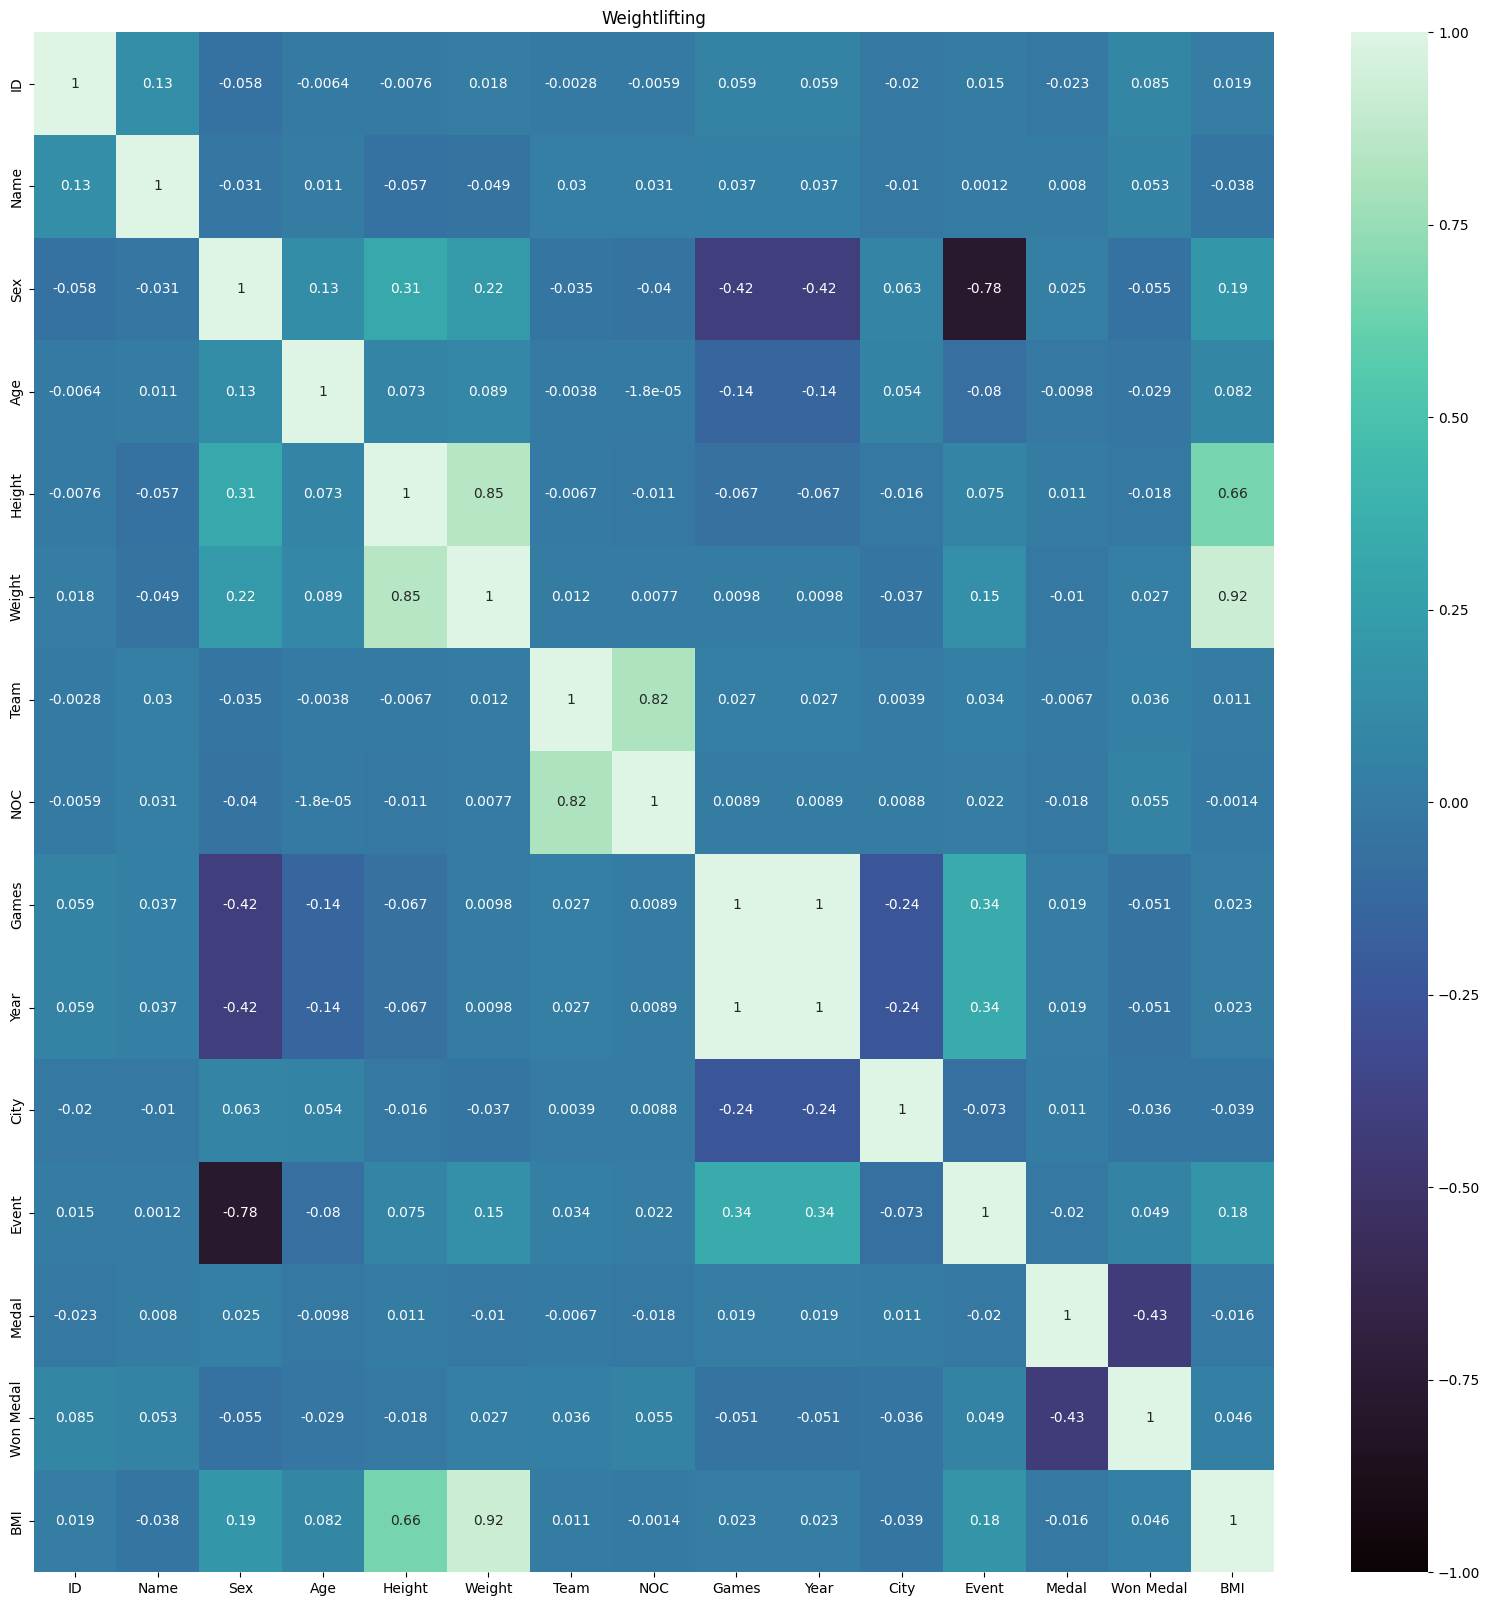

Wrestling


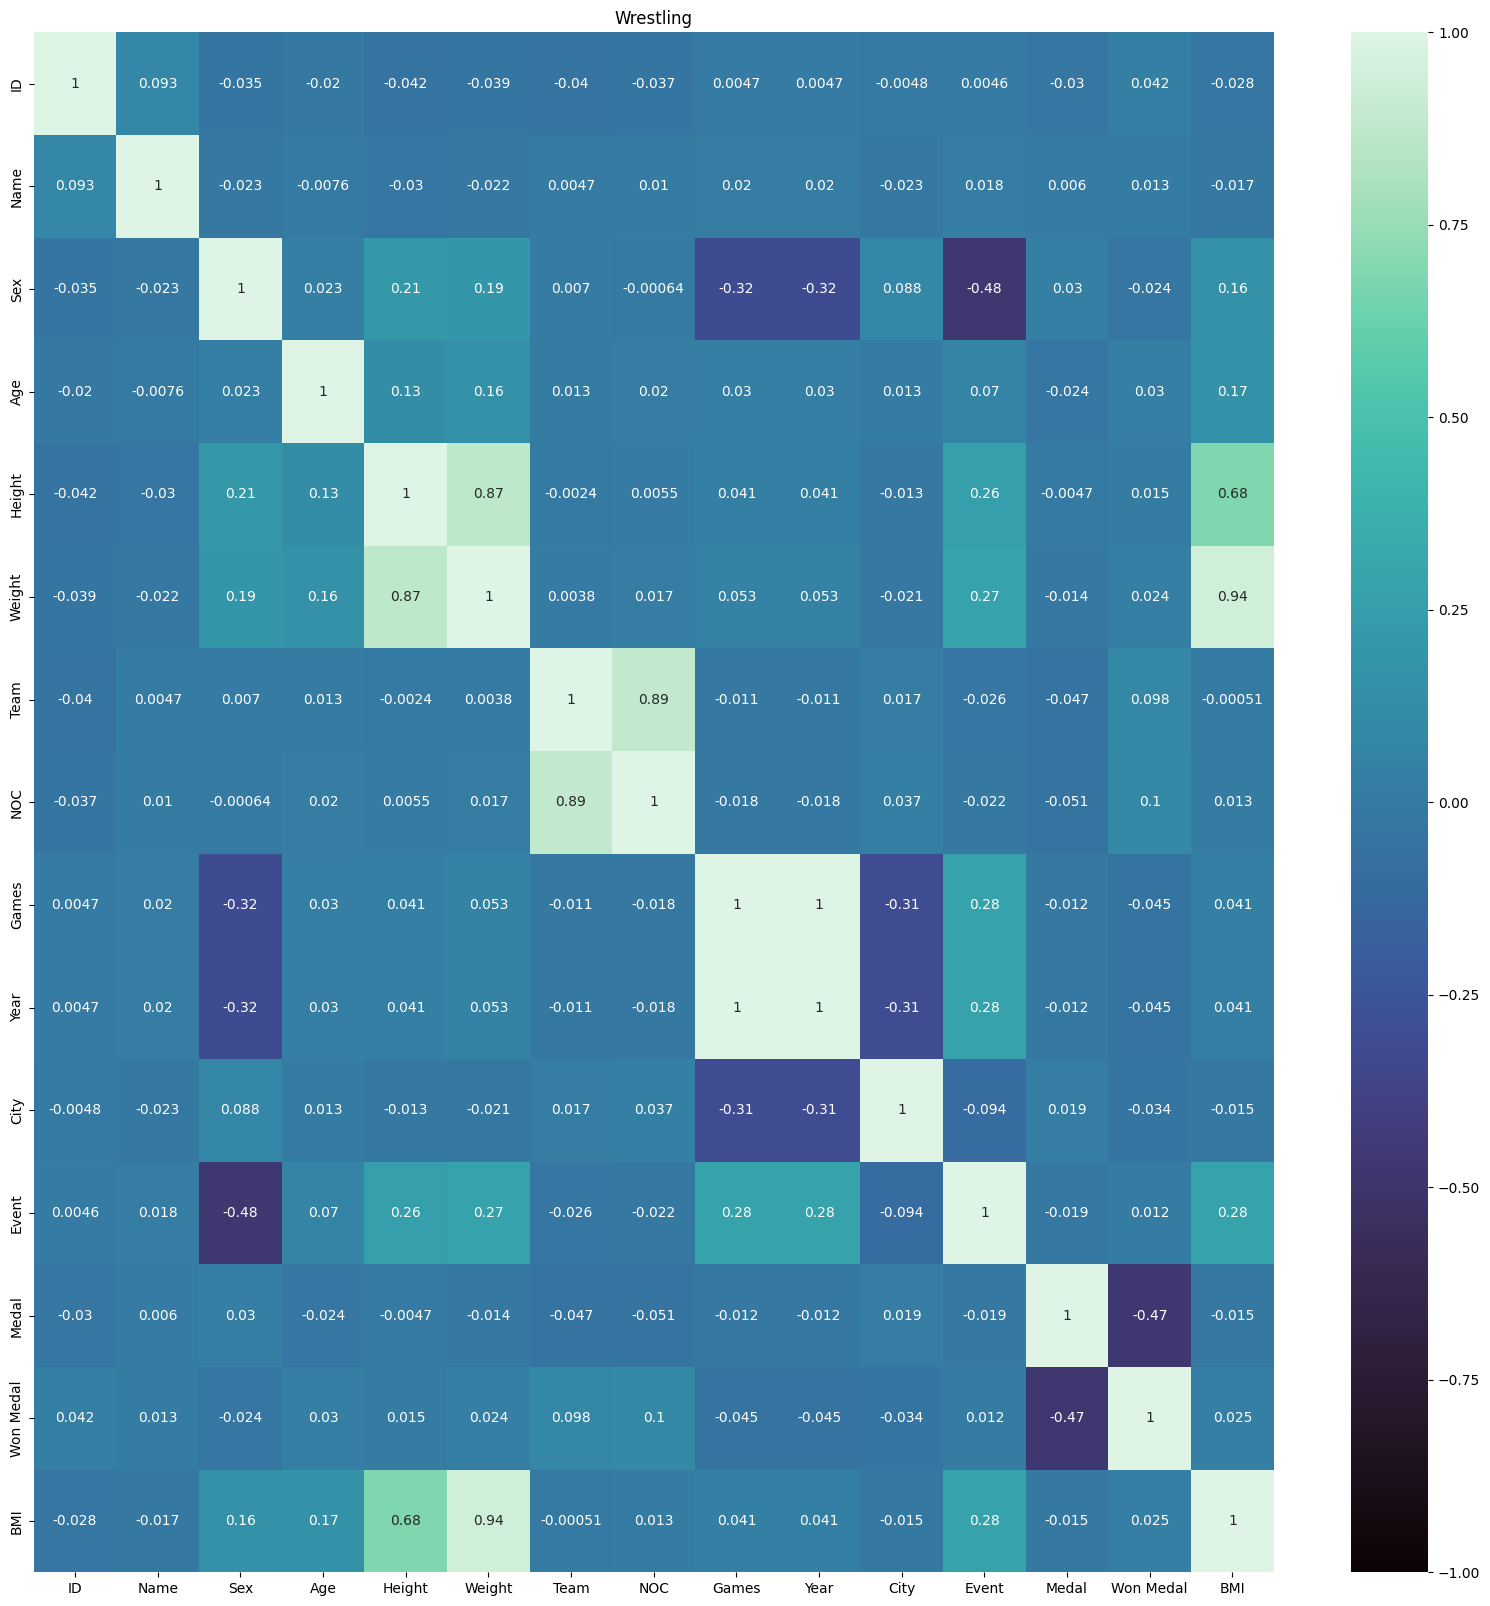

In [14]:
to_encode_df = df.drop(df.columns[0], axis=1)
to_encode_df = to_encode_df.drop(columns='Season')

for columns in to_encode_df.columns:
    if columns == 'Sport':
        continue
    
    le = LabelEncoder()
    to_encode_df[columns] = le.fit_transform(to_encode_df[columns])
    encoders[columns] = le



df_grouped_by_sport = to_encode_df.groupby('Sport')

dict_df_grouped_by_sport = dfs = {group: data_frame.drop(columns='Sport') for group, data_frame in df_grouped_by_sport}


for sport, sport_df in dict_df_grouped_by_sport.items():
    corr_matrix = sport_df.corr()
    
    print(sport)
    
    plt.figure(figsize=(20, 20))
    plt.title(sport)
    sns.heatmap(corr_matrix, annot=True, cmap='mako', vmin=-1, vmax=1)
    plt.show()

In [23]:
from IPython.display import display

for sport, sport_df in dict_df_grouped_by_sport.items():
    correlation_matrix = sport_df.corr()

    threshold = 0.51

    strong_correlations = correlation_matrix[(correlation_matrix.abs() > threshold)]

    correlation_tuples = [
        (col1, col2, strong_correlations.loc[col1, col2])
        for col1 in strong_correlations.columns
        for col2 in strong_correlations.index
        if not pd.isna(strong_correlations.loc[col1, col2])
    ]
    
    correlation_tuples = [(col1, col2, float(corr)) for col1,col2,corr in correlation_tuples if col1!=col2]
    
    unique_correlations = set()

    filtered_tuples = []
    for col1, col2, corr in correlation_tuples:
        # Create a sorted tuple of the column names to ensure ('A', 'B') == ('B', 'A')
        pair = tuple(sorted([col1, col2]))
        
        # If the pair is not in the set, add it and include the original tuple in the result
        if pair not in unique_correlations:
            unique_correlations.add(pair)
            filtered_tuples.append((col1, col2, corr))

    # Convert to DataFrame
    correlation_df = pd.DataFrame(filtered_tuples, columns=['Column 1', 'Column 2', 'Correlation'])
    
    print(sport)
    display(correlation_df)

Archery


Column 1 Column 2  Correlation
0      Sex   Height     0.672857
1      Sex   Weight     0.587810
2      Sex    Event    -0.903402
3   Height   Weight     0.692401
4   Height    Event    -0.593059
5   Weight    Event    -0.514401
6   Weight      BMI     0.850085
7     Team      NOC     0.724111
8    Games     Year     1.000000

Athletics


Column 1 Column 2  Correlation
0      Sex   Height     0.535597
1      Sex    Event    -0.837483
2   Height   Weight     0.760469
3   Weight      BMI     0.892807
4     Team      NOC     0.879351
5    Games     Year     1.000000

Badminton


Column 1 Column 2  Correlation
0      Sex   Height     0.654809
1      Sex   Weight     0.681225
2      Sex    Event    -0.857966
3   Height   Weight     0.837059
4   Height    Event    -0.564715
5   Weight    Event    -0.595958
6   Weight      BMI     0.717280
7     Team      NOC     0.823720
8    Games     Year     1.000000

Baseball


Column 1 Column 2  Correlation
0   Height   Weight     0.629345
1   Weight      BMI     0.765439
2     Team      NOC     0.639492
3    Games     Year     1.000000

Basketball


Column 1 Column 2  Correlation
0      Sex   Height     0.531350
1      Sex   Weight     0.584533
2      Sex    Event    -1.000000
3   Height   Weight     0.878761
4   Height    Event    -0.531350
5   Weight    Event    -0.584533
6   Weight      BMI     0.759597
7     Team      NOC     0.839978
8    Games     Year     1.000000

Beach Volleyball


Column 1 Column 2  Correlation
0       Sex   Height     0.767721
1       Sex   Weight     0.869518
2       Sex    Event    -1.000000
3       Sex      BMI     0.709528
4    Height   Weight     0.877887
5    Height    Event    -0.767721
6    Weight    Event    -0.869518
7    Weight      BMI     0.820450
8      Team      NOC     0.948485
9     Games     Year     1.000000
10    Event      BMI    -0.709528

Boxing


Column 1   Column 2  Correlation
0   Height     Weight     0.805280
1   Weight        BMI     0.854624
2     Team        NOC     0.903906
3    Games       Year     1.000000
4    Medal  Won Medal    -0.596463

Canoeing


Column 1 Column 2  Correlation
0      Sex   Height     0.596492
1      Sex   Weight     0.648351
2      Sex    Event    -0.694267
3   Height   Weight     0.829371
4   Weight      BMI     0.727548
5     Team      NOC     0.811354
6    Games     Year     1.000000

Cycling


Column 1 Column 2  Correlation
0      Sex   Weight     0.514035
1      Sex    Event    -0.717646
2   Height   Weight     0.706631
3   Weight      BMI     0.743388
4     Team      NOC     0.843576
5    Games     Year     1.000000

Diving


Column 1 Column 2  Correlation
0      Sex   Height     0.658073
1      Sex   Weight     0.730450
2      Sex    Event    -0.915726
3      Sex      BMI     0.550879
4   Height   Weight     0.841722
5   Height    Event    -0.582331
6   Weight    Event    -0.640858
7   Weight      BMI     0.826728
8     Team      NOC     0.885130
9    Games     Year     1.000000

Equestrianism


Column 1 Column 2  Correlation
0      Sex   Weight     0.625075
1   Height   Weight     0.712888
2   Weight      BMI     0.713611
3     Team      NOC     0.852541
4    Games     Year     1.000000

Fencing


Column 1 Column 2  Correlation
0      Sex   Height     0.602288
1      Sex   Weight     0.656933
2      Sex    Event    -0.753483
3   Height   Weight     0.809598
4   Weight      BMI     0.756486
5     Team      NOC     0.858872
6    Games     Year     1.000000

Football


Column 1 Column 2  Correlation
0      Sex   Height     0.523095
1      Sex   Weight     0.604590
2      Sex    Event    -1.000000
3   Height   Weight     0.820640
4   Height    Event    -0.523095
5   Weight    Event    -0.604590
6   Weight      BMI     0.673212
7     Team      NOC     0.865150
8    Games     Year     1.000000

Golf


Column 1   Column 2  Correlation
0      Sex     Height     0.608757
1      Sex     Weight     0.685078
2      Sex      Event    -1.000000
3   Height     Weight     0.738972
4   Height      Event    -0.608757
5   Weight      Event    -0.685078
6   Weight        BMI     0.809423
7     Team        NOC     0.788454
8    Medal  Won Medal    -0.625282

Gymnastics


Column 1 Column 2  Correlation
0       Sex      Age     0.574910
1       Sex   Height     0.681373
2       Sex   Weight     0.786630
3       Sex    Event    -0.836970
4       Sex      BMI     0.670132
5       Age   Weight     0.564363
6       Age      BMI     0.534362
7    Height   Weight     0.853150
8    Height    Event    -0.572254
9    Height      BMI     0.510677
10   Weight    Event    -0.660846
11   Weight      BMI     0.858027
12     Team      NOC     0.753800
13    Games     Year     1.000000
14    Event      BMI    -0.562988

Handball


Column 1 Column 2  Correlation
0       Sex   Height     0.709842
1       Sex   Weight     0.763006
2       Sex    Event    -1.000000
3       Sex      BMI     0.596916
4    Height   Weight     0.879863
5    Height    Event    -0.709842
6    Weight    Event    -0.763006
7    Weight      BMI     0.821292
8      Team      NOC     0.755271
9     Games     Year     1.000000
10    Event      BMI    -0.596916

Hockey


Column 1 Column 2  Correlation
0      Sex   Height     0.597381
1      Sex   Weight     0.630570
2      Sex    Event    -1.000000
3   Height   Weight     0.824801
4   Height    Event    -0.597381
5   Weight    Event    -0.630570
6   Weight      BMI     0.732532
7     Team      NOC     0.737216
8    Games     Year     1.000000

Judo


Column 1   Column 2  Correlation
0      Sex      Event    -0.863222
1   Height     Weight     0.819853
2   Height        BMI     0.589001
3   Weight        BMI     0.921614
4     Team        NOC     0.861298
5    Games       Year     1.000000
6    Medal  Won Medal    -0.608486

Modern Pentathlon


Column 1 Column 2  Correlation
0      Sex   Weight     0.637695
1      Sex    Games    -0.527647
2      Sex     Year    -0.527647
3      Sex    Event    -0.766580
4   Height   Weight     0.781671
5   Weight    Event    -0.514451
6   Weight      BMI     0.709556
7     Team      NOC     0.801872
8    Games     Year     1.000000

Rhythmic Gymnastics


Column 1 Column 2  Correlation
0   Height   Weight     0.688762
1   Weight      BMI     0.785882
2     Team      NOC     0.811522
3    Games     Year     1.000000

Rowing


Column 1 Column 2  Correlation
0      Sex    Event    -0.819912
1   Height   Weight     0.886599
2   Weight      BMI     0.840513
3     Team      NOC     0.840521
4    Games     Year     1.000000

Rugby Sevens


Column 1 Column 2  Correlation
0       Sex   Height     0.747207
1       Sex   Weight     0.838821
2       Sex    Event    -1.000000
3       Sex      BMI     0.727223
4    Height   Weight     0.900003
5    Height    Event    -0.747207
6    Height      BMI     0.537552
7    Weight    Event    -0.838821
8    Weight      BMI     0.846802
9      Team      NOC     0.832069
10    Event      BMI    -0.727223

Sailing


Column 1 Column 2  Correlation
0      Sex    Event    -0.628601
1   Height   Weight     0.716869
2   Weight      BMI     0.844799
3     Team      NOC     0.738893
4    Games     Year     1.000000

Shooting


Column 1 Column 2  Correlation
0      Sex   Height     0.571305
1      Sex   Weight     0.532771
2      Sex    Event    -0.683675
3   Height   Weight     0.677097
4   Weight      BMI     0.857086
5     Team      NOC     0.834779
6    Games     Year     1.000000

Softball


Column 1 Column 2  Correlation
0   Height   Weight     0.624791
1   Weight      BMI     0.810297
2     Team      NOC     0.768167
3    Games     Year     1.000000

Swimming


Column 1 Column 2  Correlation
0      Sex   Height     0.646915
1      Sex   Weight     0.730153
2      Sex    Event    -0.904325
3      Sex      BMI     0.541507
4   Height   Weight     0.864338
5   Height    Event    -0.565576
6   Weight    Event    -0.645223
7   Weight      BMI     0.754871
8     Team      NOC     0.858955
9    Games     Year     1.000000

Synchronized Swimming


Column 1 Column 2  Correlation
0   Height   Weight     0.564883
1   Weight      BMI     0.724265
2     Team      NOC     0.846848
3    Games     Year     1.000000

Table Tennis


Column 1 Column 2  Correlation
0      Sex   Height     0.654801
1      Sex   Weight     0.676538
2      Sex    Event    -0.915717
3   Height   Weight     0.813389
4   Height    Event    -0.590079
5   Weight    Event    -0.614704
6   Weight      BMI     0.725981
7     Team      NOC     0.790294
8    Games     Year     1.000000

Taekwondo


Column 1   Column 2  Correlation
0      Sex     Height     0.580488
1      Sex      Event    -0.871719
2   Height     Weight     0.812651
3   Weight        BMI     0.849708
4     Team        NOC     0.830378
5    Games       Year     1.000000
6    Medal  Won Medal    -0.528859

Tennis


Column 1 Column 2  Correlation
0       Sex   Height     0.686472
1       Sex   Weight     0.789033
2       Sex    Event    -0.953889
3       Sex      BMI     0.606958
4    Height   Weight     0.860365
5    Height    Event    -0.652709
6    Weight    Event    -0.753079
7    Weight      BMI     0.773706
8      Team      NOC     0.842434
9     Games     Year     1.000000
10    Event      BMI    -0.583390

Trampolining


Column 1 Column 2  Correlation
0       Sex   Height     0.691605
1       Sex   Weight     0.794141
2       Sex    Event    -1.000000
3       Sex      BMI     0.606138
4    Height   Weight     0.809381
5    Height    Event    -0.691605
6    Weight    Event    -0.794141
7    Weight      BMI     0.809217
8      Team      NOC     0.998144
9     Games     Year     1.000000
10    Event      BMI    -0.606138

Triathlon


Column 1 Column 2  Correlation
0       Sex   Height     0.750792
1       Sex   Weight     0.815382
2       Sex    Event    -1.000000
3       Sex      BMI     0.582469
4    Height   Weight     0.906132
5    Height    Event    -0.750792
6    Weight    Event    -0.815382
7    Weight      BMI     0.745680
8      Team      NOC     0.901077
9     Games     Year     1.000000
10    Event      BMI    -0.582469

Volleyball


Column 1 Column 2  Correlation
0      Sex   Height     0.655591
1      Sex   Weight     0.753802
2      Sex    Event    -1.000000
3   Height   Weight     0.848398
4   Height    Event    -0.655591
5   Weight    Event    -0.753802
6   Weight      BMI     0.675201
7     Team      NOC     0.849979
8    Games     Year     1.000000

Water Polo


Column 1 Column 2  Correlation
0      Sex   Height     0.527136
1      Sex   Weight     0.566701
2      Sex    Event    -1.000000
3   Height   Weight     0.829289
4   Height    Event    -0.527136
5   Weight    Event    -0.566701
6   Weight      BMI     0.807542
7     Team      NOC     0.819271
8    Games     Year     1.000000

Weightlifting


Column 1 Column 2  Correlation
0      Sex    Event    -0.776464
1   Height   Weight     0.849868
2   Height      BMI     0.661849
3   Weight      BMI     0.917638
4     Team      NOC     0.815286
5    Games     Year     1.000000

Wrestling


Column 1 Column 2  Correlation
0   Height   Weight     0.867900
1   Height      BMI     0.682132
2   Weight      BMI     0.938334
3     Team      NOC     0.886202
4    Games     Year     1.000000